In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


In [2]:
%run -i 'load_data.py'

In [3]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

In [6]:
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri as rpyn
from statsmodels.stats.multitest import multipletests
dt = rpy2.robjects.packages.importr('diptest')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

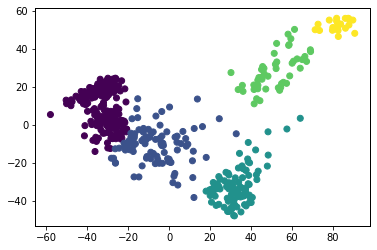

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


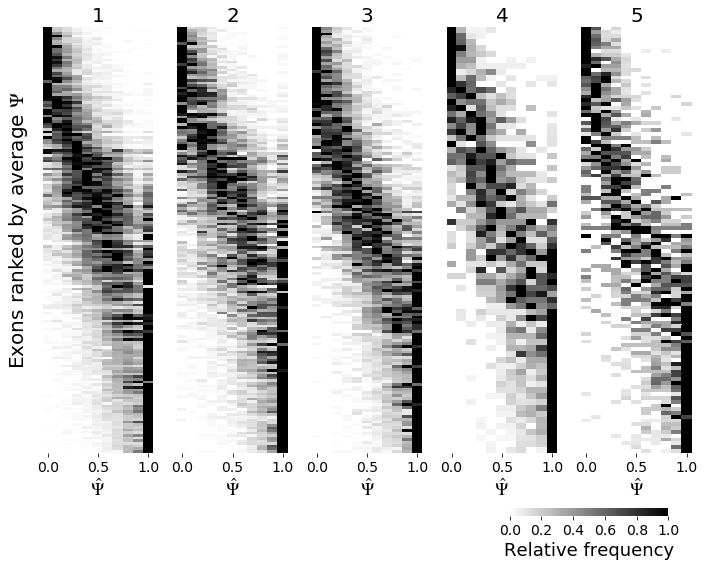

In [13]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=5)
ac_clusters = ac.fit_predict(chen_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(chen_pca.PC1, chen_pca.PC2, c=ac_clusters)
plt.show()

chen_pca_clust = chen_pca.copy()
chen_pca_clust['AC'] = ac_clusters

chen_clust_filter = []
for cluster in chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = chen_pca_clust.index[chen_pca_clust.AC == cluster]
    
    chen_filter = process_subpop(clust_subpop, chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                                 chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    chen_clust_filter.append(chen_filter)
    


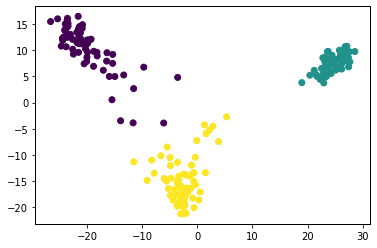

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


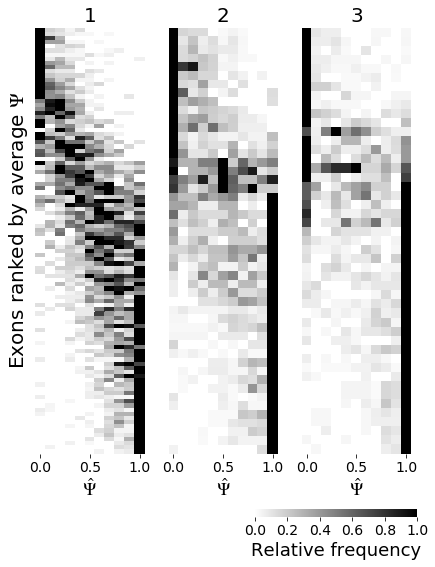

In [25]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac_clusters = ac.fit_predict(song_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(song_pca.PC1, song_pca.PC2, c=ac_clusters)
plt.show()

song_pca_clust = song_pca.copy()
song_pca_clust['AC'] = ac_clusters

song_clust_filter = []
for cluster in song_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = song_pca_clust.index[song_pca_clust.AC == cluster]
    
    song_filter = process_subpop(clust_subpop, song_PSI, song_mrna_counts, mrna_per_event_song, 
                                 song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    song_clust_filter.append(song_filter)
    
    


../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


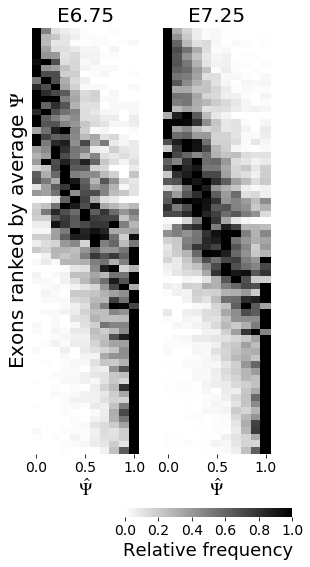

In [27]:
lescroart_E6_filtered = process_subpop(lescroart_E6, lescroart_PSI, lescroart_mrna_counts, 
                                    mrna_per_event_lescroart, lescroart_read_counts, 
                                       lescroart_coverage_tab['SJ_coverage'], 0.1, 10)
lescroart_E7_filtered = process_subpop(lescroart_E7, lescroart_PSI, lescroart_mrna_counts, 
                                  mrna_per_event_lescroart, lescroart_read_counts, 
                                       lescroart_coverage_tab['SJ_coverage'], 0.1, 10)



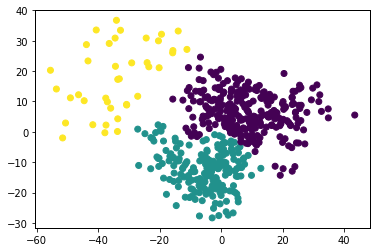

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


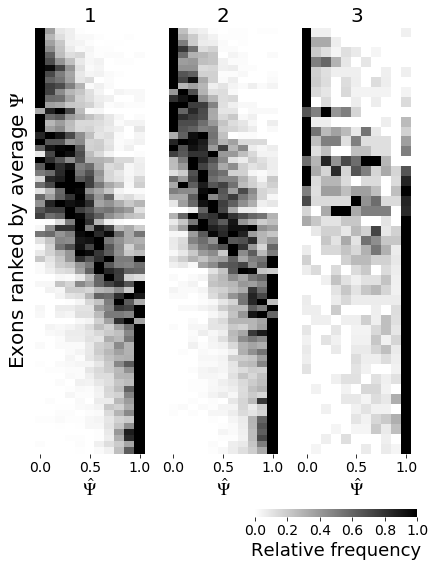

In [30]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac_clusters = ac.fit_predict(lescroart_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(lescroart_pca.PC1, lescroart_pca.PC2, c=ac_clusters)
plt.show()

lescroart_pca_clust = lescroart_pca.copy()
lescroart_pca_clust['AC'] = ac_clusters

lescroart_clust_filter = []
for cluster in range(3):
    clust_subpop = lescroart_pca_clust.index[lescroart_pca_clust.AC == cluster]
    
    lescroart_filter = process_subpop(clust_subpop, lescroart_PSI, lescroart_mrna_counts, mrna_per_event_lescroart, 
                                 lescroart_read_counts, lescroart_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    lescroart_clust_filter.append(lescroart_filter)
    
  

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


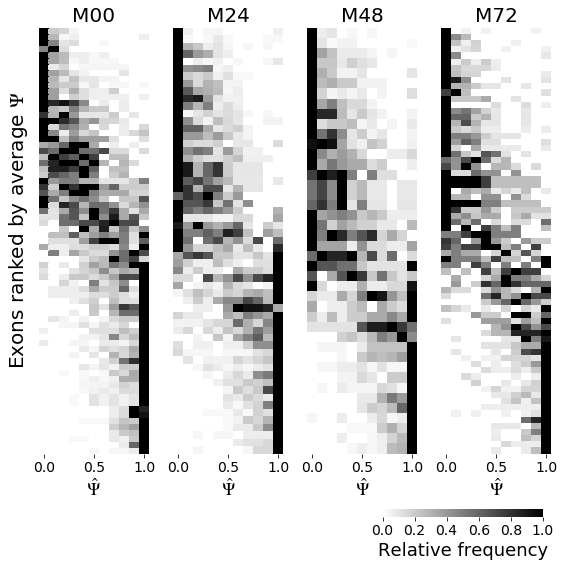

In [31]:
trapnell_M00_filtered = process_subpop(trapnell_M00, trapnell_PSI, trapnell_mrna_counts, 
                                    mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M24_filtered = process_subpop(trapnell_M24, trapnell_PSI, trapnell_mrna_counts, 
                                  mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M48_filtered = process_subpop(trapnell_M48, trapnell_PSI, trapnell_mrna_counts, 
                                    mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M72_filtered = process_subpop(trapnell_M72, trapnell_PSI, trapnell_mrna_counts, 
                                  mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)


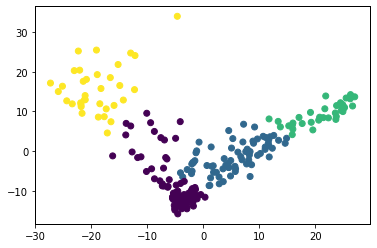

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


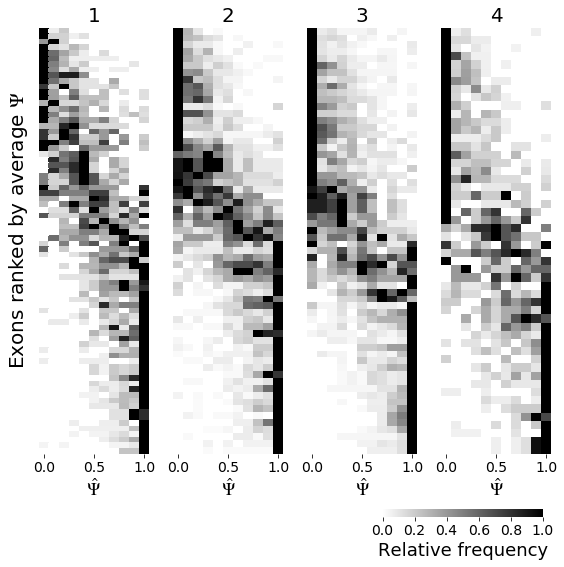

In [33]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4)
ac_clusters = ac.fit_predict(trapnell_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(trapnell_pca.PC1, trapnell_pca.PC2, c=ac_clusters)
plt.show()

trapnell_pca_clust = trapnell_pca.copy()
trapnell_pca_clust['AC'] = ac_clusters

trapnell_clust_filter = []
for cluster in trapnell_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = trapnell_pca_clust.index[trapnell_pca_clust.AC == cluster]
    
    trapnell_filter = process_subpop(clust_subpop, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                 trapnell_read_counts, trapnell_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    trapnell_clust_filter.append(trapnell_filter)
    
    


In [36]:
song_modalities = pd.read_csv('../../../data/song/song_event_modalities.tab', sep='\t', index_col = 0)

In [49]:
print((song_modalities.iPSC == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.iPSC == '-').sum()))
print((song_modalities.iPSC == 'bimodal').sum() / (len(song_modalities) - (song_modalities.iPSC == '-').sum()))

2835
8895
0.31871838111298484


In [50]:
print((song_modalities.NPC == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.NPC == '-').sum()))
print((song_modalities.NPC == 'bimodal').sum() / (len(song_modalities) - (song_modalities.NPC == '-').sum()))

1981
6539
0.3029515216393944


In [51]:
print((song_modalities.MN == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.MN == '-').sum()))
print((song_modalities.MN == 'bimodal').sum() / (len(song_modalities) - (song_modalities.MN == '-').sum()))

1131
4156
0.27213666987487967


In [52]:
song_outrigger = pd.read_csv('song_outrigger_psi.tab', index_col = 0)

In [53]:
outrigger_iPSC = [x for x in list(song_outrigger.index) if x[0] == 'P']
outrigger_NPC = [x for x in list(song_outrigger.index) if ((x[0] == 'C') or (x[0] == 'N'))]
outrigger_MN = [x for x in list(song_outrigger.index) if x[0] == 'M']

In [54]:
print(song_iPSC_filtered[0].shape)
print(song_NPC_filtered[0].shape)
print(song_MN_filtered[0].shape)

(102, 62)
(49, 70)
(47, 70)


In [83]:
song_iPSC_filtered[0].mean(axis=1).min()

0.10145187285206692

In [84]:
song_iPSC_filtered[0].shape

(102, 62)

In [85]:
song_PSI.loc[song_iPSC_filtered[0].index, song_iPSC_filtered[0].columns].mean(axis=1).max()

0.8996632229622492

In [86]:
assert np.all([x in song_iPSC_unfiltered.index for x in song_iPSC_filtered[0].index])
assert np.all([x in song_NPC_unfiltered.index for x in song_NPC_filtered[0].index])
assert np.all([x in song_MN_unfiltered.index for x in song_MN_filtered[0].index])

In [87]:
suma_iPSC = 0
suma_iPSC_unfiltered = 0
suma_iPSC_filtered_all = 0
suma_iPSC_filtered = 0
suma_iPSC_outrigger = 0
suma_iPSC_outrigger_total = 0

for evento in song_iPSC_unfiltered.index:
        
    q25_unfiltered = song_iPSC_unfiltered.loc[evento].quantile(0.25)
    q75_unfiltered = song_iPSC_unfiltered.loc[evento].quantile(0.75)
    if (q25_unfiltered <= 0.25) and (q75_unfiltered >= 0.75):
        suma_iPSC_unfiltered += 1
        
    if evento in song_iPSC_filtered[0].index:
        
        q25_filtered_all = song_PSI.loc[evento, song_iPSC].quantile(0.25)
        q75_filtered_all = song_PSI.loc[evento, song_iPSC].quantile(0.75)        
        if (q25_filtered_all <= 0.25) and (q75_filtered_all >= 0.75):
            suma_iPSC_filtered_all += 1
            
        q25_filtered = song_iPSC_filtered[0].loc[evento].quantile(0.25)
        q75_filtered = song_iPSC_filtered[0].loc[evento].quantile(0.75)
        if (q25_filtered <= 0.25) and (q75_filtered >= 0.75):
            suma_iPSC_filtered += 1
       
    if evento in song_modalities.index:
        suma_iPSC_outrigger_total += 1
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        q25_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.25)
        q75_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.75)
        
        if (q25_outrigger <= 0.25) and (q75_outrigger >= 0.75):
            suma_iPSC_outrigger += 1
            

In [91]:
from scipy.stats import hypergeom
def hyper_test(M, n, N, k):
    
    hpd = hypergeom(M, n, N)
    p_depleted = hpd.cdf(k)
    p_enriched = hpd.sf(k-1)
    
    return p_depleted, p_enriched

In [92]:
def get_proportions(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, psi_int = 0.1, mrna_min = 10,
                   outrigger_tab = '', outrigger_modalities = '', outrigger_subpop = ''):
    
    PSI_filtered = process_subpop(subpop, PSI_tab, mrna_counts, 
                                    mrna_per_event, read_counts, coverage_tab['SJ_coverage'], psi_int, mrna_min)
    
    PSI_observed = (PSI_tab[subpop].isna().mean(axis = 1) <= 0.5)
    PSI_int = (np.abs(0.5-PSI_tab[subpop].mean(axis = 1)) <= (0.5-psi_int))
    PSI_unfiltered = PSI_tab.loc[(PSI_observed & PSI_int), subpop]
    
    assert np.all([x in PSI_unfiltered.index for x in PSI_filtered[0].index])
    
    suma = len(PSI_unfiltered.index)
    suma_f = len(PSI_filtered[0].index)
    suma_unfiltered = 0
    suma_filtered_all = 0
    suma_filtered = 0
    suma_outrigger = 0
    suma_outrigger_total = 0

    for evento in PSI_unfiltered.index:

        q25_unfiltered = PSI_unfiltered.loc[evento].quantile(0.25)
        q75_unfiltered = PSI_unfiltered.loc[evento].quantile(0.75)
        if (q25_unfiltered <= 0.25) and (q75_unfiltered >= 0.75):
            suma_unfiltered += 1

        if evento in PSI_filtered[0].index:

            q25_filtered_all = PSI_tab.loc[evento, subpop].quantile(0.25)
            q75_filtered_all = PSI_tab.loc[evento, subpop].quantile(0.75)        
            if (q25_filtered_all <= 0.25) and (q75_filtered_all >= 0.75):
                suma_filtered_all += 1

            q25_filtered = PSI_filtered[0].loc[evento].quantile(0.25)
            q75_filtered = PSI_filtered[0].loc[evento].quantile(0.75)
            if (q25_filtered <= 0.25) and (q75_filtered >= 0.75):
                suma_filtered += 1

        if len(outrigger_modalities) >= 1:
            if evento in outrigger_modalities.index:
                suma_outrigger_total += 1
                outrigger_event = outrigger_modalities.loc[evento, 'song_annotation']

                q25_outrigger = outrigger_tab.loc[outrigger_subpop, outrigger_event].quantile(0.25)
                q75_outrigger = outrigger_tab.loc[outrigger_subpop, outrigger_event].quantile(0.75)

                if (q25_outrigger <= 0.25) and (q75_outrigger >= 0.75):
                    suma_outrigger += 1


    p_deplete = hyper_test(suma, suma_unfiltered, suma_f, suma_filtered)[0]
                    
    
    return suma, suma_f, suma_unfiltered, suma_filtered_all, suma_filtered, suma_outrigger, suma_outrigger_total, p_deplete


In [93]:
get_proportions(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                psi_int = 0.1, mrna_min = 10,
                   outrigger_tab = song_outrigger, outrigger_modalities = song_modalities, outrigger_subpop = outrigger_iPSC)

(1266, 102, 269, 0, 0, 235, 1125, 8.14419171834066e-12)

In [94]:
269/616

0.4366883116883117

In [95]:
177/579

0.30569948186528495

In [96]:
get_proportions(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(188, 20, 85, 8, 4, 0, 0, 0.01345020242302973)

In [97]:
get_proportions(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(457, 43, 173, 6, 3, 0, 0, 1.7139526385648574e-06)

In [98]:
get_proportions(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(452, 97, 108, 2, 0, 0, 0, 6.425484125955408e-14)

In [99]:
def test_dset(PSI_tab, subpop_list, mrna_counts, mrna_per_event, read_counts, coverage_tab, psi_int = 0.1, mrna_min = 10):
    total = []
    bimodal_total = []
    filtered = []
    bimodal_filtered = []
    pvals = []
    for subpop in subpop_list:
        proport = get_proportions(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, 
                                  psi_int = psi_int, mrna_min = mrna_min)
        
        total.append(proport[0])
        bimodal_total.append(proport[2])
        filtered.append(proport[1])
        bimodal_filtered.append(proport[4])
        pvals.append(proport[7])
        
    return total, bimodal_total, filtered, bimodal_filtered, pvals



In [100]:
total = [] 
bimodal_total = [] 
filtered = [] 
bimodal_filtered = [] 
pvals =[] 


cells_in_cluster = []

cells_in_cluster.extend([len(x) for x in [chen_ES2i, chen_ES, chen_Epi, chen_MN]])
cells_in_cluster.extend([len(x) for x in [lescroart_E6, lescroart_E7]])
cells_in_cluster.extend([len(x) for x in [trapnell_M00, trapnell_M24, trapnell_M48, trapnell_M72]])
cells_in_cluster.extend([len(x) for x in [song_iPSC, song_NPC, song_MN]])
cells_in_cluster.append(len(shalek_PSI.columns))


chen_processed = test_dset(chen_PSI, [chen_ES2i, chen_ES, chen_Epi, chen_MN], chen_mrna_counts, mrna_per_event_chen, 
          chen_read_counts, chen_coverage_tab, psi_int = 0.2, mrna_min = 10)

lescroart_processed = test_dset(lescroart_PSI, [lescroart_E6, lescroart_E7], lescroart_mrna_counts, mrna_per_event_lescroart, 
          lescroart_read_counts, lescroart_coverage_tab, psi_int = 0.2, mrna_min = 10)

trapnell_processed = test_dset(trapnell_PSI, [trapnell_M00, trapnell_M24, trapnell_M48, trapnell_M72], 
                               trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                               trapnell_coverage_tab, psi_int = 0.2, mrna_min = 10)

song_processed = test_dset(song_PSI, [song_iPSC, song_NPC, song_MN], song_mrna_counts, mrna_per_event_song, 
          song_read_counts, song_coverage_tab, psi_int = 0.2, mrna_min = 10)

shalek_processed = test_dset(shalek_PSI, [shalek_PSI.columns], shalek_mrna_counts, mrna_per_event_shalek, 
          shalek_read_counts, shalek_coverage_tab, psi_int = 0.2, mrna_min = 10)


total.extend(chen_processed[0])
total.extend(lescroart_processed[0])
total.extend(trapnell_processed[0])
total.extend(song_processed[0])
total.extend(shalek_processed[0])

bimodal_total.extend(chen_processed[1])
bimodal_total.extend(lescroart_processed[1])
bimodal_total.extend(trapnell_processed[1])
bimodal_total.extend(song_processed[1])
bimodal_total.extend(shalek_processed[1])

filtered.extend(chen_processed[2])
filtered.extend(lescroart_processed[2])
filtered.extend(trapnell_processed[2])
filtered.extend(song_processed[2])
filtered.extend(shalek_processed[2])

bimodal_filtered.extend(chen_processed[3])
bimodal_filtered.extend(lescroart_processed[3])
bimodal_filtered.extend(trapnell_processed[3])
bimodal_filtered.extend(song_processed[3])
bimodal_filtered.extend(shalek_processed[3])

pvals.extend(chen_processed[4])
pvals.extend(lescroart_processed[4])
pvals.extend(trapnell_processed[4])
pvals.extend(song_processed[4])
pvals.extend(shalek_processed[4])

In [101]:
pval_adj = multipletests(pvals, method='fdr_bh')[1]

In [102]:
multipletests(pvals, method='fdr_bh')[1]

array([2.24891944e-13, 7.40688854e-14, 5.42303852e-14, 2.99941712e-06,
       1.92559117e-05, 8.54808619e-06, 3.78624411e-08, 1.74408166e-05,
       5.62715841e-05, 1.00992824e-06, 3.56664708e-14, 2.42221528e-06,
       1.34502024e-02, 6.22819992e-05])

In [103]:
multipletests(pvals+[0.049, 0.15], method='fdr_bh')

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False]),
 array([2.57019365e-13, 8.46501547e-14, 6.19775831e-14, 3.42790528e-06,
        2.20067562e-05, 9.76924136e-06, 4.32713613e-08, 1.99323619e-05,
        6.43103818e-05, 1.15420370e-06, 4.07616809e-14, 2.76824603e-06,
        1.53716599e-02, 7.11794276e-05, 5.22666667e-02, 1.50000000e-01]),
 0.0032006977101884937,
 0.003125)

In [104]:
cell_type = ['mES2i', 'mES', 'Epi', 'Motor neuron', 'Heart E6.75', 'Heart E7.25', 
             'Myoblast 00h', 'Myoblast 24h', 'Myoblast 48h', 'Myoblast 72h',
             'iPSC', 'NPC', 'Motor neuron', 'BMDC']
dataset = ['Chen']*4 + ['Lescroart']*2 + ['Trapnell']*4 + ['Song']*3 + ['Shalek']
organism = ['Mouse']*6+['Human']*7+['Mouse']

In [105]:
bimodality_table = pd.DataFrame()
bimodality_table['dataset'] = dataset
bimodality_table['organism'] = organism
bimodality_table['cell_type'] = cell_type
bimodality_table['cells_in_cluster'] = cells_in_cluster
bimodality_table['total_exons'] = total
bimodality_table['bimodal_exons'] = bimodal_total
bimodality_table['bimodal_percent'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_total)/np.array(total)]
bimodality_table['selected_exons'] = filtered
bimodality_table['selected_bimodal'] = bimodal_filtered
bimodality_table['bimodal_percent_selected'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_filtered)/np.array(filtered)]
bimodality_table['p-val'] = pvals
bimodality_table['p-val (adj)'] = pval_adj

In [106]:
bimodality_table.to_csv('selected_int_exons.csv', index=False, header=True)

In [107]:
bimodality_table

dataset organism     cell_type  cells_in_cluster  total_exons  \
0        Chen    Mouse         mES2i               111          452   
1        Chen    Mouse           mES               120          381   
2        Chen    Mouse           Epi               183          476   
3        Chen    Mouse  Motor neuron                74          457   
4   Lescroart    Mouse   Heart E6.75               172          286   
5   Lescroart    Mouse   Heart E7.25               341          291   
6    Trapnell    Human  Myoblast 00h                58          342   
7    Trapnell    Human  Myoblast 24h                70          254   
8    Trapnell    Human  Myoblast 48h                70          213   
9    Trapnell    Human  Myoblast 72h                33          284   
10       Song    Human          iPSC                62          616   
11       Song    Human           NPC                70          220   
12       Song    Human  Motor neuron                70          188   
13     Shalek    Mouse          BMDC                13          149   

    bimodal_exons bimodal_percent  selected_exons  selected_bimodal  \
0             108          23.89%              97                 0   
1             110          28.87%              81                 0   
2             120          25.21%              98                 0   
3             173          37.86%              43                 3   
4              77          26.92%              33                 0   
5              78           26.8%              36                 0   
6             141          41.23%              32                 0   
7             104          40.94%              30                 2   
8              90          42.25%              22                 1   
9             102          35.92%              37                 1   
10            269          43.67%              55                 0   
11            105          47.73%              28                 2   
12             85          45.21%              20                 4   
13             51          34.23%              27                 1   

   bimodal_percent_selected         p-val   p-val (adj)  
0                      0.0%  6.425484e-14  2.248919e-13  
1                      0.0%  1.587190e-14  7.406889e-14  
2                      0.0%  7.747198e-15  5.423039e-14  
3                     6.98%  1.713953e-06  2.999417e-06  
4                      0.0%  1.512964e-05  1.925591e-05  
5                      0.0%  5.495198e-06  8.548086e-06  
6                      0.0%  1.352230e-08  3.786244e-08  
7                     6.67%  1.245773e-05  1.744082e-05  
8                     4.55%  4.823279e-05  5.627158e-05  
9                      2.7%  4.328264e-07  1.009928e-06  
10                     0.0%  2.547605e-15  3.566647e-14  
11                    7.14%  1.211108e-06  2.422215e-06  
12                    20.0%  1.345020e-02  1.345020e-02  
13                     3.7%  5.783328e-05  6.228200e-05

In [108]:
chen_clusters = []
for cluster in chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = chen_pca_clust.index[chen_pca_clust.AC == cluster]
    chen_clusters.append(clust_subpop)
    
    
lescroart_clusters = []
for cluster in range(3):
    clust_subpop = lescroart_pca_clust.index[lescroart_pca_clust.AC == cluster]
    lescroart_clusters.append(clust_subpop)
    
trapnell_clusters = []
for cluster in trapnell_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = trapnell_pca_clust.index[trapnell_pca_clust.AC == cluster]
    trapnell_clusters.append(clust_subpop)
    

song_clusters = []
for cluster in song_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = song_pca_clust.index[song_pca_clust.AC == cluster]
    song_clusters.append(clust_subpop)
    
 

In [109]:
total = [] 
bimodal_total = [] 
filtered = [] 
bimodal_filtered = [] 
pvals =[]

cells_in_cluster = []

cells_in_cluster.extend([len(x) for x in chen_clusters])
cells_in_cluster.extend([len(x) for x in lescroart_clusters])
cells_in_cluster.extend([len(x) for x in trapnell_clusters])
cells_in_cluster.extend([len(x) for x in song_clusters])
cells_in_cluster.append(len(shalek_PSI.columns))


chen_processed = test_dset(chen_PSI, chen_clusters, chen_mrna_counts, mrna_per_event_chen, 
          chen_read_counts, chen_coverage_tab, psi_int = 0.2, mrna_min = 10)

lescroart_processed = test_dset(lescroart_PSI, lescroart_clusters, lescroart_mrna_counts, mrna_per_event_lescroart, 
          lescroart_read_counts, lescroart_coverage_tab, psi_int = 0.2, mrna_min = 10)

trapnell_processed = test_dset(trapnell_PSI, trapnell_clusters, 
                               trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                               trapnell_coverage_tab, psi_int = 0.2, mrna_min = 10)

song_processed = test_dset(song_PSI, song_clusters, song_mrna_counts, mrna_per_event_song, 
          song_read_counts, song_coverage_tab, psi_int = 0.2, mrna_min = 10)

shalek_processed = test_dset(shalek_PSI, [shalek_PSI.columns], shalek_mrna_counts, mrna_per_event_shalek, 
          shalek_read_counts, shalek_coverage_tab, psi_int = 0.2, mrna_min = 10)


total.extend(chen_processed[0])
total.extend(lescroart_processed[0])
total.extend(trapnell_processed[0])
total.extend(song_processed[0])
total.extend(shalek_processed[0])

bimodal_total.extend(chen_processed[1])
bimodal_total.extend(lescroart_processed[1])
bimodal_total.extend(trapnell_processed[1])
bimodal_total.extend(song_processed[1])
bimodal_total.extend(shalek_processed[1])

filtered.extend(chen_processed[2])
filtered.extend(lescroart_processed[2])
filtered.extend(trapnell_processed[2])
filtered.extend(song_processed[2])
filtered.extend(shalek_processed[2])

bimodal_filtered.extend(chen_processed[3])
bimodal_filtered.extend(lescroart_processed[3])
bimodal_filtered.extend(trapnell_processed[3])
bimodal_filtered.extend(song_processed[3])
bimodal_filtered.extend(shalek_processed[3])

pvals.extend(chen_processed[4])
pvals.extend(lescroart_processed[4])
pvals.extend(trapnell_processed[4])
pvals.extend(song_processed[4])
pvals.extend(shalek_processed[4])

pval_adj = multipletests(pvals, method='fdr_bh')[1]

In [110]:
cell_type = ['chen_1', 'chen_2', 'chen_3', 'chen_4', 'chen_5', 'lescroart_1', 'lescroart_2', 'lescroart_2',
             'trapnell_1', 'trapnell_2', 'trapnell_3', 'trapnell_4', 'song_1', 'song_2', 'song_3', 'shalek_1']

dataset = ['Chen']*5 + ['Lescroart']*3 + ['Trapnell']*4 + ['Song']*3 + ['Shalek']
organism = ['Mouse']*8+['Human']*7+['Mouse']

In [111]:
bimodality_table = pd.DataFrame()
bimodality_table['dataset'] = dataset
bimodality_table['organism'] = organism
bimodality_table['cluster'] = cell_type
bimodality_table['cells_in_cluster'] = cells_in_cluster
bimodality_table['total_exons'] = total
bimodality_table['bimodal_exons'] = bimodal_total
bimodality_table['bimodal_percent'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_total)/np.array(total)]
bimodality_table['selected_exons'] = filtered
bimodality_table['selected_bimodal'] = bimodal_filtered
bimodality_table['bimodal_percent_selected'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_filtered)/np.array(filtered)]
bimodality_table['p-val'] = pvals
bimodality_table['p-val (adj)'] = pval_adj

In [112]:
bimodality_table

dataset organism      cluster  cells_in_cluster  total_exons  \
0        Chen    Mouse       chen_1               217          446   
1        Chen    Mouse       chen_2                98          402   
2        Chen    Mouse       chen_3               104          516   
3        Chen    Mouse       chen_4                47          364   
4        Chen    Mouse       chen_5                22          517   
5   Lescroart    Mouse  lescroart_1               274          321   
6   Lescroart    Mouse  lescroart_2               200          314   
7   Lescroart    Mouse  lescroart_2                39           60   
8    Trapnell    Human   trapnell_1                35          400   
9    Trapnell    Human   trapnell_2                89          251   
10   Trapnell    Human   trapnell_3                72          242   
11   Trapnell    Human   trapnell_4                35          252   
12       Song    Human       song_1                62          616   
13       Song    Human       song_2                73          212   
14       Song    Human       song_3                67          168   
15     Shalek    Mouse     shalek_1                13          149   

    bimodal_exons bimodal_percent  selected_exons  selected_bimodal  \
0             118          26.46%              94                 0   
1             107          26.62%              98                 1   
2             136          26.36%              76                 1   
3             117          32.14%              43                 0   
4             146          28.24%              61                 0   
5              93          28.97%              37                 0   
6              96          30.57%              35                 0   
7              18           30.0%              22                 2   
8             142           35.5%              41                 0   
9              97          38.65%              27                 0   
10             97          40.08%              32                 1   
11            101          40.08%              24                 1   
12            269          43.67%              55                 0   
13             92           43.4%              28                 1   
14             82          48.81%              19                 4   
15             51          34.23%              27                 1   

   bimodal_percent_selected         p-val   p-val (adj)  
0                      0.0%  4.089695e-15  3.271756e-14  
1                     1.02%  1.743342e-14  9.297824e-14  
2                     1.32%  2.969315e-10  1.111313e-09  
3                      0.0%  1.559634e-08  3.564878e-08  
4                      0.0%  3.472852e-10  1.111313e-09  
5                      0.0%  1.252871e-06  1.670495e-06  
6                      0.0%  1.134886e-06  1.650743e-06  
7                     9.09%  6.274607e-03  6.692914e-03  
8                      0.0%  4.519740e-09  1.205264e-08  
9                      0.0%  7.074301e-07  1.162529e-06  
10                    3.12%  4.541607e-07  9.083215e-07  
11                    4.17%  4.112914e-05  5.062048e-05  
12                     0.0%  2.547605e-15  3.271756e-14  
13                    3.57%  7.265807e-07  1.162529e-06  
14                   21.05%  8.825302e-03  8.825302e-03  
15                     3.7%  5.783328e-05  6.609518e-05

In [113]:
bimodality_table.to_csv('selected_int_exons_clusters.csv', index=False, header=True)

In [114]:
round(34.3223,2)

34.32

In [115]:
75/336

0.22321428571428573

In [116]:
get_proportions(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(457, 43, 173, 6, 3, 0, 0, 1.7139526385648574e-06)

In [117]:
6/43

0.13953488372093023

In [118]:
173/457

0.3785557986870897

In [119]:
hypergeom.sf(10, 100, 4, 40)

0.0

In [120]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[457-173, 173], [43-6, 6]])
print(pvalue)

0.001377132169659157


In [121]:
(452, 97, 108, 2, 0, 0, 0)

(452, 97, 108, 2, 0, 0, 0)

In [122]:
hyper_test(234, 40, 20, 1)

(0.10969530640480622, 0.9803110988506889)

In [123]:
(173/457)/(6/43)

2.712983223924143

In [124]:
sra_meta = pd.read_csv('shalek.meta.tab', sep='\t', index_col=0)
shalek_PSI_paper = pd.read_csv('../../../data/shalek/shalek.psi_paper.csv', index_col = 0)
shalek_counts_paper = pd.read_csv('../../../data/shalek/shalek.expression_paper.csv', index_col = 0)
shalek_pca = pd.read_csv('../../../data/shalek/shalek.pca.tab', index_col = 0, sep='\t')

In [125]:
# shalek_PSI_paper.columns

In [126]:
shalek_cells = shalek_PSI_paper.columns[1:18]


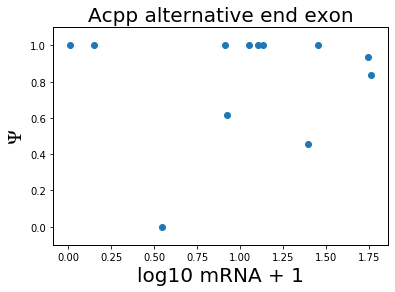

In [127]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Acpp_AE']+1), shalek_PSI.loc['Acpp_AE', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Acpp alternative end exon', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.show()

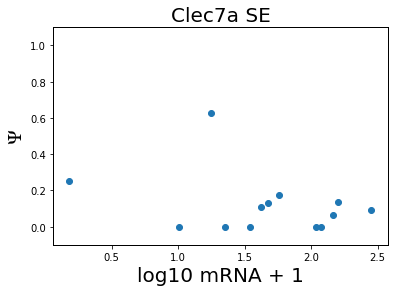

In [128]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Clec7a_other_1']+1), 
            shalek_PSI.loc['Clec7a_other_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec7a SE', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()



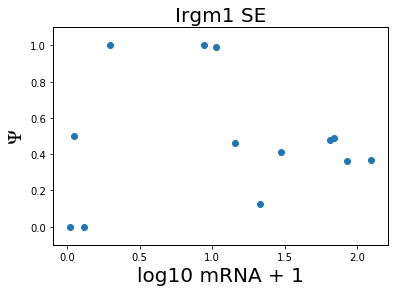

In [129]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Irgm1_1']+1), 
            shalek_PSI.loc['Irgm1_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irgm1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


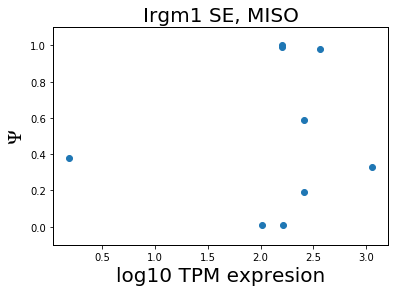

In [130]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['IRGM1', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Irgm1', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irgm1 SE, MISO', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.show()

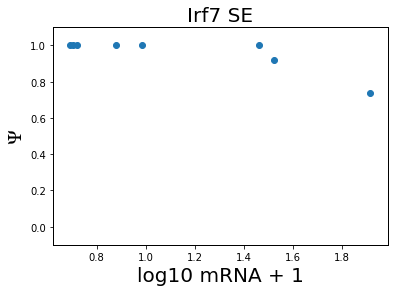

In [131]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Irf7_1']+1), 
            shalek_PSI.loc['Irf7_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irf7 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


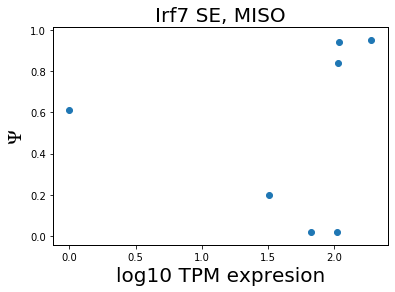

In [132]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['IRF7', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Irf7', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irf7 SE, MISO', fontsize = 20)
plt.show()

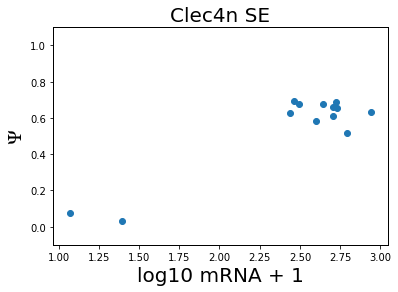

In [133]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Clec4n_2']+1), 
            shalek_PSI.loc['Clec4n_2', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec4n SE', fontsize = 20)
plt.show()


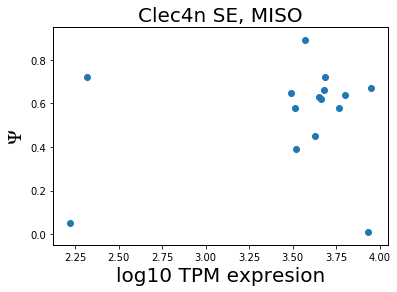

In [134]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['CLEC4N', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec4n SE, MISO', fontsize = 20)
plt.show()

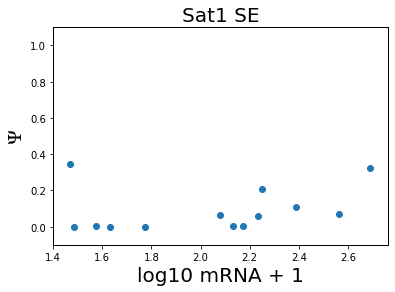

In [135]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Sat1_nmdSE_1']+1), 
            shalek_PSI.loc['Sat1_nmdSE_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Sat1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()



In [136]:
# Not in their paper

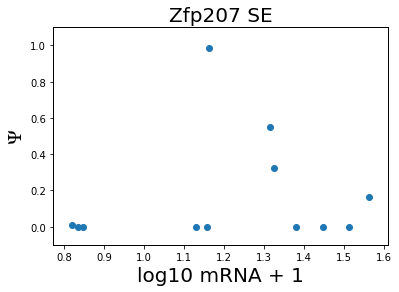

In [137]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Zfp207_2']+1), 
            shalek_PSI.loc['Zfp207_2', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Zfp207 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


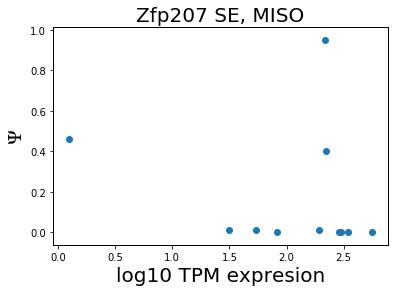

In [138]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['ZFP207', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Zfp207', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Zfp207 SE, MISO', fontsize = 20)
plt.show()

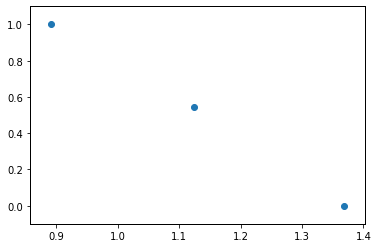

In [139]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Psmg4_1']+1), 
            shalek_PSI.loc['Psmg4_1', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

In [140]:
# not in their paper

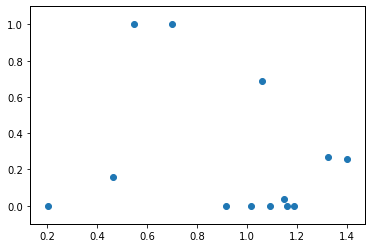

In [141]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_1']+1), 
            shalek_PSI.loc['Abi1_1', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

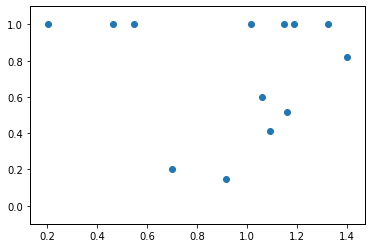

In [142]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_3']+1), 
            shalek_PSI.loc['Abi1_3', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

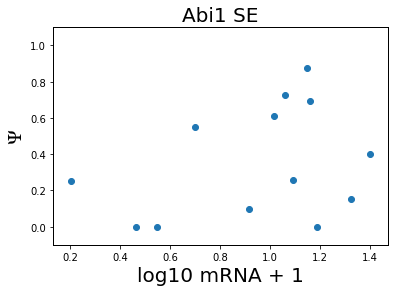

In [143]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_7']+1), 
            shalek_PSI.loc['Abi1_7', mrna_per_event_shalek.columns])

plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Abi1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()

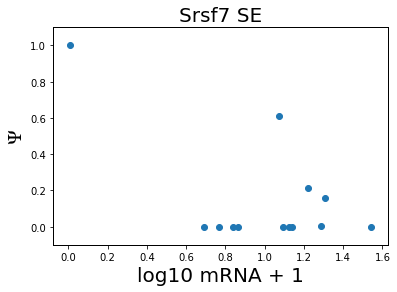

In [144]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Srsf7_nmdSE_1']+1), 
            shalek_PSI.loc['Srsf7_nmdSE_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Srsf7 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

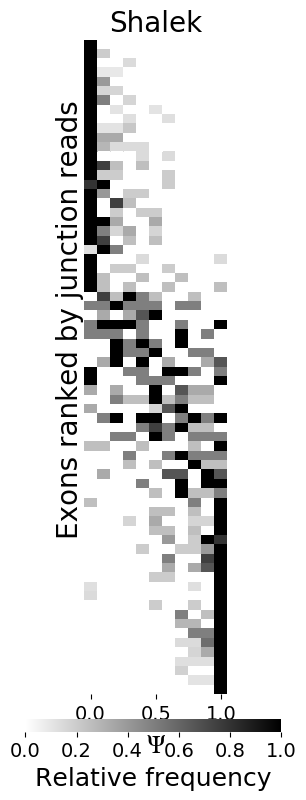

In [145]:
shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]
shalek_PSI_filtered, shalek_PSI_mrna_filtered, shalek_good_exons, mrna_filtered, reads_filtered = filter_psi(shalek_PSI, 
                                            shalek_int_exons, mrna_per_event_shalek, shalek_coverage_tab['SJ_coverage'], 
                                                                        shalek_read_counts, 10,
                                                                       cell_min=0.5)

good_cells = shalek_PSI_filtered.columns[shalek_PSI_filtered.isna().mean() <= 0.5]
shalek_PSI_good = shalek_PSI_filtered[good_cells]

shalek_hist_complete_f, shalek_hist_intermediate_f = scp.get_bins_table2(shalek_PSI_filtered, mrna_filtered, 11)


import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

hist_list = [shalek_hist_complete_f]

dset_name_list = ['Shalek']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_shalek',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

In [146]:
shalek_PSI_filtered.index

Index(['Abi1_7', 'Aldoa_2', 'Anxa4_1', 'Anxa4_2', 'Anxa6_1', 'Ap2m1_1',
       'Atp5j2_2', 'Atp5j_1', 'Capg_1', 'Cd300lf_2', 'Cd40_2', 'Cd44_1',
       'Cd68_1', 'Cd74_1', 'Ciapin1_2', 'Cish_1', 'Cldnd1_3', 'Clec4a2_1',
       'Clec4n_2', 'Clec5a_1', 'Clec7a_other_1', 'Csde1_4', 'Dab2_5',
       'Dnajc8_3', 'Dpep2_2', 'Eef1d_3', 'Eif4g2_1', 'Ergic2_3',
       'Ergic2_nmdSE_1', 'Fcgr2b_1', 'Fcgr2b_2', 'Hnrnpa1_1', 'Hnrnpa2b1_1',
       'Hnrnpa2b1_2', 'Hnrnpa2b1_3', 'Ifi35_1', 'Igf1_1', 'Il2rg_1', 'Irgm1_1',
       'Lat2_1', 'Lcp1_1', 'Ly6e_3', 'Mbnl1_10', 'Mbnl1_2', 'Mbnl1_4',
       'Mbnl1_6', 'Mbnl1_8', 'Mbnl1_9', 'Mndal_1', 'Morf4l1_3', 'Ndufa7_1',
       'Ndufv3_1', 'Prr13_1', 'Ptprc_1', 'Rsu1_1', 'Samhd1_1', 'Sat1_nmdSE_1',
       'Slamf7_1', 'Sp100_1', 'Sp100_2', 'Sp100_4', 'Srsf3_nmdSE_1',
       'Srsf7_nmdSE_1', 'Tank_other_2', 'Tarm1_1', 'Tmbim6_1', 'Tpm3_1',
       'U2surp_2', 'Vps29_1', 'Zfp207_2'],
      dtype='object')

In [147]:
shalek_paper_bin_exon = ['Acpp_AE', 'Clec7a_other_1', 'Irgm1_1', 'Irf7_1', 'Clec4n_2', 'Sat1_nmdSE_1', 'Zfp207', 
                         'Abi1_7', 'Srsf7_nmdSE_1', 'Psmg4_1']

In [148]:
for event in [x for x in shalek_paper_bin_exon if x in shalek_PSI_filtered.index]:
    print(event)
    print(shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.25))
    print(shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.75))

Clec7a_other_1
0.0
0.13411938098747234
Irgm1_1
0.3618864292589028
0.5
Clec4n_2
0.5853566009104704
0.6755955139493929
Sat1_nmdSE_1
0.0014144271570014145
0.11048371917937136
Abi1_7
0.0995260663507109
0.6094674556213018
Srsf7_nmdSE_1
0.0
0.1562189054726368


In [149]:
shalek_PSI.loc['Abi1_7', mrna_per_event_shalek.columns].quantile(0.75)

0.6094674556213018

In [150]:
for event in shalek_PSI_filtered.index:
    q25 = shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.25)
    q75 = shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.75)
    
    if (q25 <= 0.25) and (q75 >= 0.75):
        print(event)
        print(q25)
        print(q75)

Slamf7_1
0.18222222222222226
0.7975543478260869


In [151]:
shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index[0],
                                         shalek_cells].quantile(0.25)


0.515

In [152]:
len(shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index)

1

In [153]:
for event in shalek_paper_bin_exon:
    gen = event.split('_')[0]
    if len(shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index) >= 1:
        print(event)
        print(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index[0],
                                         shalek_cells].quantile(0.25))
        print(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index[0],
                                         shalek_cells].quantile(0.75))

Irgm1_1
0.19
0.98
Irf7_1
0.11
0.8899999999999999
Clec4n_2
0.515
0.665
Zfp207
0.0
0.20500000000000002
Abi1_7
0.395
0.9


In [154]:
# Add: PCA on gene expression ofonly cells of certain type or cluster. See if it separates PSI.

In [155]:
[x for x in chen_PSI.index if 'Rbm4' in x]

['Rbm41_1',
 'Rbm41_3',
 'Rbm42_1',
 'Rbm43_1',
 'Rbm44_1',
 'Rbm47_2',
 'Rbm47_5',
 'Rbm48_1',
 'Rbm4_1']

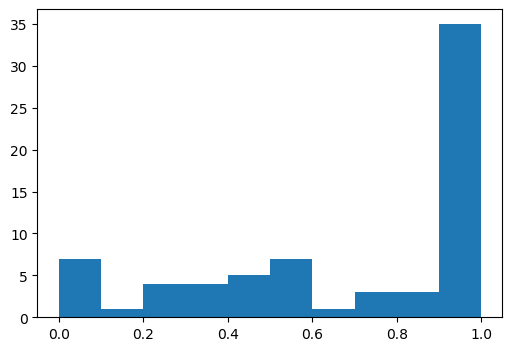

In [156]:
figsize(6, 4)
plt.hist(chen_PSI.loc['Rbm4_1', chen_MN].dropna())
plt.show()

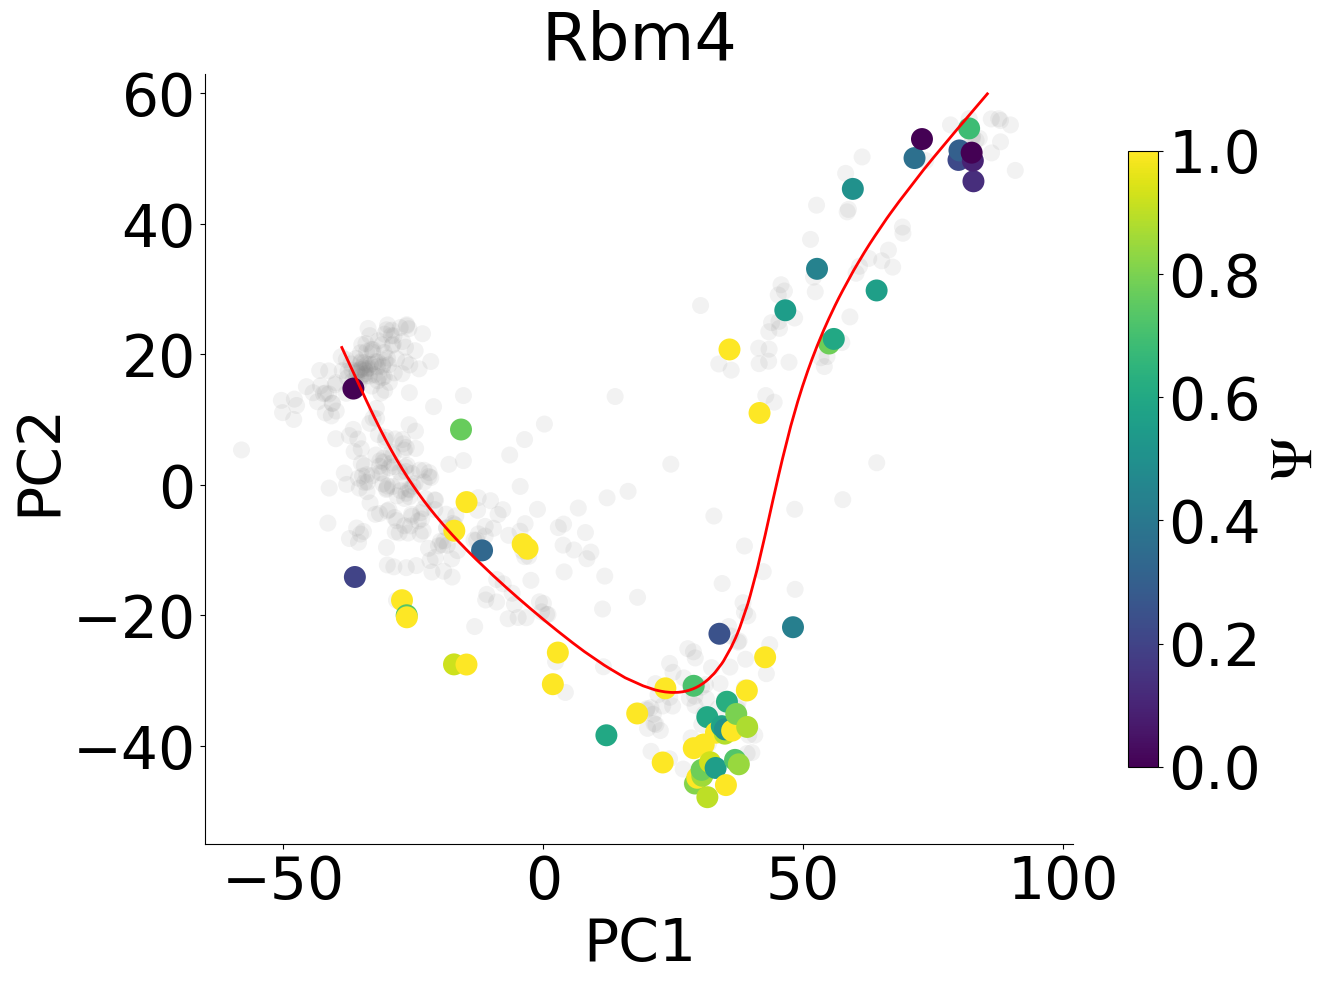

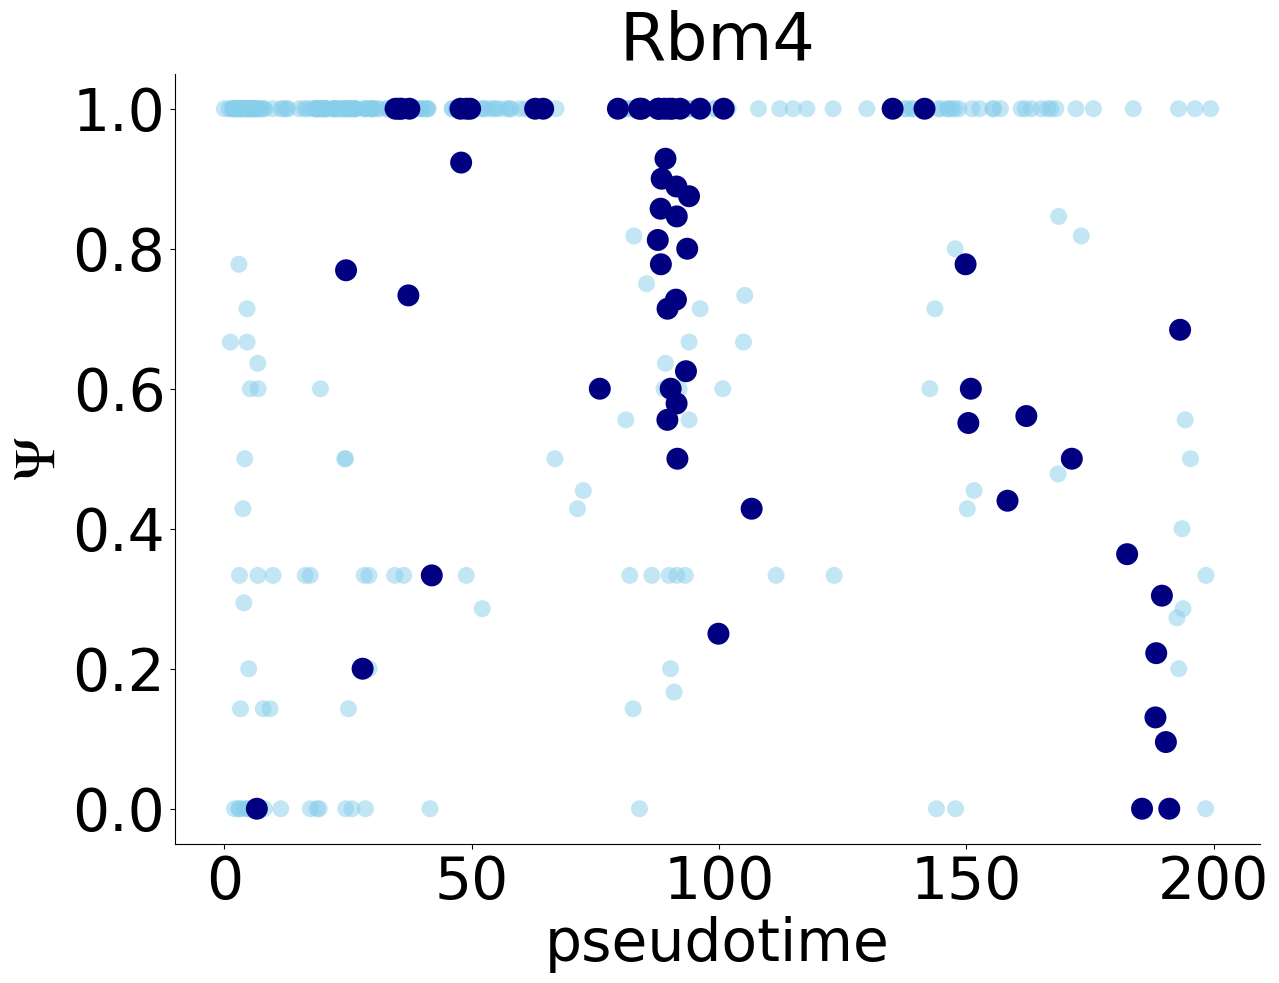

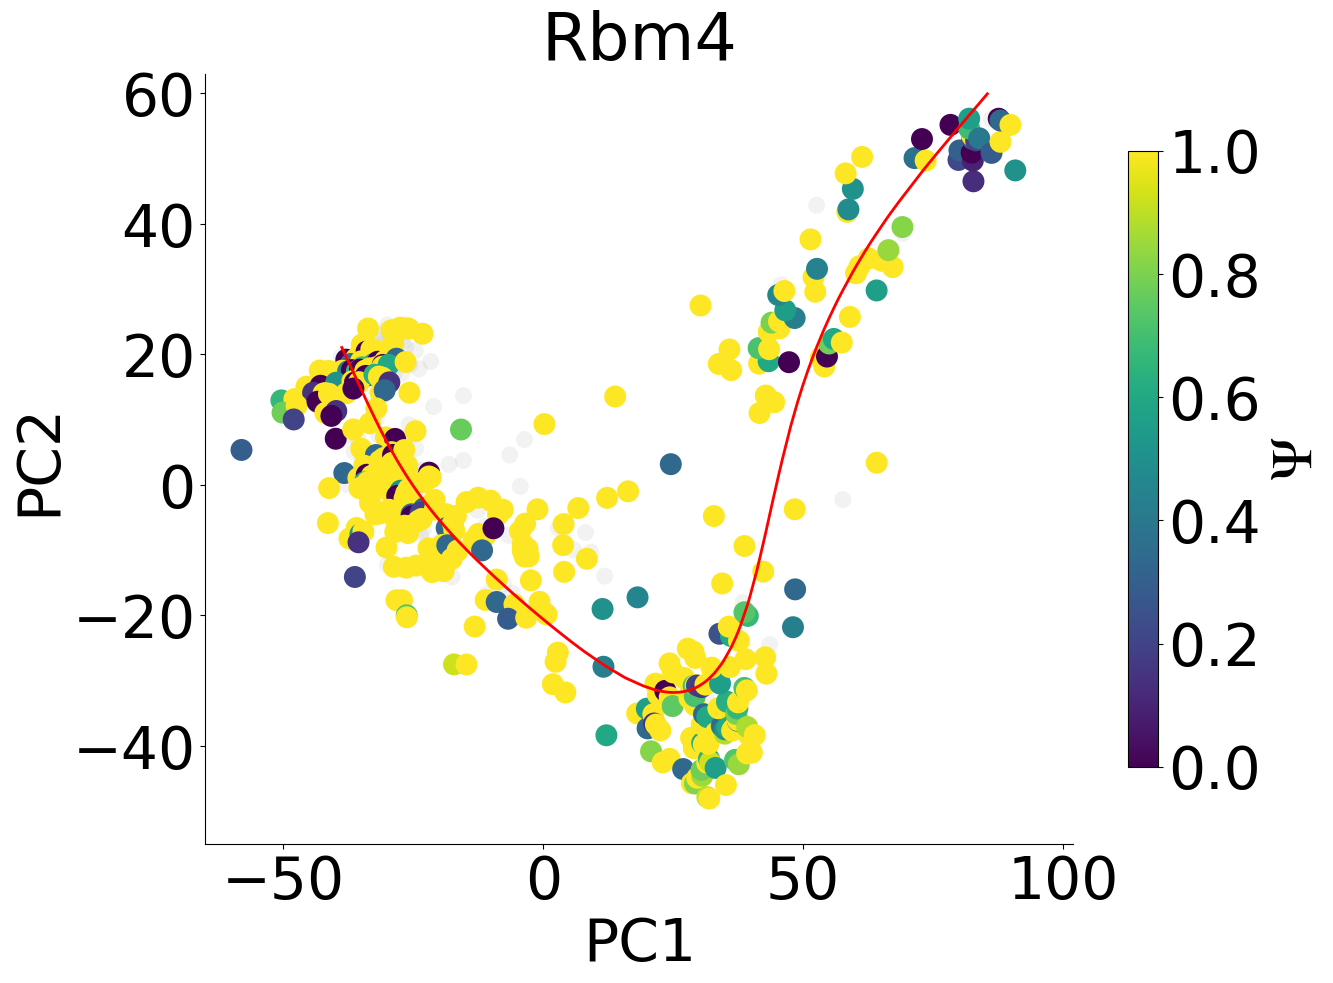

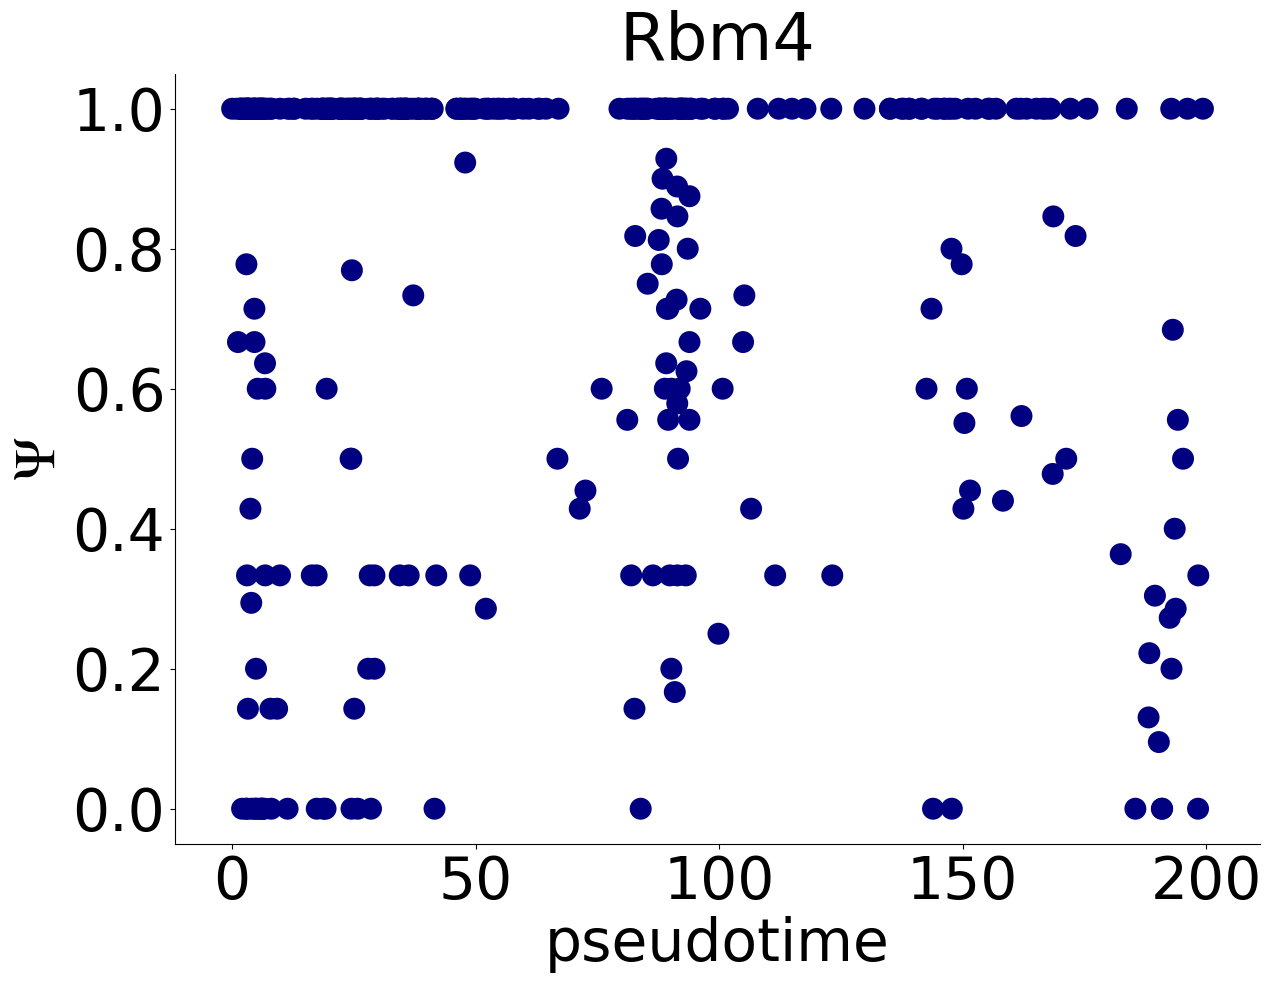

In [157]:
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Rbm4_1', 10, plot_dir='plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Rbm4_1', 10, plot_dir='plots_review/figure3/events/', filter_cells=False)



In [158]:
def plot_pca(pca_tab, psi_tab, mrna_tab, reads_tab, cj, event, mrna_min, plot_dir, cmap='viridis', filter_cells=True):
    
    #pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (rpm_tab.loc[event] >= rpm_tab.mean(axis=1).quantile(0.1))]
    
    
    if filter_cells:
        read_min = mrna_min*cj*(1+psi_tab.loc[event])

        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (reads_tab.loc[event] >= read_min)]
        
    else:
        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > -1) & (reads_tab.loc[event] >= -1)]


    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.PC1, pca_tab.PC2, c='gray', s=150, edgecolors='none', alpha=0.1)
    sc = ax.scatter(pca_tab.loc[pass_cells, 'PC1'], pca_tab.loc[pass_cells, 'PC2'], 
                c=psi_tab.loc[event, pass_cells], s=250, edgecolors='none', vmin=0, vmax=1, cmap=cmap)
    
    ax.plot(pca_tab.line_1, -pca_tab.line_2, c='red',linewidth=2)

    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    
#     ax.set_xlim([-65, 102])
#     ax.set_ylim([-55, 63])
    
    cb = plt.colorbar(sc, shrink = 0.8)
    cb.set_label(label='$\Psi$',size=42)
    cb.ax.tick_params(labelsize=42)
    
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.tick_params(labelsize=42)

    plt.ylabel('PC2', fontsize=42)
    plt.xlabel('PC1', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)
    
    if filter_cells:

        plt.savefig(plot_dir+event+'.pca.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.png', dpi=300, bbox_inches='tight')
        
    else:
        
        plt.savefig(plot_dir+event+'.pca.no_filter.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.no_filter.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.no_filter.png', dpi=300, bbox_inches='tight')

        
    
    
    #plt.show()
    
    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.pseudotime, psi_tab.loc[event], c='skyblue', s=150, edgecolors='none', alpha=0.5)
    ax.scatter(pca_tab.loc[pass_cells, 'pseudotime'], psi_tab.loc[event, pass_cells], 
                c='navy', s=250, edgecolors='none')
    
    ax.set_ylim((-0.05,1.05))
    
    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.tick_params(labelsize=42)

    plt.ylabel('$\Psi$', fontsize=42)
    plt.xlabel('pseudotime', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)

    if filter_cells:
    
        plt.savefig(plot_dir+event+'.pseudotime.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.png', dpi=300, bbox_inches='tight')
        
    else:
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    


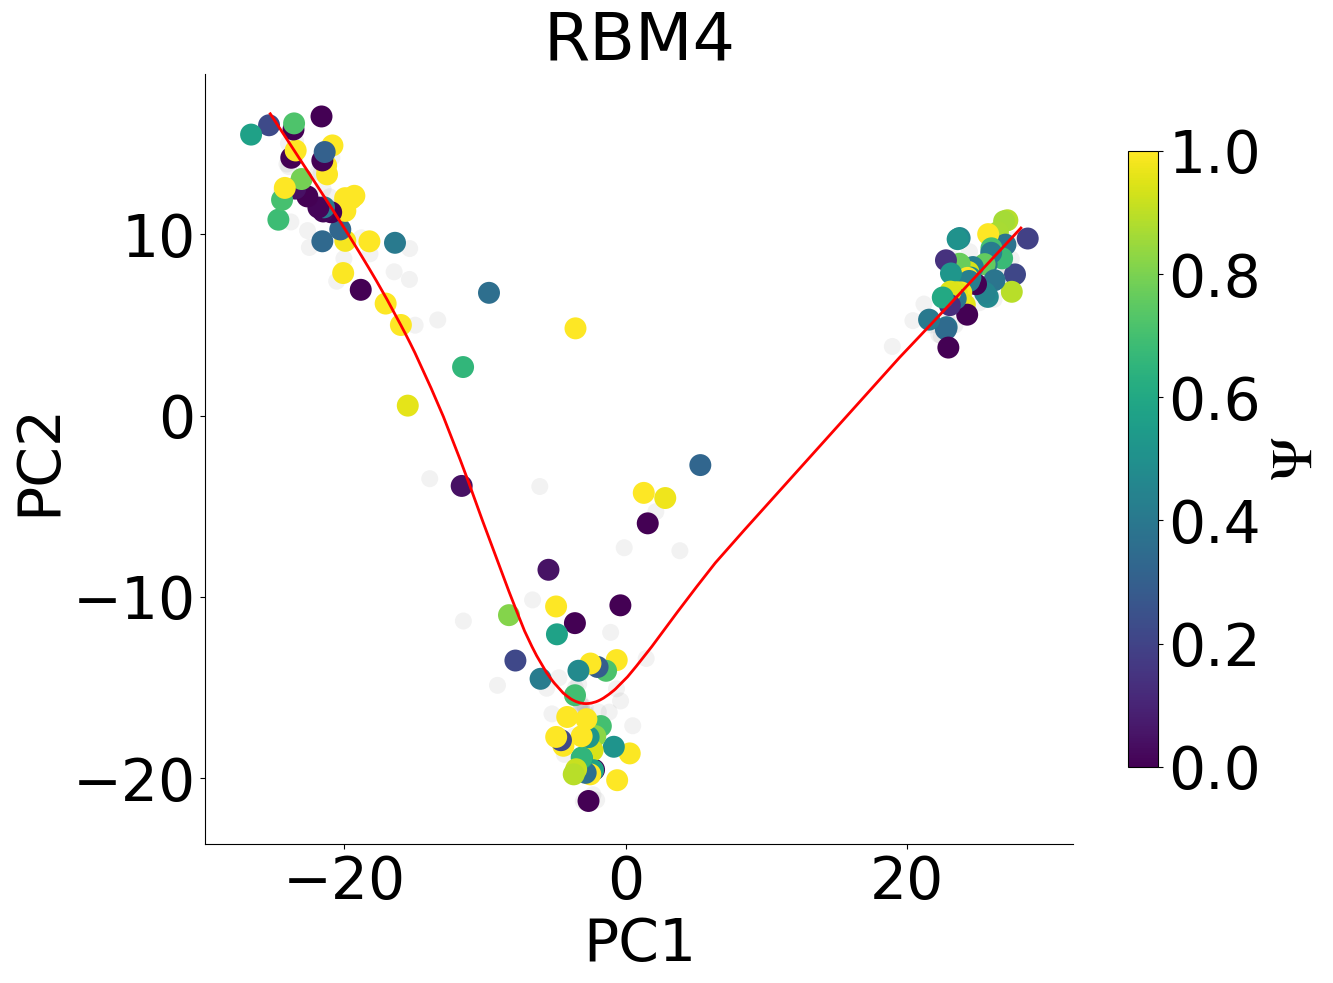

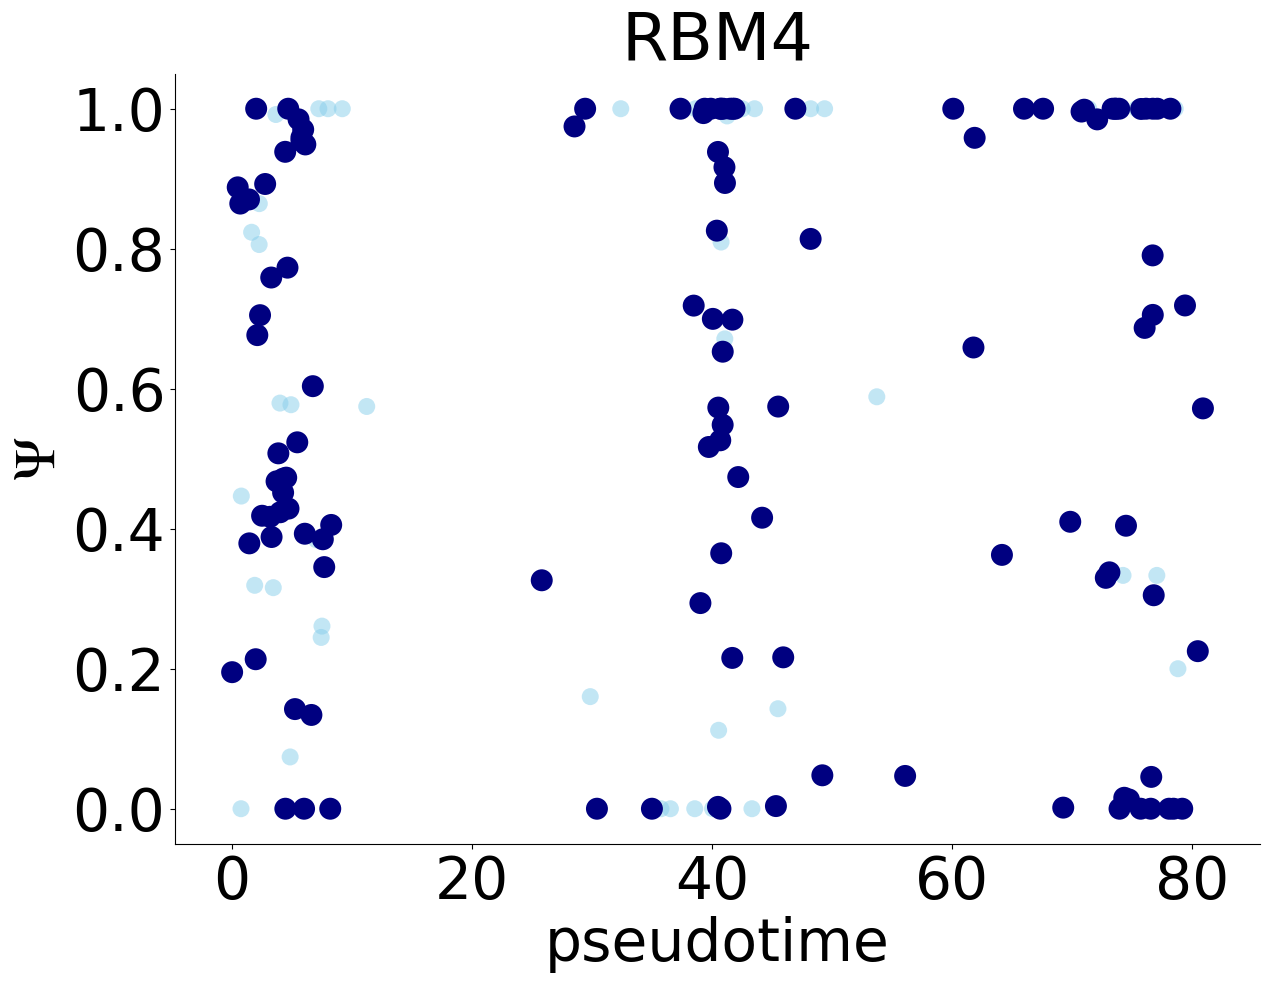

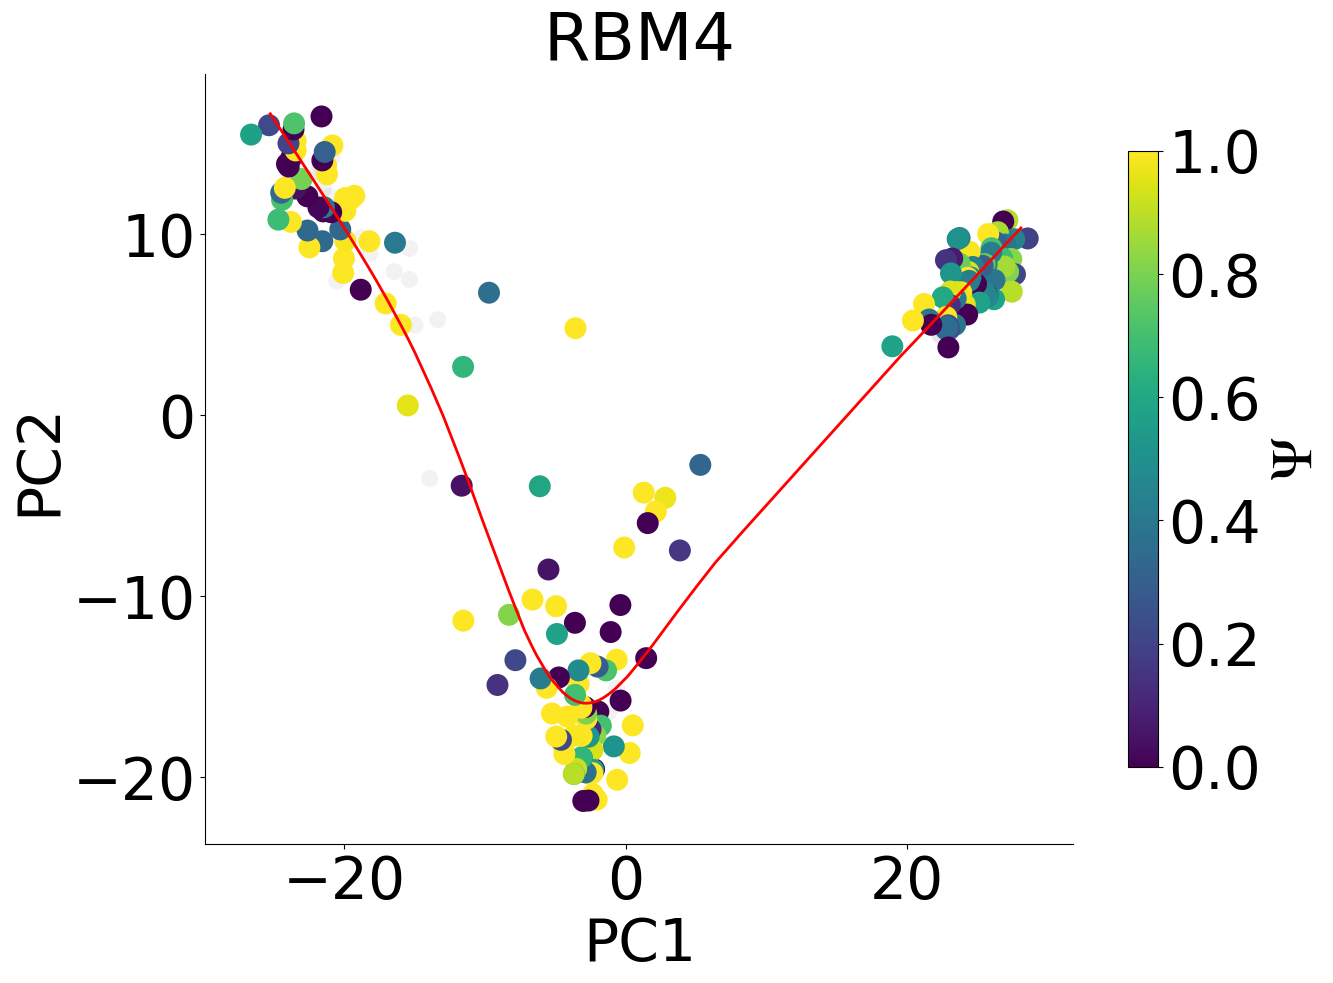

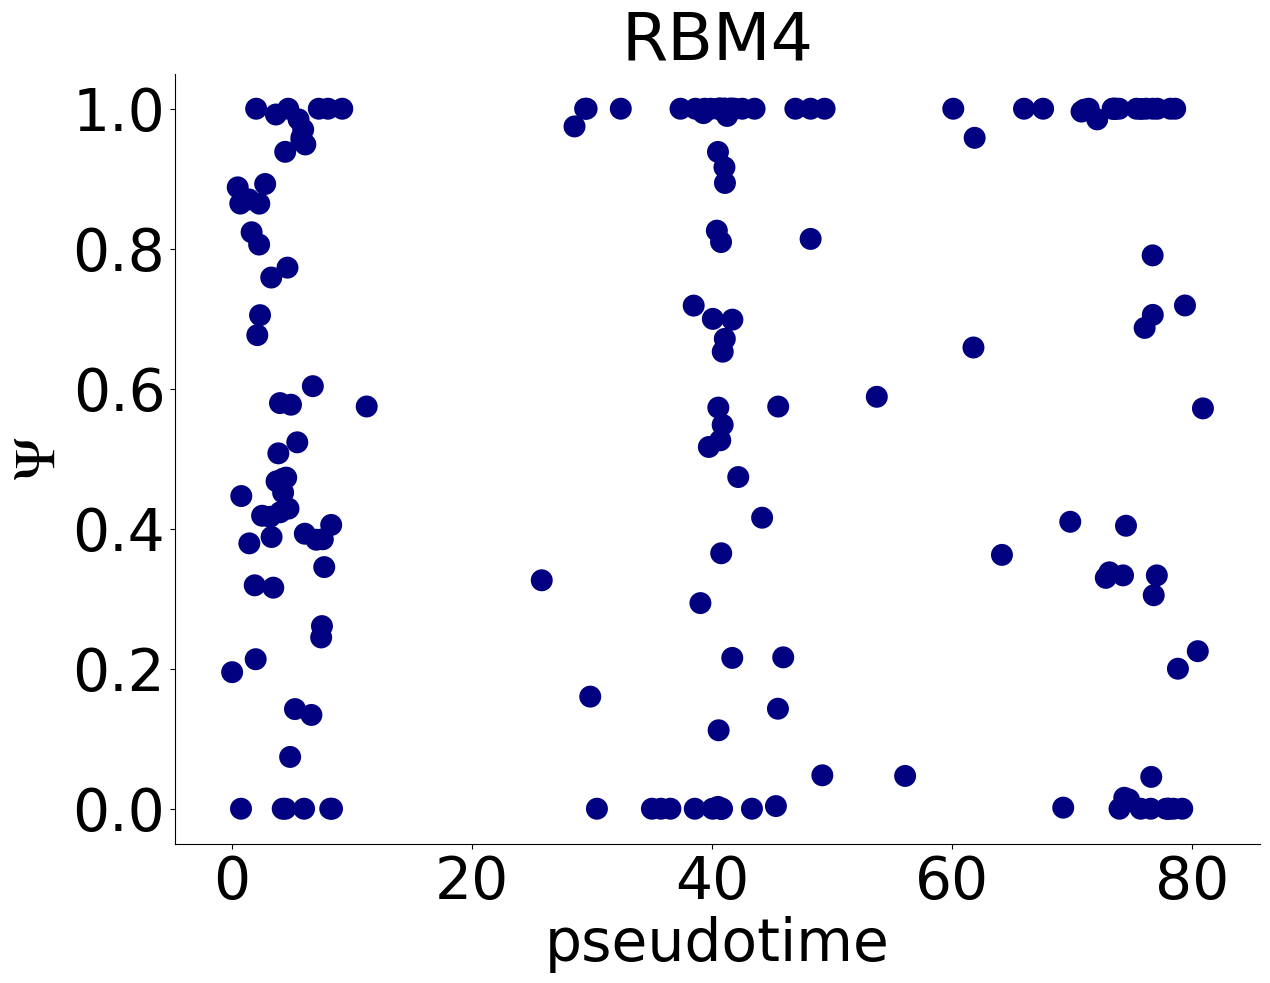

In [159]:
plot_pca(song_pca, song_PSI, mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 
             'RBM4_2', 10, plot_dir='plots_review/figure3/events/')
plot_pca(song_pca, song_PSI, mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 
             'RBM4_2', 10, plot_dir='plots_review/figure3/events/', filter_cells=False)



In [160]:
# Check bam alignments for RBM4
# Regression for bursts kinetics and bimodalty
# COntrol by expression, see of there are differences high freq low size, viceversa

In [220]:
chen_selected_exons = []
for clust in chen_clust_filter:
    chen_selected_exons.extend(list(clust[0].index))
    
chen_selected_exons = sorted(set(chen_selected_exons))

In [221]:
len(chen_selected_exons)

319

In [943]:
aver = filter_psi(chen_PSI.loc[chen_selected_exons], chen_selected_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'],
          chen_read_counts, 10, 0, 0)

In [583]:
aver_total = aver[0].T.corr().dropna().index
# aver[0].loc[aver_total].T.corr()

In [350]:
aver_total_ = aver[0].T.corr().index
aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0.01]
#aver[0].loc[aver_total_]

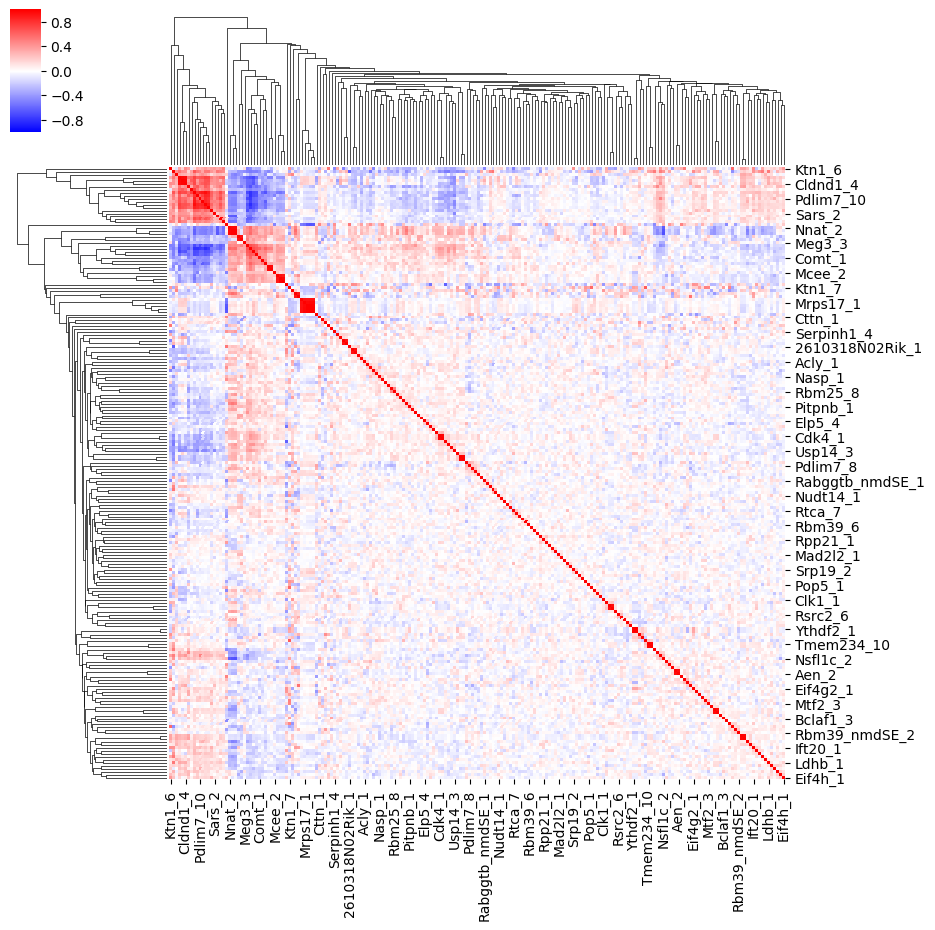

In [289]:
sns.clustermap(aver[0].loc[aver_total_].T.corr().fillna(0), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [290]:
aver = filter_psi(chen_PSI.loc[chen_selected_exons], chen_selected_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'],
          chen_read_counts, 10, 0, 0)

aver_total_ = aver[0].T.corr().index
aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0.01]
#aver[0].loc[aver_total_]


aver_filtered_ = []
aver_filtered_basura_ = []
for x in aver_total_:
    if x.split('_')[:-1] not in aver_filtered_basura_:
        aver_filtered_.append(x)
        aver_filtered_basura_.append(x.split('_')[:-1])

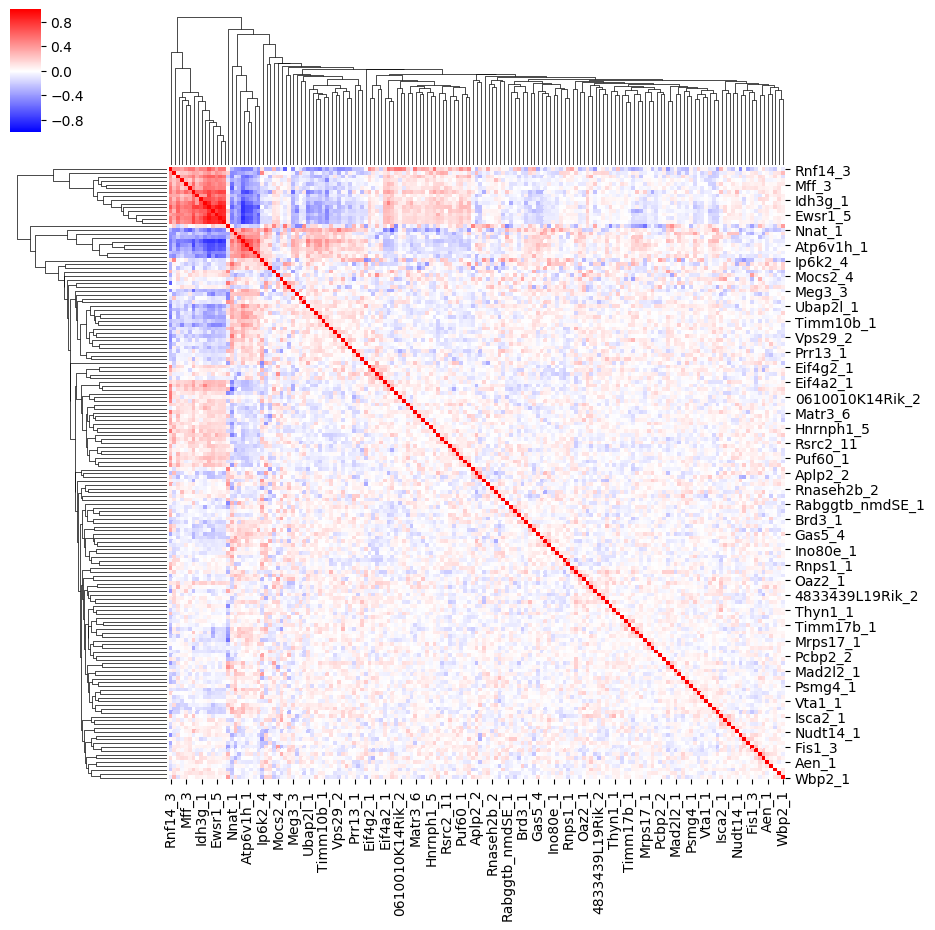

In [291]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered_].T.corr().fillna(0), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [349]:
# figsize(4,4)
# sns.clustermap(aver[0].loc[aver_filtered_].T.corr(method='spearman').fillna(0), cmap=cm.bwr, vmin=-1, vmax=1)
# plt.show()

In [293]:
len(aver_filtered_)

161

In [348]:
# figsize(4,4)
# sns.clustermap(aver[0].loc[aver_filtered_].corr(method='spearman').fillna(0), cmap=cm.bwr)
# plt.show()

In [345]:
from scipy.stats import zscore
# zscore(aver[0].loc[aver_filtered_])

In [323]:
aver_finale = aver[0].loc[aver_filtered_]#
aver_finale = pd.DataFrame(zscore(aver_finale.T.fillna(aver_finale.T.mean()).T))
aver_finale.columns = aver[0].columns
aver_finale.index = aver_filtered_

In [346]:
# sns.clustermap(aver_finale.corr(method='spearman'), cmap=cm.viridis)
# plt.show()

In [347]:
# sns.clustermap(aver_finale.T.corr(method='spearman'), cmap=cm.bwr, vmin=-1, vmax=1)
# plt.show()

In [420]:
chen_coverage_tab['zero'] = [0]*len(chen_coverage_tab.index)

In [465]:
song_coverage_tab['zero'] = [0]*len(song_coverage_tab.index)
trapnell_coverage_tab['zero'] = [0]*len(trapnell_coverage_tab.index)
lescroart_coverage_tab['zero'] = [0]*len(lescroart_coverage_tab.index)

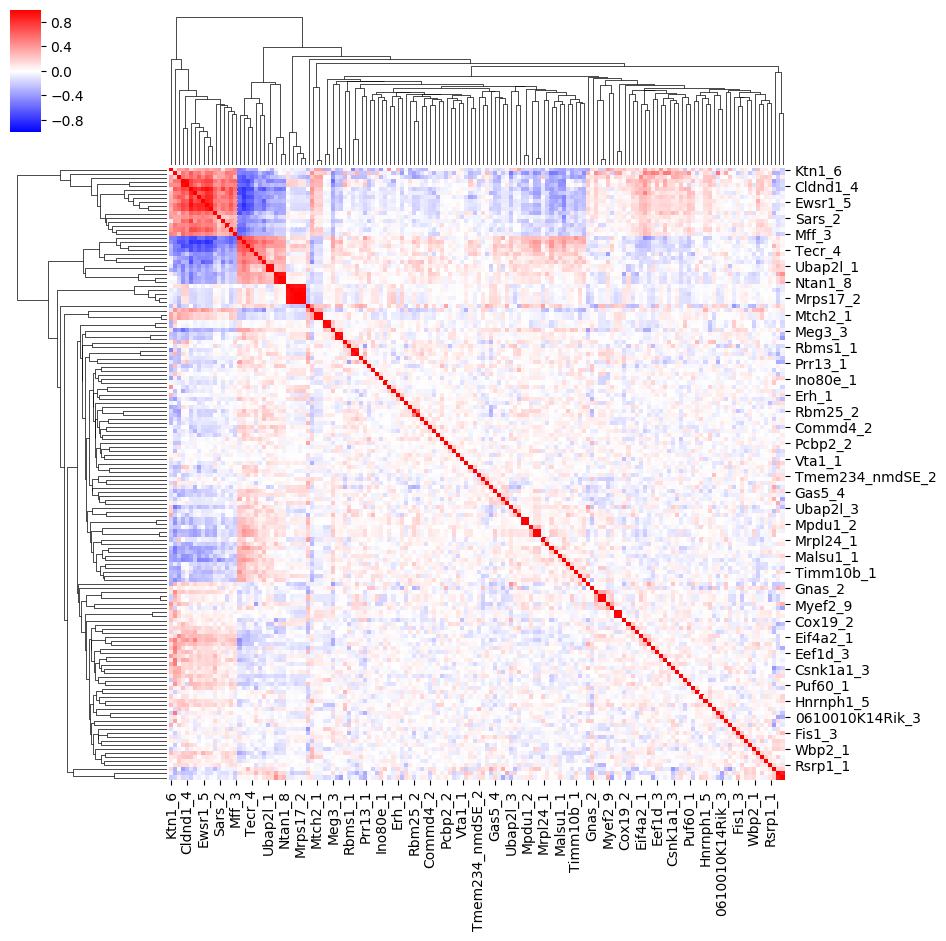

In [257]:
sns.clustermap(aver[0].loc[aver_total].T.corr(), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [261]:
aver_filtered = []
aver_filtered_basura = []
for x in aver_total:
    if x.split('_')[:-1] not in aver_filtered_basura:
        aver_filtered.append(x)
        aver_filtered_basura.append(x.split('_')[:-1])

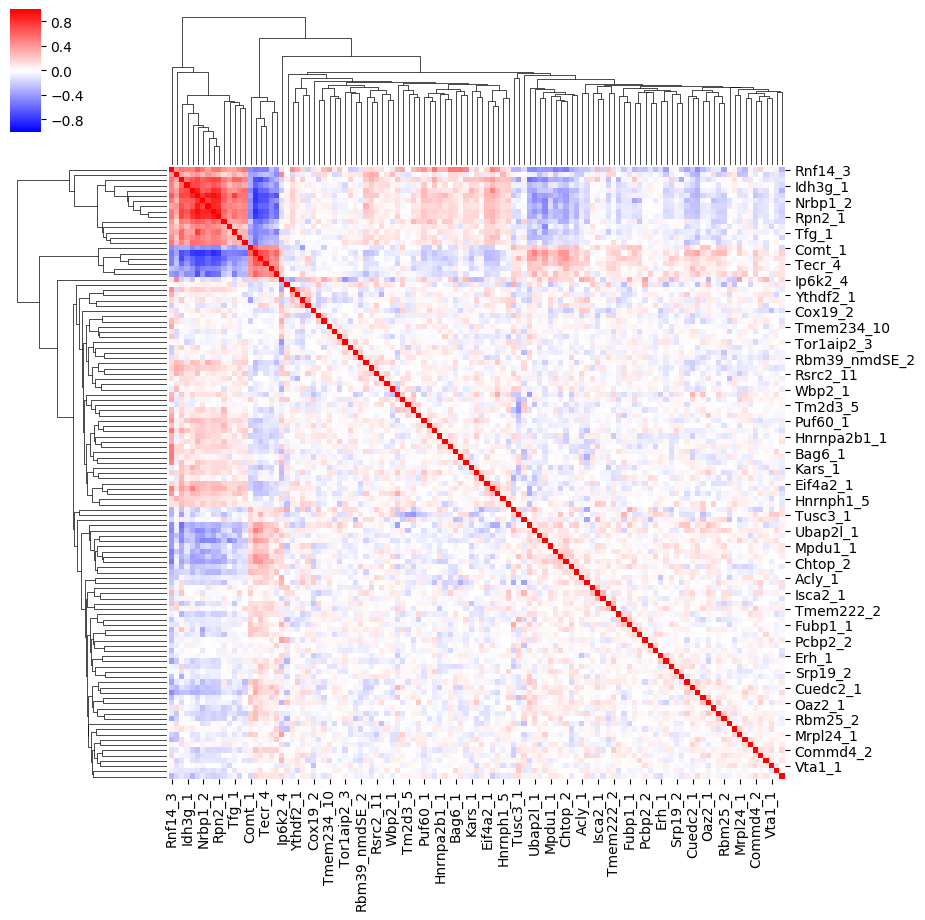

In [266]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered].T.corr(), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

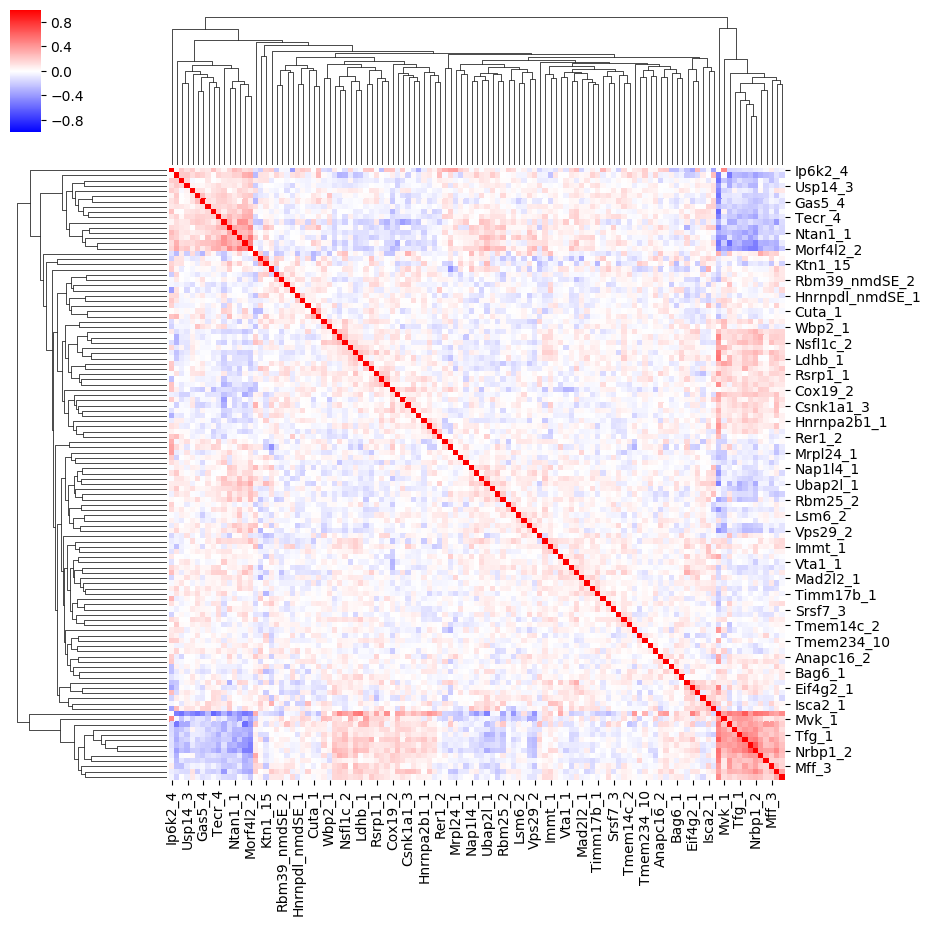

In [267]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered].T.corr(method='spearman'), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

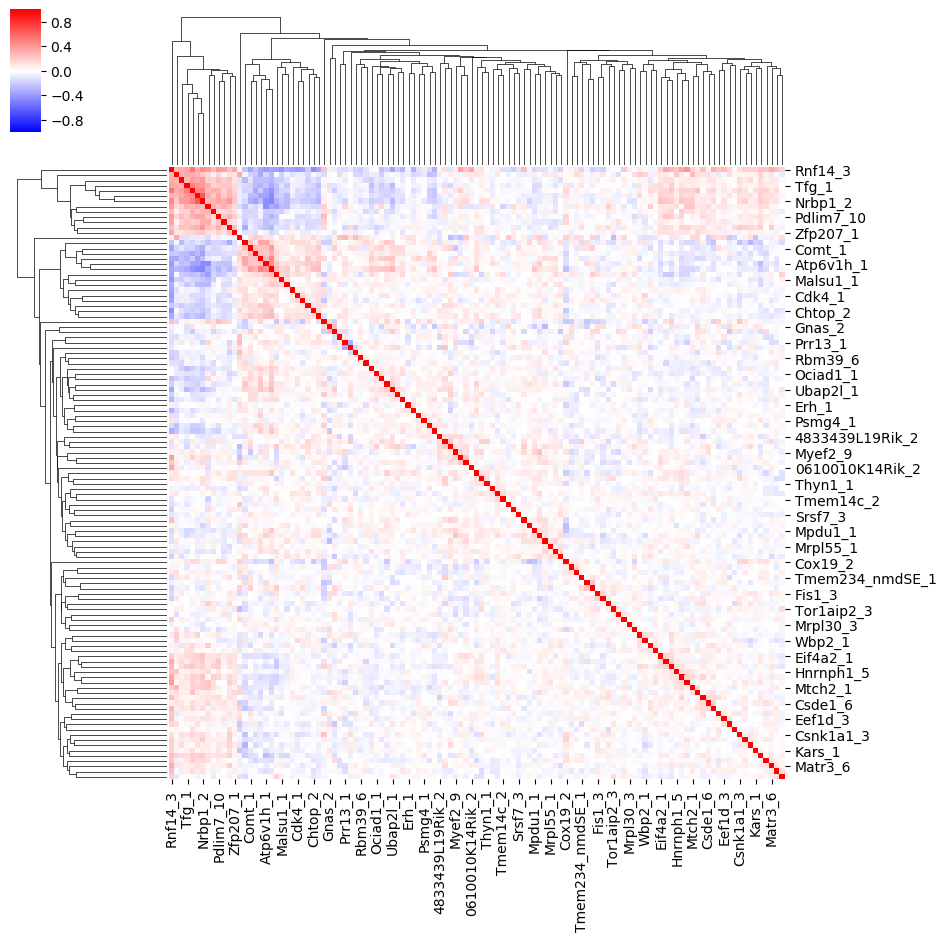

In [268]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered].T.corr(method='kendall'), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [205]:
chen_selected_exons = list(chen_clust_filter[0][0].index)
for clust in chen_clust_filter:
    chen_selected_exons = [x for x in list(clust[0].index) if x in chen_selected_exons]
    
chen_selected_exons = sorted(set(chen_selected_exons))

In [207]:
aver = filter_psi(chen_PSI.loc[chen_selected_exons], chen_selected_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'],
          chen_read_counts, 10, 0, 0)

In [617]:
def best_friends(psi_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, method = 'best_friend',
                 na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, quant=0.9, top_friends=5):

    int_genes, int_exons = spu.get_int_events(psi_tab[subpop], mrna_counts, psi_min)
    int_exons = [x for x in int_exons if x in mrna_per_event.index]


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].T.corr().index
    aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    aver_filtered_ = []
    aver_filtered_basura_ = []
    for x in aver_total_:
        if x.split('_')[:-1] not in aver_filtered_basura_:
            aver_filtered_.append(x)
            aver_filtered_basura_.append(x.split('_')[:-1])

    best_friends = []
    aver_filtered_cor = aver[0].loc[aver_filtered_].T.corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0].loc[aver_filtered_].isna().mean().mean())
    print(len(aver_filtered_))


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], 0, read_min, cell_min)

    aver_total_ = aver[0].T.corr().index
    aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    aver_filtered_ = []
    aver_filtered_basura_ = []
    for x in aver_total_:
        if x.split('_')[:-1] not in aver_filtered_basura_:
            aver_filtered_.append(x)
            aver_filtered_basura_.append(x.split('_')[:-1])

    best_friends_2 = []
    aver_filtered_cor = aver[0].loc[aver_filtered_].T.corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_2.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0].loc[aver_filtered_].isna().mean().mean())
    print(len(aver_filtered_))


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'zero'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].T.corr().index
    aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    aver_filtered_ = []
    aver_filtered_basura_ = []
    for x in aver_total_:
        if x.split('_')[:-1] not in aver_filtered_basura_:
            aver_filtered_.append(x)
            aver_filtered_basura_.append(x.split('_')[:-1])

    best_friends_3 = []
    aver_filtered_cor = aver[0].loc[aver_filtered_].T.corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_3.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0].loc[aver_filtered_].isna().mean().mean())
    print(len(aver_filtered_))


    figsize(6,4)
    plt.hist(best_friends, alpha=0.5, density=True)
    plt.hist(best_friends_2, alpha=0.5, density=True)
    plt.hist(best_friends_3, alpha=0.5, density=True)
    plt.show()
    
    return np.mean(best_friends), np.mean(best_friends_2), np.mean(best_friends_3)

0.12499999999999993
60
0.14212488350419386
58
0.13203828828828829
96


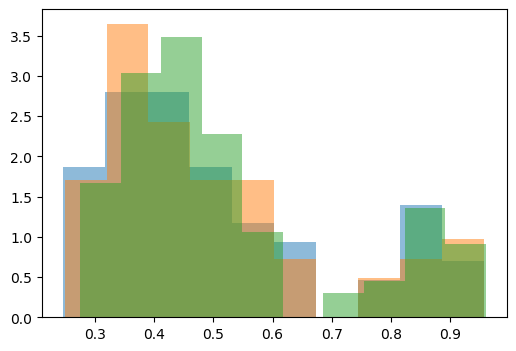

In [585]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=5, read_min = 5, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

0.2743725868725869
112
0.30326838466373357
129
0.2586753420086753
162


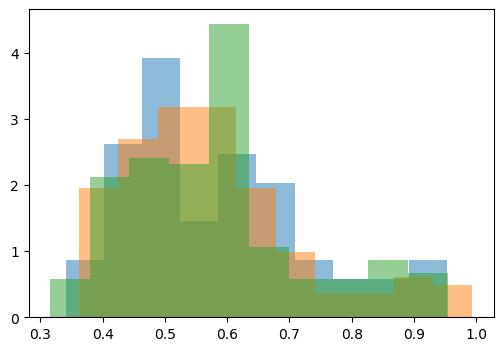

In [492]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.2743725868725869
112
0.30326838466373357
129
0.2586753420086753
162


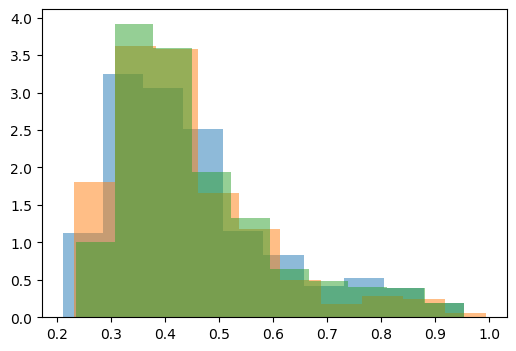

In [497]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'top_friends', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=10)

0.2743725868725869
112
0.30326838466373357
129
0.2586753420086753
162


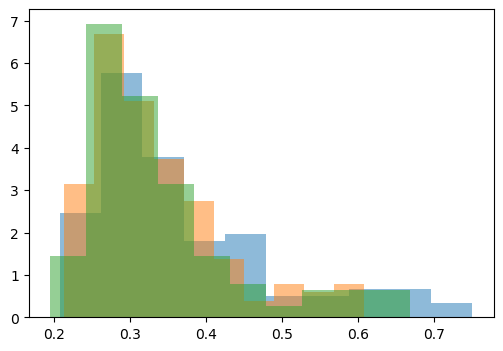

In [502]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.25005464480874323
200
0.28276291822452315
114
0.23457368375401155
315


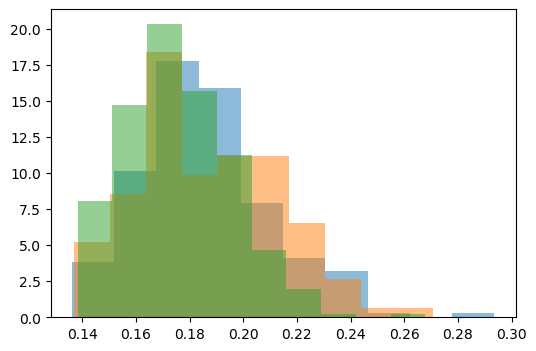

In [521]:
best_friends(chen_PSI, chen_Epi, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.22582949308755765
200
0.2652999698522761
107
0.21305827124337823
321


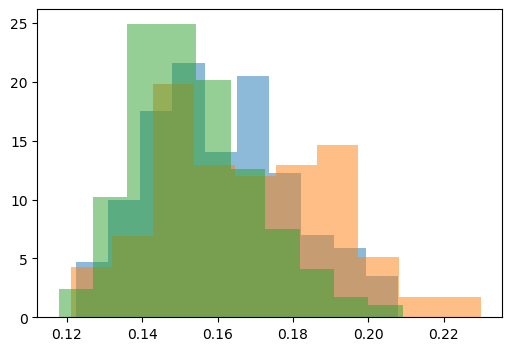

In [522]:
best_friends(chen_PSI, chen_clusters[0], chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.2615610472229019
67
0.26805840163934425
32
0.2513661202185795
117


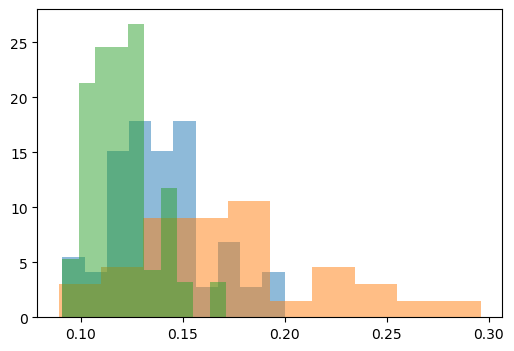

In [524]:
best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.2, 
             quant=0.9, top_friends=5)

0.25367741935483873
125
0.026315789473684213
190
0.15491675338189384
124


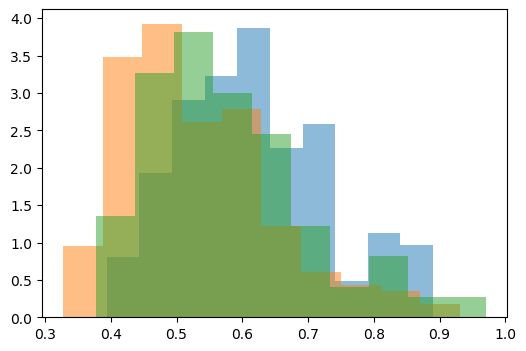

In [517]:
best_friends(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.32266377322663786
73
0.3168316831683168
373
0.3080515598729686
106


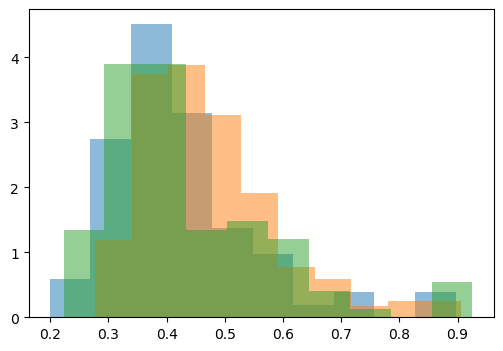

In [525]:
best_friends(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [588]:
def best_friends_cells(psi_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, method = 'best_friend',
                 na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, quant=0.9, top_friends=5):

    int_genes, int_exons = spu.get_int_events(psi_tab[subpop], mrna_counts, psi_min)
    int_exons = [x for x in int_exons if x in mrna_per_event.index]


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].corr().index
    aver_total_ = aver_total_[aver[0][aver_total_].corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    best_friends = []
    aver_filtered_cor = aver[0][aver_total_].corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0][aver_total_].isna().mean().mean())
    print(len(aver_total_))
    print(aver[0][aver_total_].shape)


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], 0, read_min, cell_min)

    aver_total_ = aver[0].corr().index
    aver_total_ = aver_total_[aver[0][aver_total_].corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    best_friends_2 = []
    aver_filtered_cor = aver[0][aver_total_].corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_2.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0][aver_total_].isna().mean().mean())
    print(len(aver_total_))
    print(aver[0][aver_total_].shape)

    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'zero'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].corr().index
    aver_total_ = aver_total_[aver[0][aver_total_].corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    best_friends_3 = []
    aver_filtered_cor = aver[0][aver_total_].corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_3.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0][aver_total_].isna().mean().mean())
    print(len(aver_total_))
    print(aver[0][aver_total_].shape)


    figsize(6,4)
    plt.hist(best_friends, alpha=0.5, density=True)
    plt.hist(best_friends_2, alpha=0.5, density=True)
    plt.hist(best_friends_3, alpha=0.5, density=True)
    plt.show()
    
    return np.mean(best_friends), np.mean(best_friends_2), np.mean(best_friends_3)

0.11902286902286899
74
(26, 74)
0.08407738095238095
64
(21, 64)
0.13169949610627574
74
(59, 74)


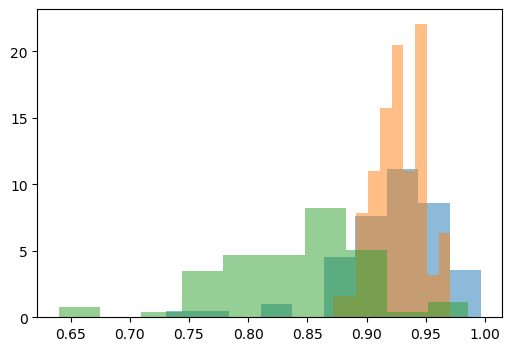

(0.9227831517332664, 0.9275614950127342, 0.8411185513166338)

In [589]:
best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

0.11902286902286899
74
(26, 74)
0.08407738095238095
64
(21, 64)
0.13169949610627574
74
(59, 74)


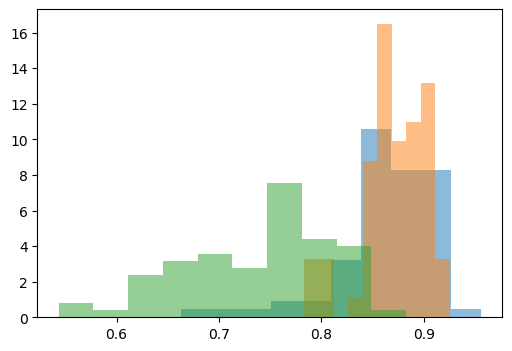

In [577]:
best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

0.11902286902286899
74
(26, 74)
0.08407738095238095
64
(21, 64)
0.13169949610627574
74
(59, 74)


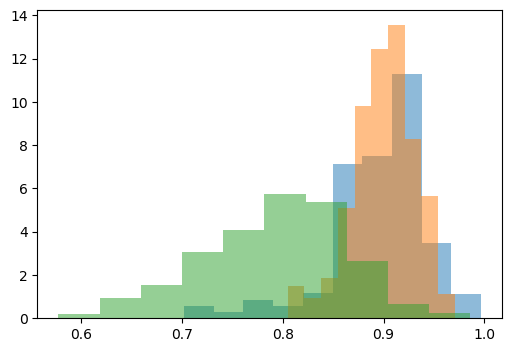

In [578]:
best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'top_friends', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

0.22994741953849762
111
(269, 111)
0.2525752844477946
111
(251, 111)
0.21554281554281543
111
(495, 111)


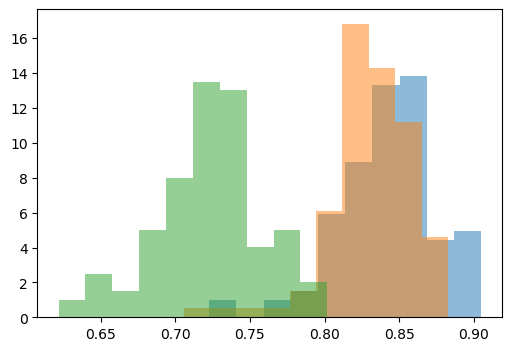

In [561]:
best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.2273088023088023
120
(231, 120)
0.25338888888888894
120
(300, 120)
0.21223051409618582
120
(402, 120)


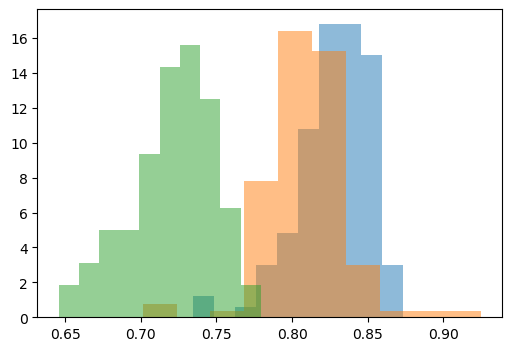

In [562]:
best_friends_cells(chen_PSI, chen_ES, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.23792653365653552
62
0.26663472798892796
62
0.2513709677419355
62


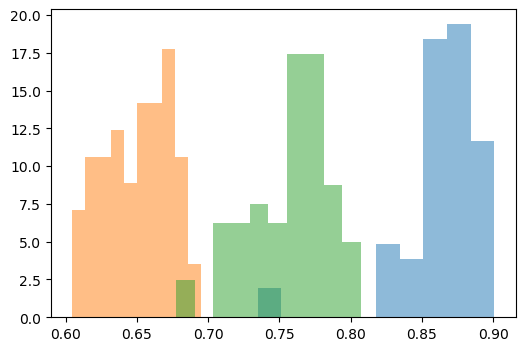

In [545]:
best_friends_cells(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.3035294117647056
70
0.3082479784366579
70
0.29813258636788026
70


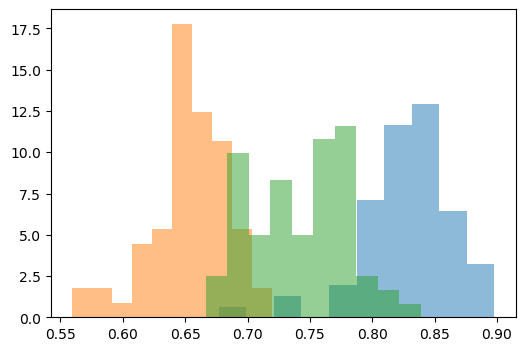

In [546]:
best_friends_cells(song_PSI, song_NPC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.24970131421744315
27
0.33131428571428584
70
0.3244087038789025
70


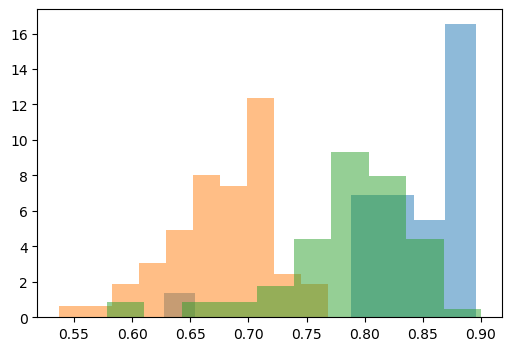

In [548]:
best_friends_cells(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.26153817752178427
488
0.28332437516796555
488
0.2556800095495781
488


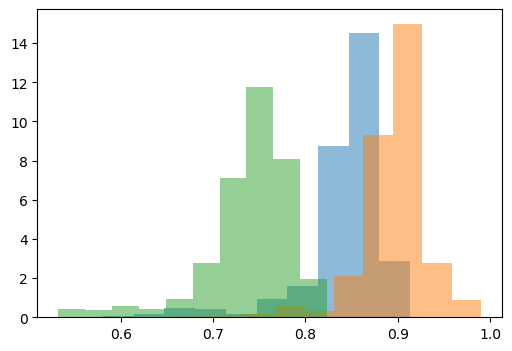

In [550]:
best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.29791352438411256
195
0.31800803842760517
202
0.3247275844902925
202


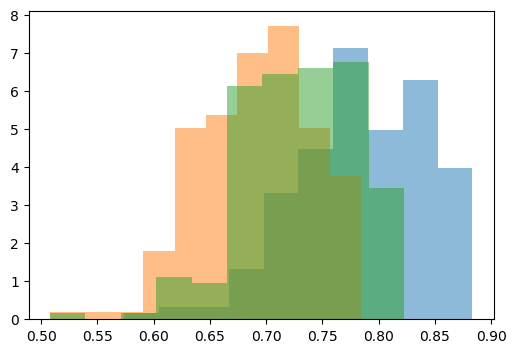

In [552]:
best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=5, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.2954429083461344
231
0.2865800865800866
231
0.2793481028775146
231


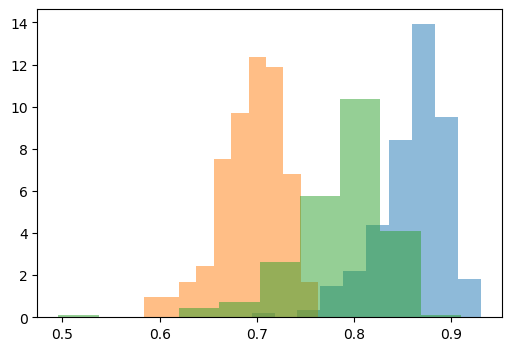

In [553]:
best_friends_cells(trapnell_PSI, trapnell_PSI.columns, trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, trapnell_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.26209041121321824
513
(252, 513)
0.30406901131741293
509
(284, 509)
0.2593026739082301
513
(449, 513)


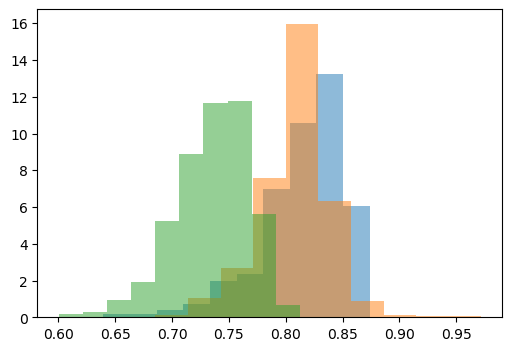

In [556]:
best_friends_cells(lescroart_PSI, lescroart_PSI.columns, lescroart_mrna_counts, mrna_per_event_lescroart, lescroart_read_counts, lescroart_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=5, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

0.3005656819610307
74
(645, 74)
0.3009762750798608
74
(753, 74)
0.29885211916461907
74
(704, 74)


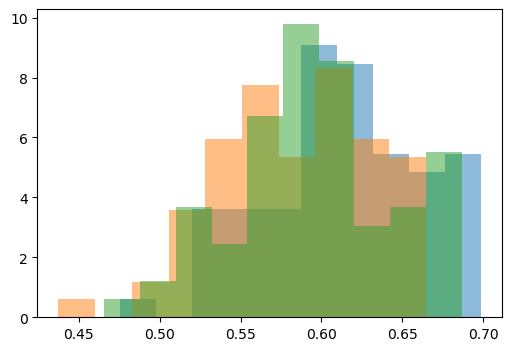

0.30169704588309243
74
(473, 74)
0.3108366987677334
74
(522, 74)
0.29729729729729737
74
(615, 74)


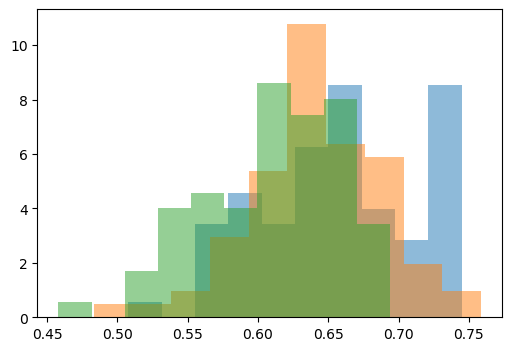

0.30313990461049284
74
(340, 74)
0.3126126126126126
74
(375, 74)
0.29586645468998407
74
(510, 74)


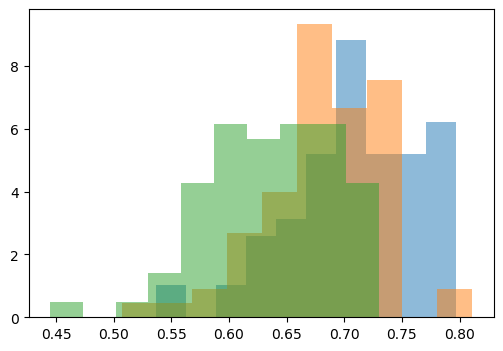

0.30598088582879446
74
(263, 74)
0.31682742813484877
74
(283, 74)
0.2997398807257963
74
(426, 74)


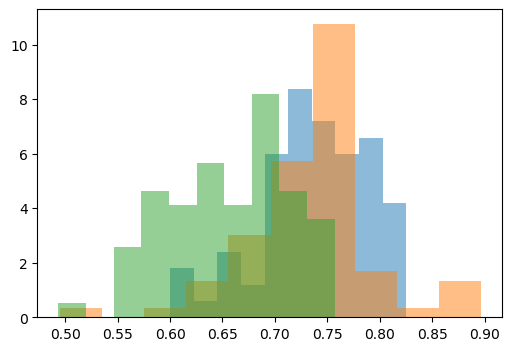

0.3007933306440769
74
(201, 74)
0.3226130060191196
74
(229, 74)
0.2976070626500428
74
(349, 74)


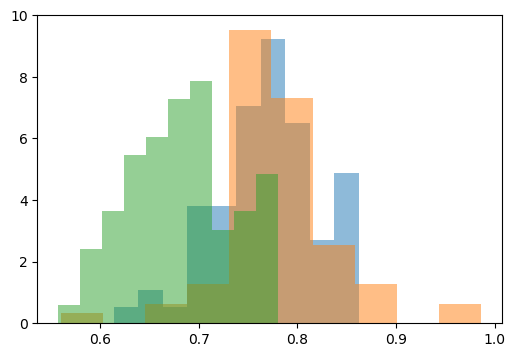

0.3051520270270269
74
(160, 74)
0.3203673286546216
74
(181, 74)
0.29317211948790906
74
(285, 74)


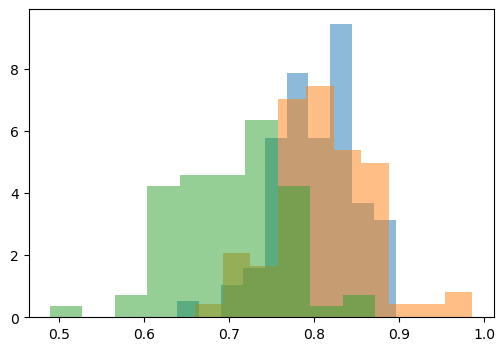

0.29675675675675683
74
(125, 74)
0.30835197613721094
72
(149, 72)
0.2986595466434176
74
(248, 74)


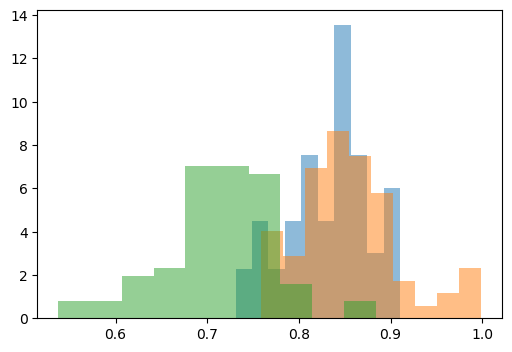

0.2975546975546974
74
(105, 74)
0.2958900946663588
71
(122, 71)
0.29625779625779625
74
(208, 74)


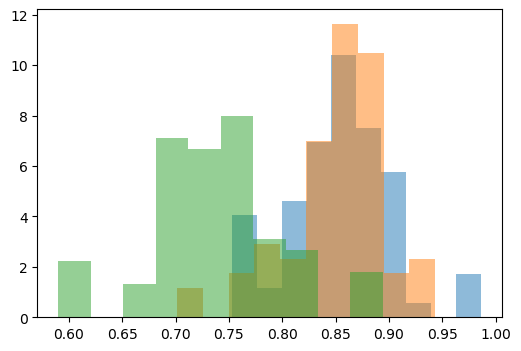

0.2969936228363194
74
(89, 74)
0.2859903381642511
69
(105, 69)
0.28203497615262313
74
(170, 74)


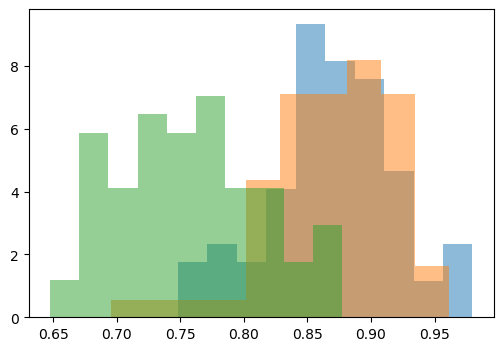

0.2942745376955902
74
(76, 74)
0.2824586743700851
67
(93, 67)
0.2921328972284387
74
(157, 74)


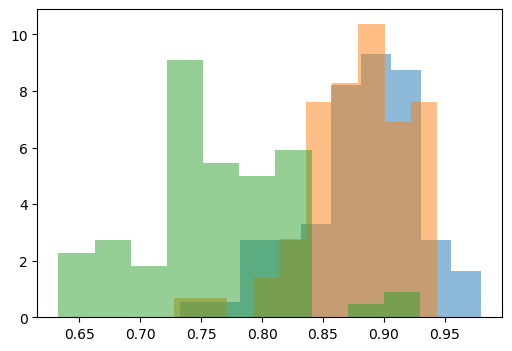

0.310049486105824
74
(71, 74)
0.2329059829059829
52
(81, 52)
0.2926948687818254
74
(138, 74)


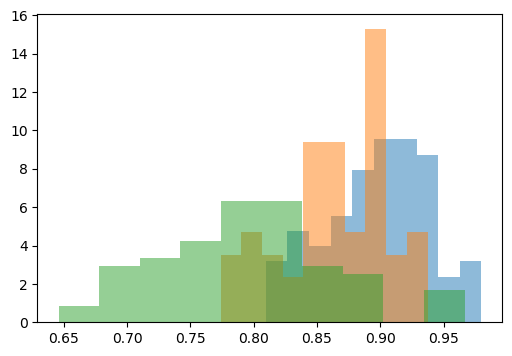

0.30698198198198207
74
(60, 74)
nan
0
(74, 0)
0.2875809693991512
74
(121, 74)


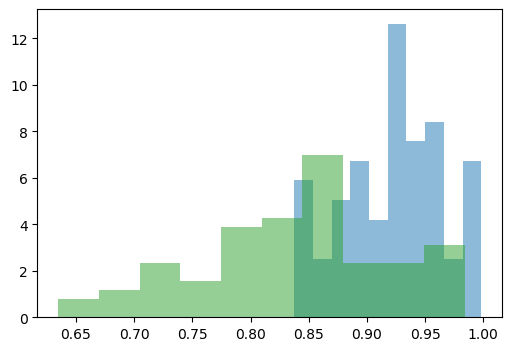

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.30301455301455305
74
(52, 74)
nan
0
(66, 0)
0.2915943466402181
74
(109, 74)


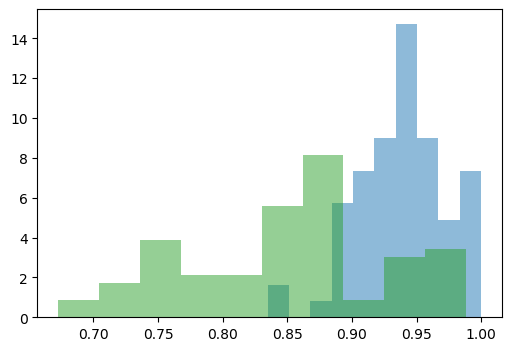

0.31784909909909914
74
(48, 74)
nan
0
(62, 0)
0.2993243243243244
74
(100, 74)


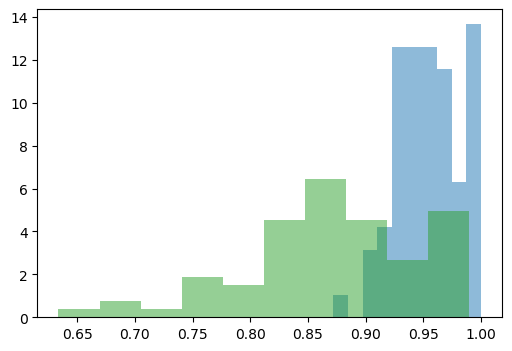

In [594]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])

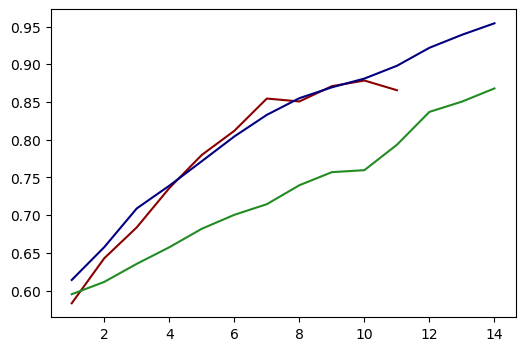

In [597]:
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

0.24674537174537176
111
(728, 111)
0.2502963489805595
111
(760, 111)
0.2493659879718861
111
(746, 111)


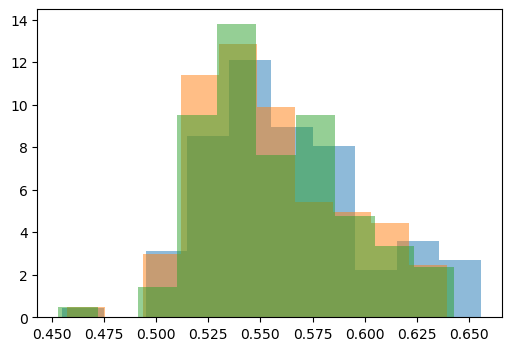

0.23457447595378628
111
(609, 111)
0.24848053795422226
111
(418, 111)
0.2410857882555995
111
(689, 111)


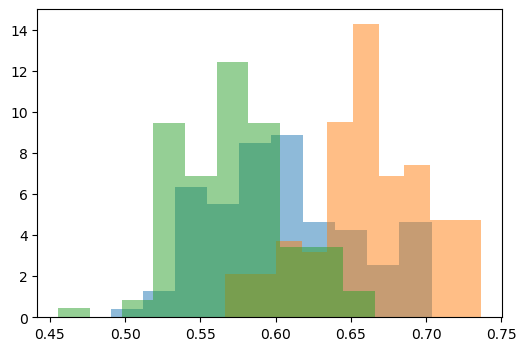

0.22832325996882952
111
(474, 111)
0.26442067067067065
111
(288, 111)
0.23671064429358277
111
(633, 111)


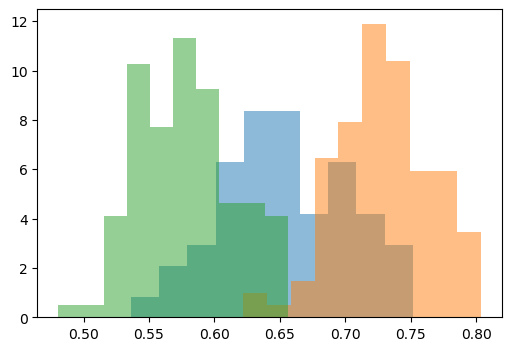

0.2290350051544081
111
(402, 111)
0.2686164425294859
111
(207, 111)
0.23026013711426718
111
(569, 111)


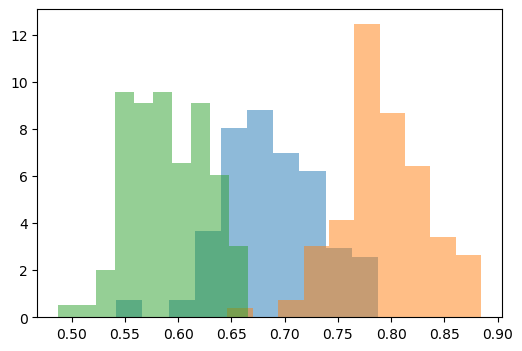

0.2392074155079937
111
(346, 111)
0.25727069351230425
111
(149, 111)
0.22184239575543924
111
(506, 111)


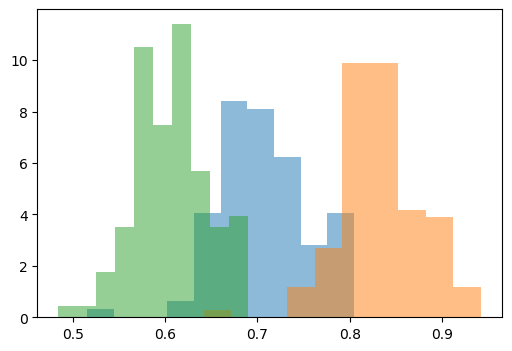

0.24145378254967298
111
(292, 111)
0.25377920293174555
111
(118, 111)
0.22545573291841942
111
(469, 111)


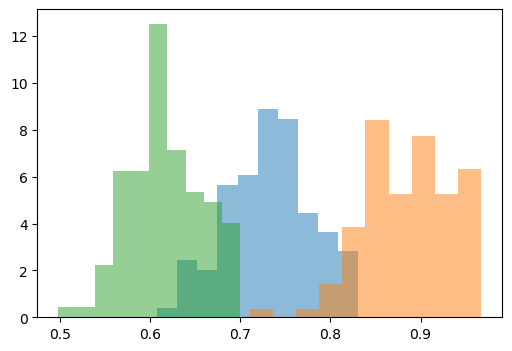

0.24363649363649362
111
(252, 111)
0.23553838725253493
109
(95, 109)
0.22388977212506622
111
(425, 111)


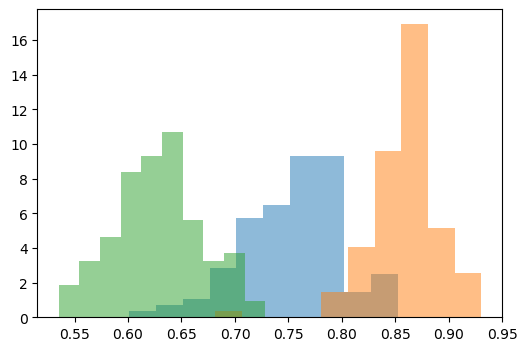

0.23079211286758466
111
(212, 111)
0.24382716049382722
108
(84, 108)
0.21948580434220114
111
(383, 111)


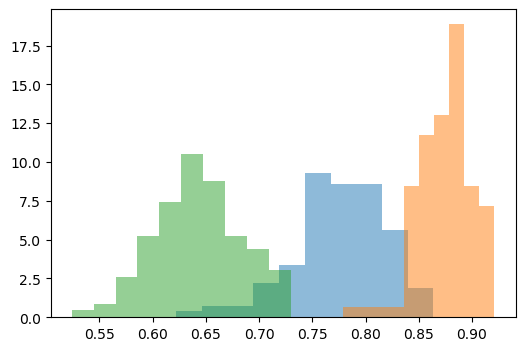

0.22662234426940311
111
(187, 111)
0.2553272450532724
108
(73, 108)
0.21057900005268426
111
(342, 111)


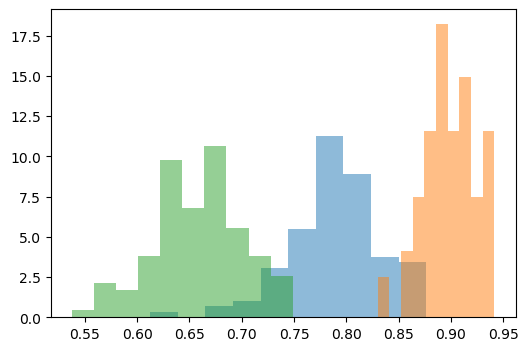

0.2313384813384814
111
(168, 111)
0.2524707996406107
106
(63, 106)
0.21660791226008608
111
(322, 111)


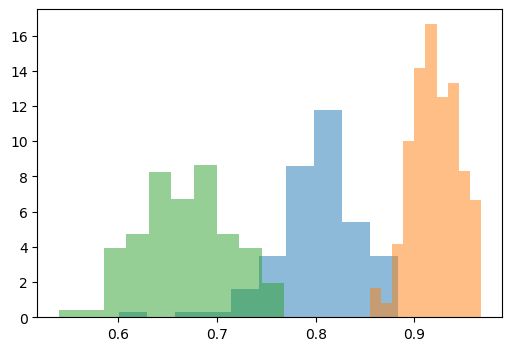

0.21954831543872633
111
(146, 111)
0.21250971250971248
99
(52, 99)
0.2149683467251036
111
(296, 111)


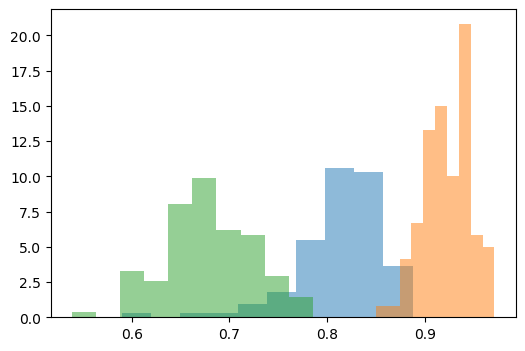

0.21328146328146327
111
(132, 111)
nan
0
(47, 0)
0.21147814481147822
111
(270, 111)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


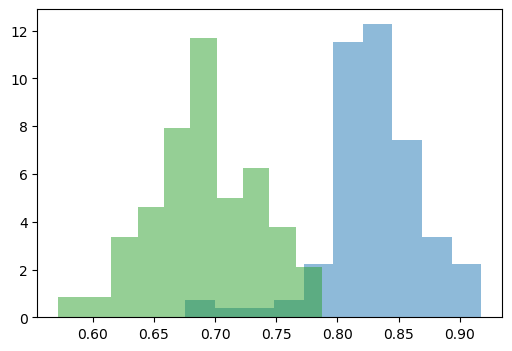

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.2076652924110552
111
(118, 111)
nan
0
(41, 0)
0.20074582779500819
111
(244, 111)


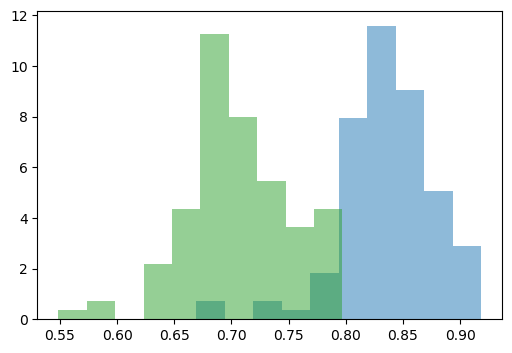

0.21158996834672514
111
(111, 111)
nan
0
(39, 0)
0.20827607268285236
111
(236, 111)


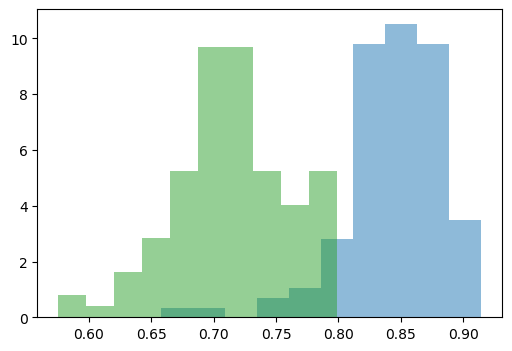

In [598]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

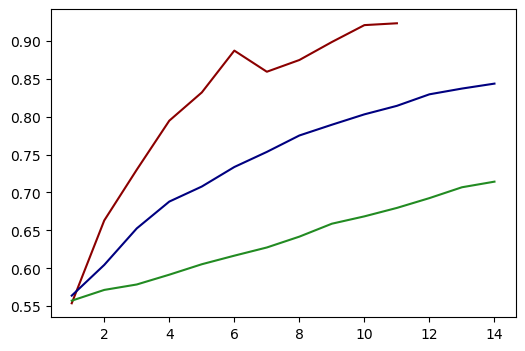

0.33372781065088764
70
(169, 70)
0.34472591362126237
70
(344, 70)
0.34368358913813474
70
(242, 70)


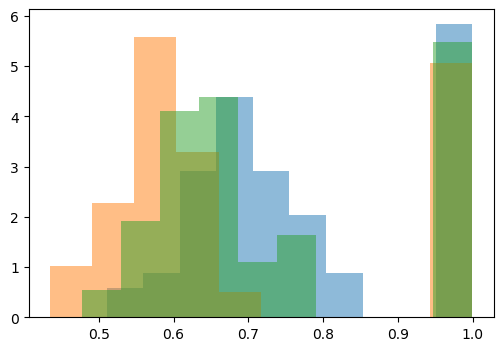

0.3351145038167939
70
(131, 70)
0.34525407478427617
70
(298, 70)
0.3374079528718704
70
(194, 70)


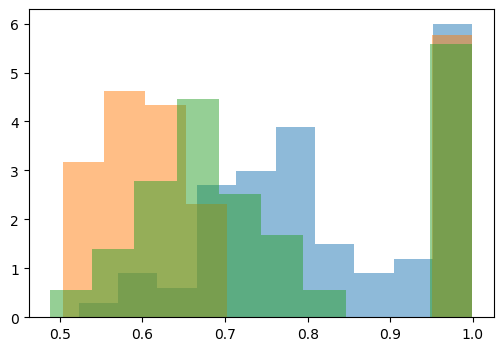

0.33577981651376154
70
(109, 70)
0.3428036383092562
70
(267, 70)
0.33468158347676424
70
(166, 70)


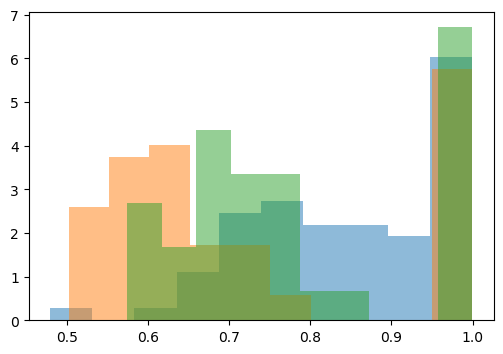

0.3390577507598785
70
(94, 70)
0.3405048766494549
70
(249, 70)
0.33586005830903803
70
(147, 70)


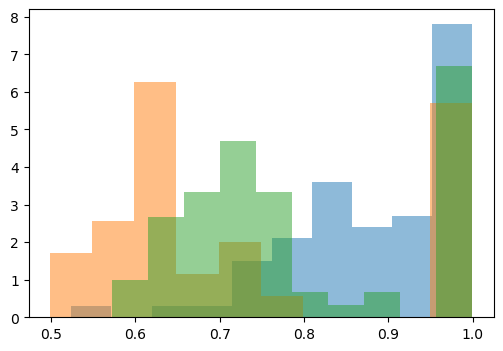

0.34387755102040807
70
(84, 70)
0.3368742368742368
70
(234, 70)
0.3386680988184746
70
(133, 70)


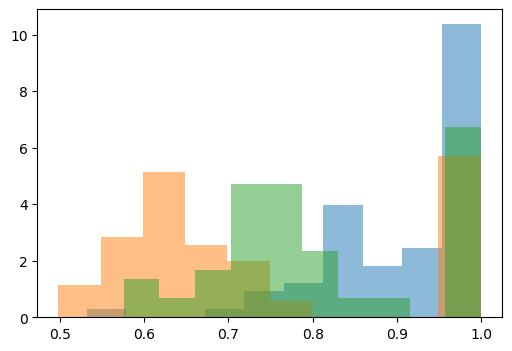

0.3562271062271063
70
(78, 70)
0.33679846938775515
70
(224, 70)
0.3363858363858361
70
(117, 70)


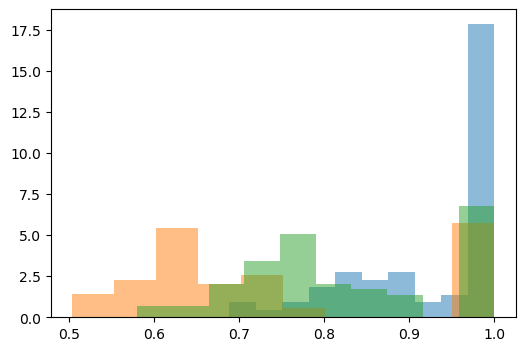

0.35527950310558987
70
(69, 70)
0.33511348464619484
70
(214, 70)
0.3200577200577201
70
(99, 70)


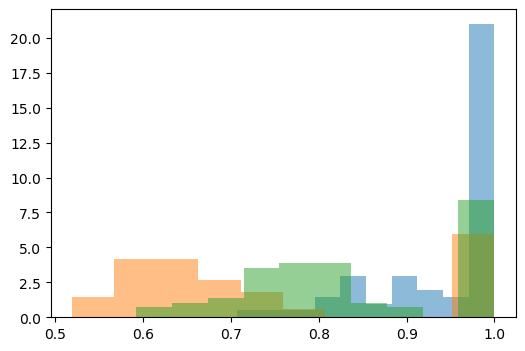

0.3065913370998116
45
(59, 45)
0.3333797909407665
70
(205, 70)
0.32624223602484476
70
(92, 70)


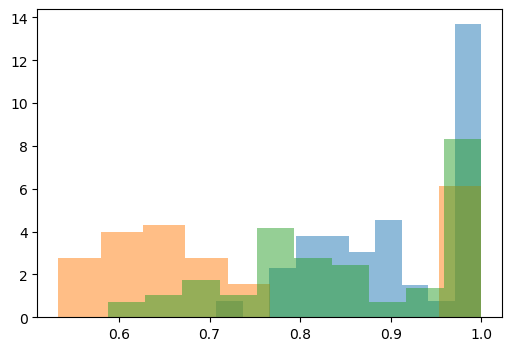

0.19331983805668015
19
(52, 19)
0.33435714285714285
70
(200, 70)
0.3337815126050418
70
(85, 70)


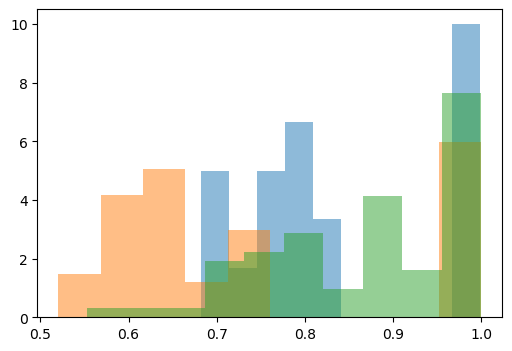

0.20345744680851063
16
(47, 16)
0.3386934673366835
70
(199, 70)
0.34494773519163763
70
(82, 70)


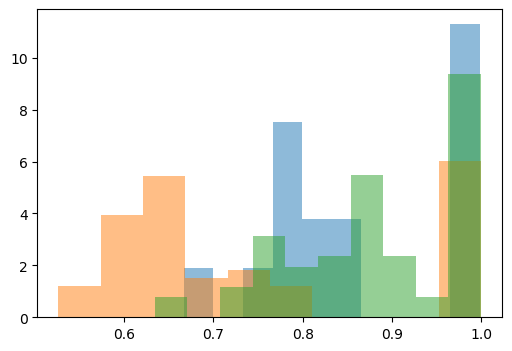

nan
0
(45, 0)
0.3371576609918583
70
(193, 70)
0.3517625231910945
70
(77, 70)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


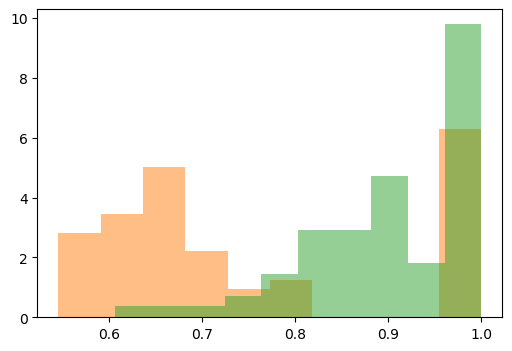

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
0
(38, 0)
0.33847316704459557
70
(189, 70)
0.35907335907335913
70
(74, 70)


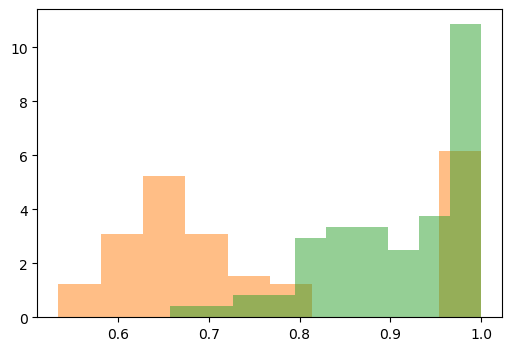

nan
0
(35, 0)
0.3383540372670807
70
(184, 70)
0.3686507936507937
70
(72, 70)


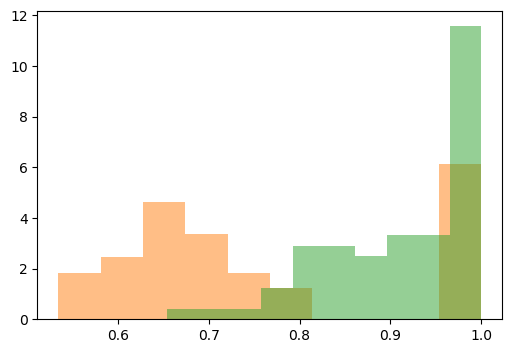

nan
0
(33, 0)
0.3412177985948478
70
(183, 70)
0.37230769230769195
70
(65, 70)


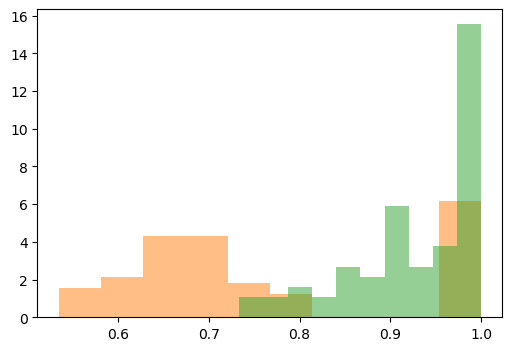

In [602]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])

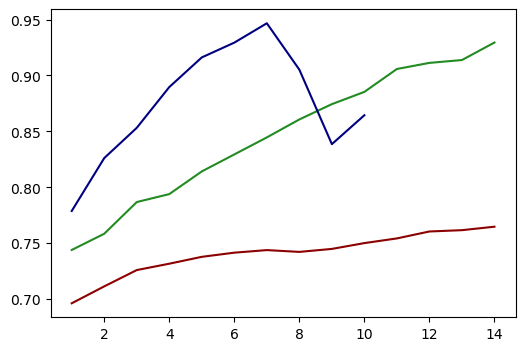

In [603]:
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

0.2619055842082643
488
(1068, 488)
0.26889567302330725
488
(1176, 488)
0.2672501415731316
488
(1129, 488)


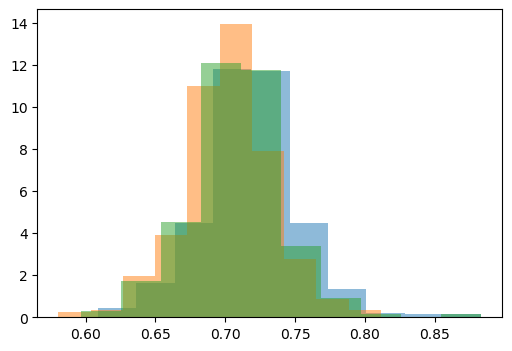

0.26079723999545673
488
(866, 488)
0.2695692410272919
488
(713, 488)
0.2607259261649671
488
(1016, 488)


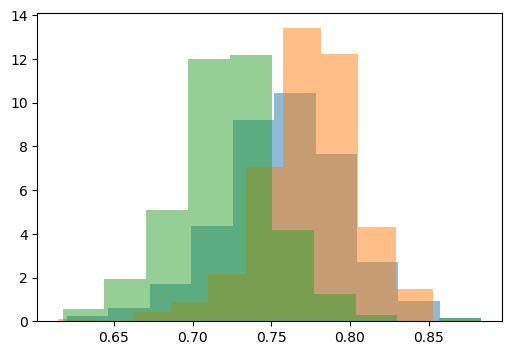

0.26033643979816046
488
(679, 488)
0.2820584656762295
488
(512, 488)
0.257524298400773
488
(899, 488)


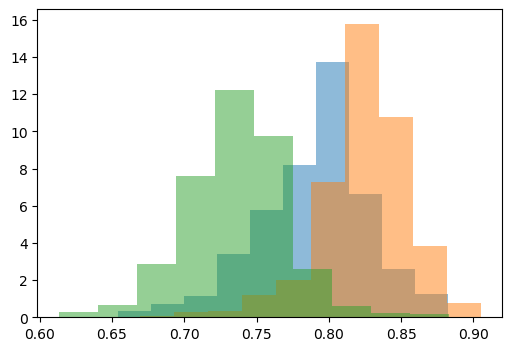

0.26496776734146216
488
(562, 488)
0.28012625594923296
488
(372, 488)
0.25397613797120744
488
(788, 488)


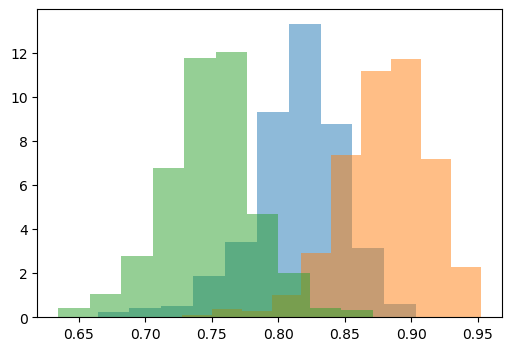

0.26592771982116237
488
(462, 488)
0.2804673269581055
488
(288, 488)
0.2537989102353329
488
(698, 488)


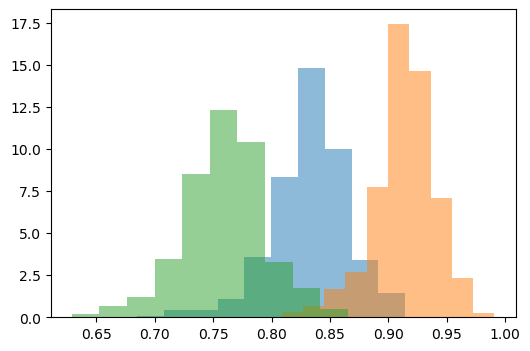

0.2601969822150714
488
(377, 488)
0.27739100866203736
488
(229, 488)
0.2546509486093202
488
(623, 488)


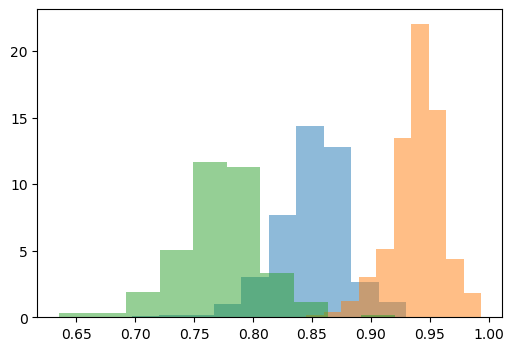

0.26007566204287536
488
(325, 488)
0.28295588980902486
488
(194, 488)
0.2536516024220943
488
(555, 488)


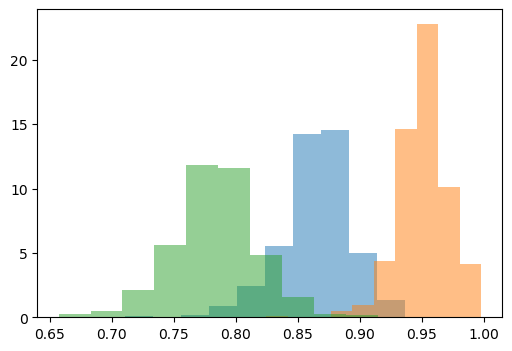

0.26066292781133144
488
(285, 488)
0.2829251734888866
488
(163, 488)
0.2550739664293646
488
(502, 488)


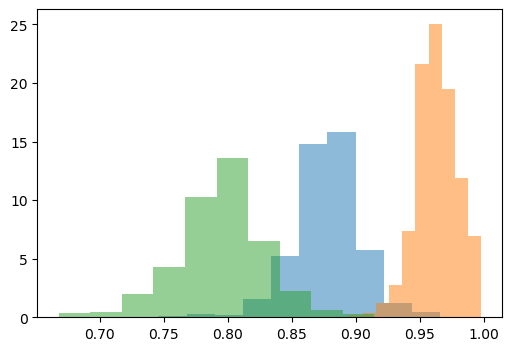

0.26486865883567845
488
(254, 488)
0.27935673556664303
488
(138, 488)
0.2557322885823643
488
(454, 488)


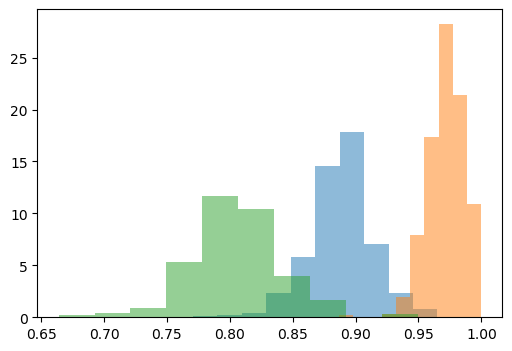

0.26153817752178427
488
(222, 488)
0.28332437516796555
488
(122, 488)
0.2556800095495781
488
(412, 488)


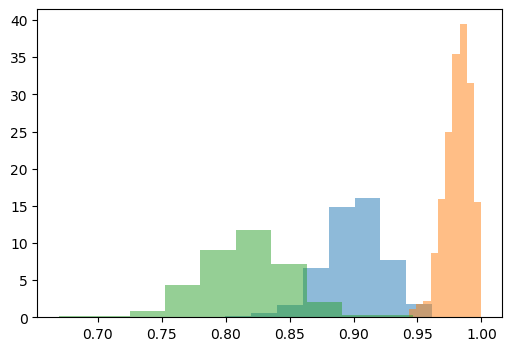

0.2584451068057626
488
(198, 488)
0.2802162244470668
482
(109, 482)
0.24967056774020605
488
(367, 488)


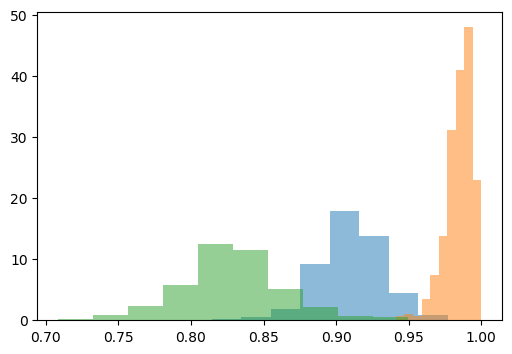

0.25976775956284137
488
(180, 488)
0.24995390855457225
452
(96, 452)
0.2498302454166264
488
(338, 488)


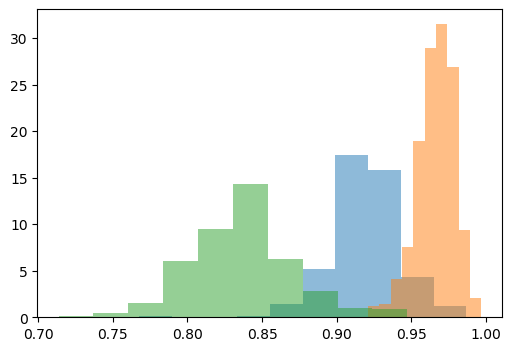

0.25572752265553417
488
(161, 488)
0.25091724419078654
446
(88, 446)
0.24688312377314453
488
(309, 488)


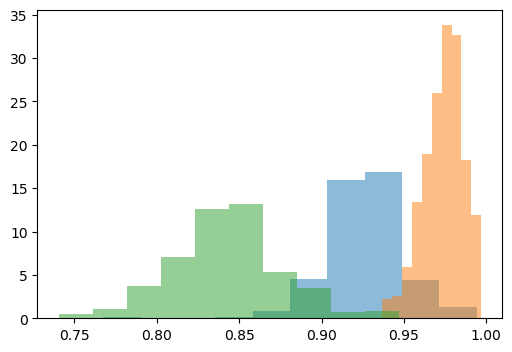

0.2527369189310577
488
(146, 488)
nan
0
(80, 0)
0.2542575875055384
488
(296, 488)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


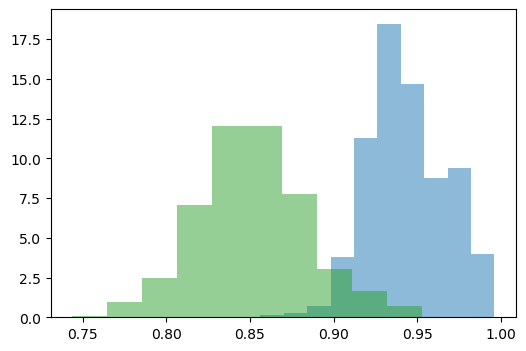

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


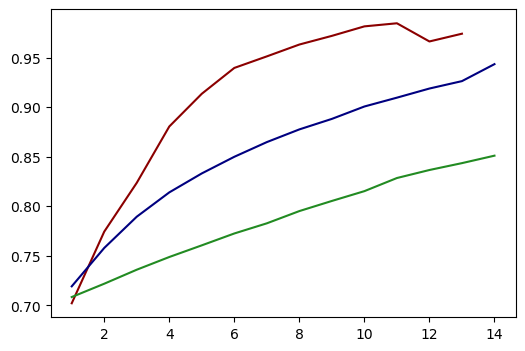

In [605]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

0.3170280493602597
202
(479, 202)
0.3149561652200462
202
(908, 202)
0.3201395482013954
202
(657, 202)


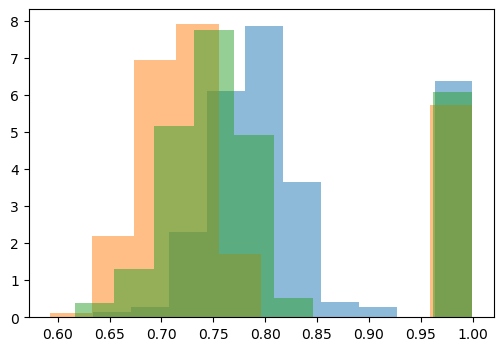

0.315163131912077
202
(359, 202)
0.3175354300135898
202
(816, 202)
0.31430477013545777
202
(527, 202)


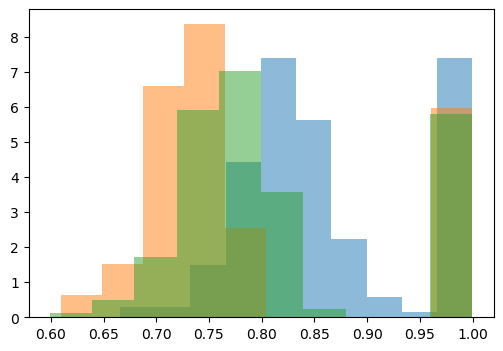

0.31438195365928323
202
(291, 202)
0.3204070407040704
202
(774, 202)
0.3153846153846152
202
(455, 202)


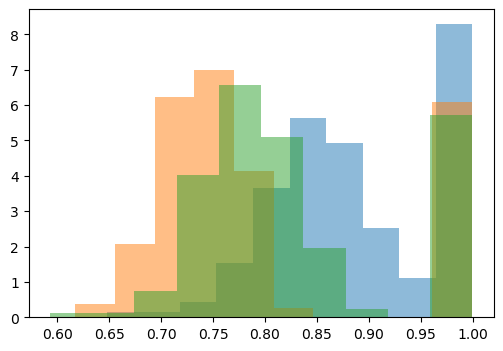

0.3139184288799251
202
(243, 202)
0.3219820636168597
202
(743, 202)
0.31754067366535654
202
(398, 202)


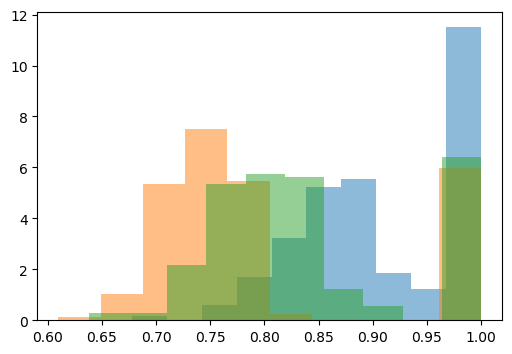

0.29791352438411256
195
(204, 195)
0.32135048947932787
202
(711, 202)
0.3247275844902925
202
(358, 202)


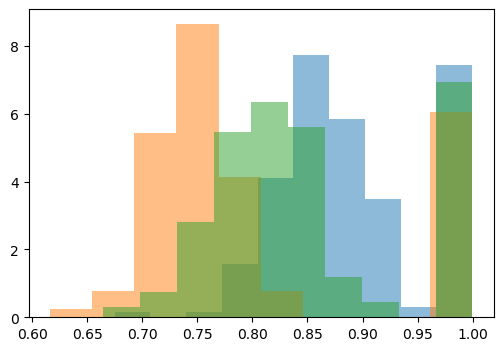

0.30368502171780853
195
(183, 195)
0.3187357197258186
202
(676, 202)
0.31694796996478186
202
(298, 202)


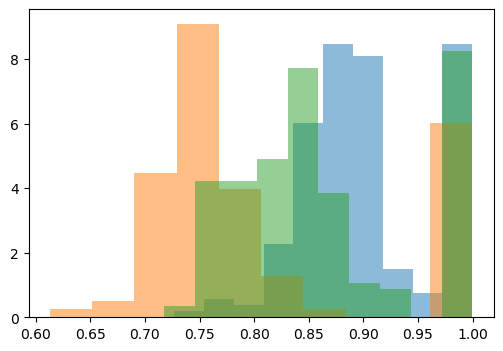

0.29282251548612986
188
(158, 188)
0.31822991459451294
202
(655, 202)
0.31681278814904384
202
(262, 202)


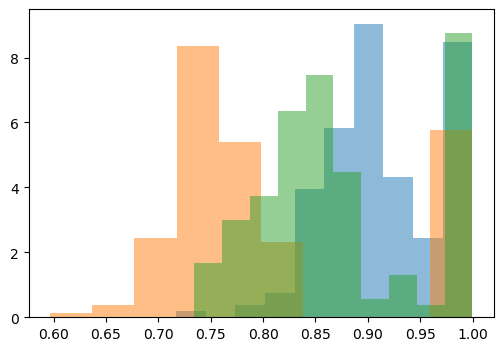

nan
0
(138, 0)
0.3173087450925188
202
(633, 202)
0.3063509053608064
202
(222, 202)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


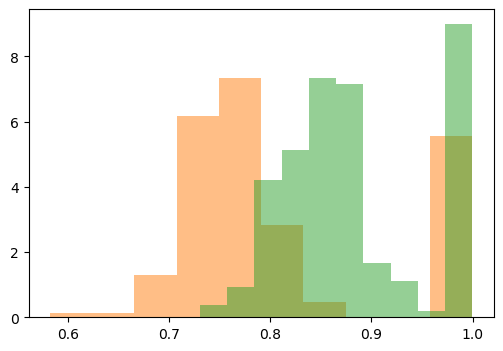

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
0
(120, 0)
0.3164775014086776
202
(615, 202)
0.3079549334243769
202
(203, 202)


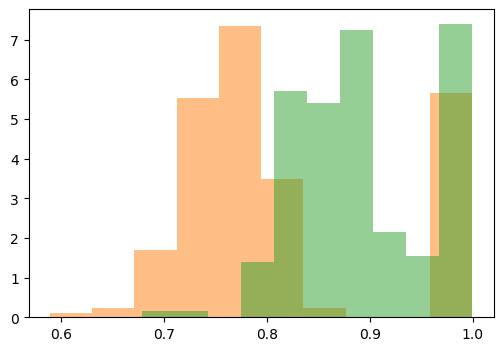

nan
0
(106, 0)
0.31800803842760517
202
(606, 202)
0.2997552564245189
202
(178, 202)


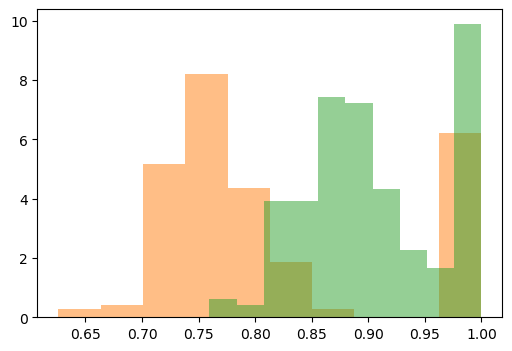

nan
0
(94, 0)
0.31822348901556824
202
(594, 202)
0.29399752475247515
202
(160, 202)


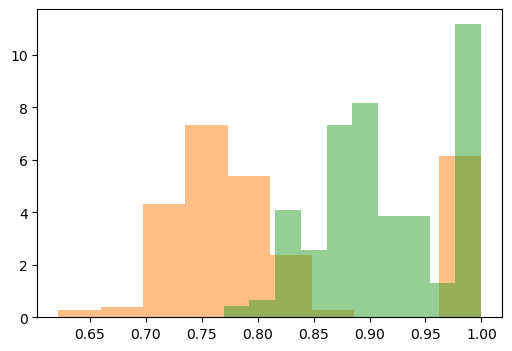

nan
0
(86, 0)
0.31631600660065995
202
(576, 202)
0.29598059143662725
202
(151, 202)


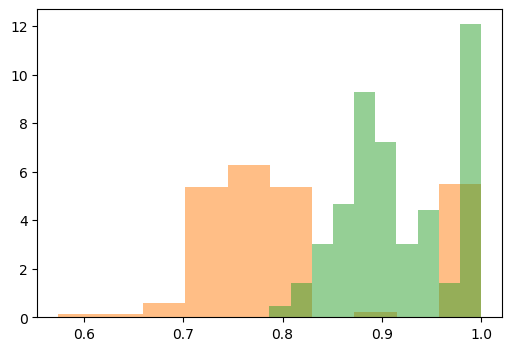

nan
0
(75, 0)
0.31569535957154443
202
(562, 202)
0.29835448333565734
202
(142, 202)


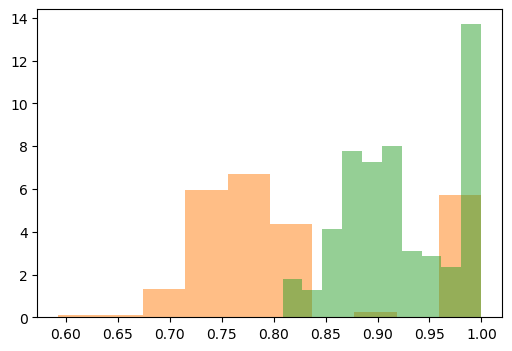

nan
0
(70, 0)
0.31643850305608195
202
(554, 202)
0.2918843065408902
202
(127, 202)


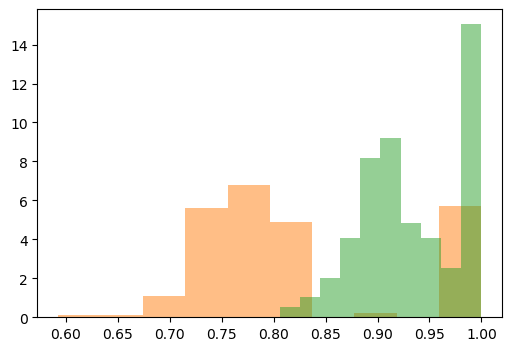

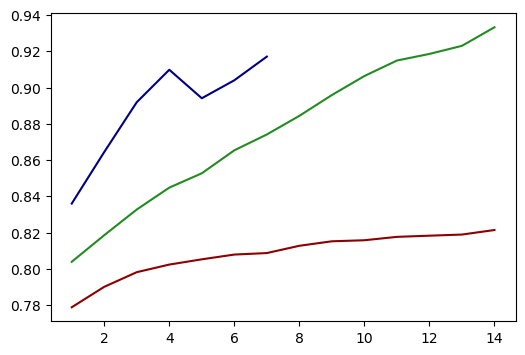

In [606]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

0.2619055842082643
488
(1068, 488)
0.26889567302330725
488
(1176, 488)
0.2672501415731316
488
(1129, 488)


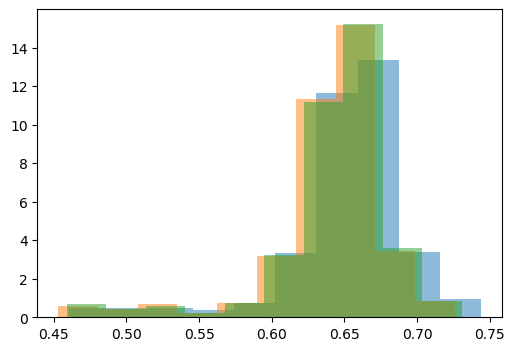

0.26079723999545673
488
(866, 488)
0.2695692410272919
488
(713, 488)
0.2607259261649671
488
(1016, 488)


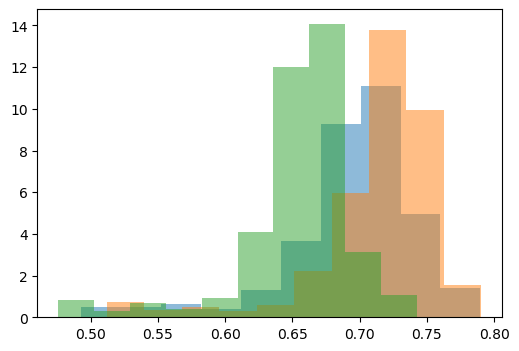

0.26033643979816046
488
(679, 488)
0.2820584656762295
488
(512, 488)
0.257524298400773
488
(899, 488)


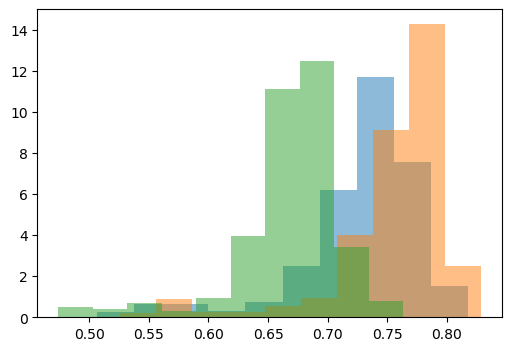

0.26496776734146216
488
(562, 488)
0.28012625594923296
488
(372, 488)
0.25397613797120744
488
(788, 488)


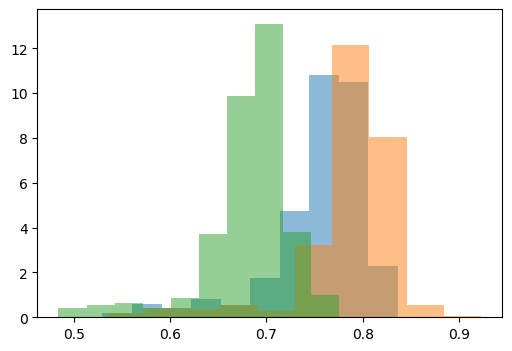

0.26592771982116237
488
(462, 488)
0.2804673269581055
488
(288, 488)
0.2537989102353329
488
(698, 488)


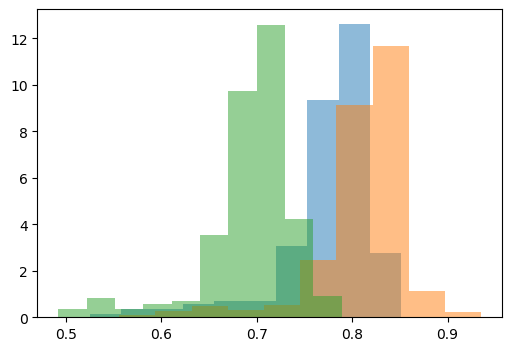

0.2601969822150714
488
(377, 488)
0.27739100866203736
488
(229, 488)
0.2546509486093202
488
(623, 488)


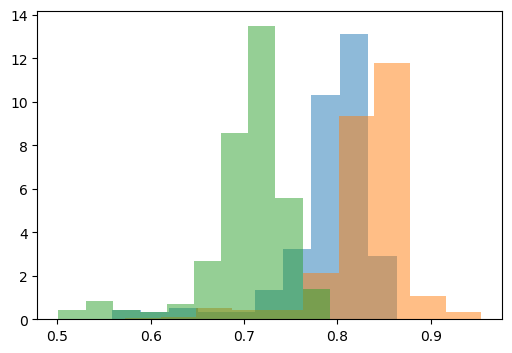

0.26007566204287536
488
(325, 488)
0.28295588980902486
488
(194, 488)
0.2536516024220943
488
(555, 488)


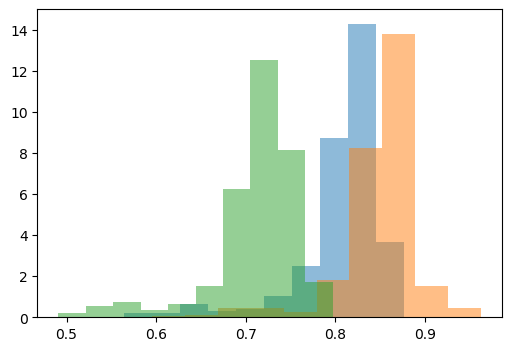

0.26066292781133144
488
(285, 488)
0.2829251734888866
488
(163, 488)
0.2550739664293646
488
(502, 488)


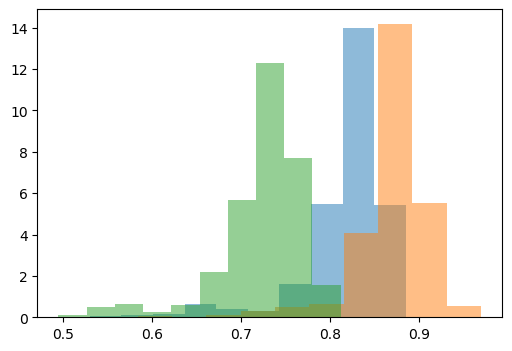

0.26486865883567845
488
(254, 488)
0.27935673556664303
488
(138, 488)
0.2557322885823643
488
(454, 488)


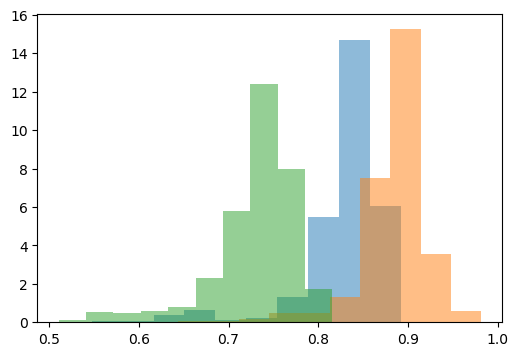

0.26153817752178427
488
(222, 488)
0.28332437516796555
488
(122, 488)
0.2556800095495781
488
(412, 488)


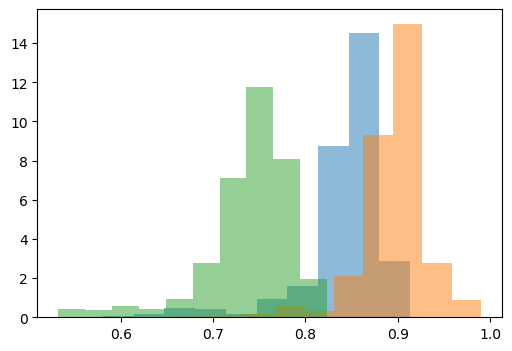

0.2584451068057626
488
(198, 488)
0.2802162244470668
482
(109, 482)
0.24967056774020605
488
(367, 488)


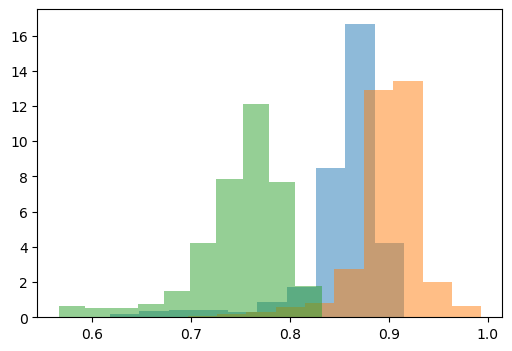

0.25976775956284137
488
(180, 488)
0.24995390855457225
452
(96, 452)
0.2498302454166264
488
(338, 488)


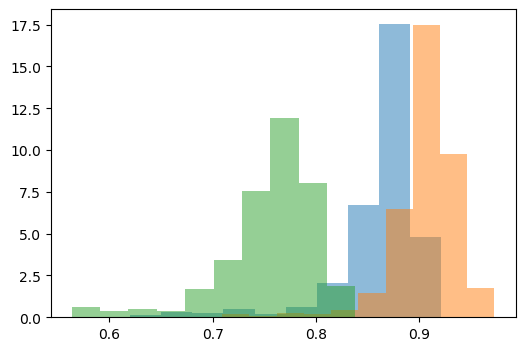

0.25572752265553417
488
(161, 488)
0.25091724419078654
446
(88, 446)
0.24688312377314453
488
(309, 488)


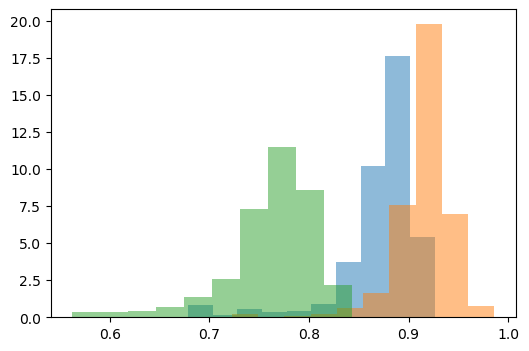

0.2527369189310577
488
(146, 488)
nan
0
(80, 0)
0.2542575875055384
488
(296, 488)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


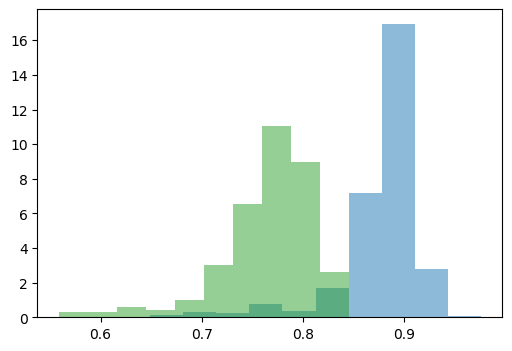

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


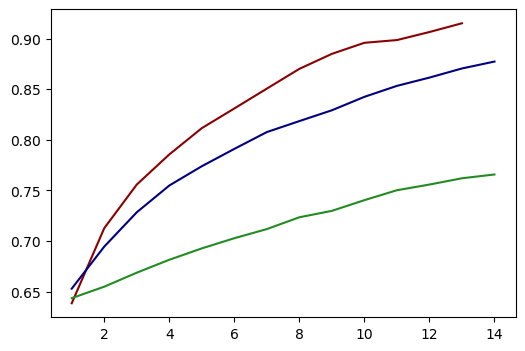

In [608]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

0.3170280493602597
202
(479, 202)
0.3149561652200462
202
(908, 202)
0.3201395482013954
202
(657, 202)


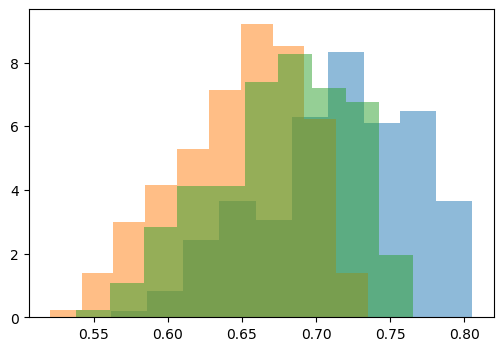

0.315163131912077
202
(359, 202)
0.3175354300135898
202
(816, 202)
0.31430477013545777
202
(527, 202)


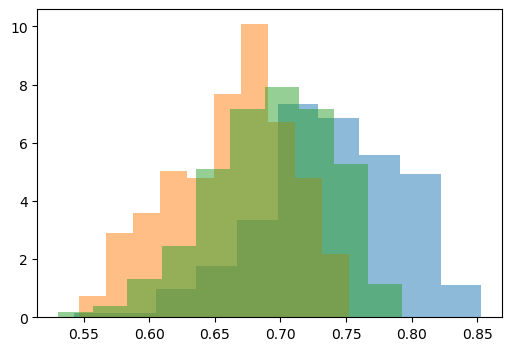

0.31438195365928323
202
(291, 202)
0.3204070407040704
202
(774, 202)
0.3153846153846152
202
(455, 202)


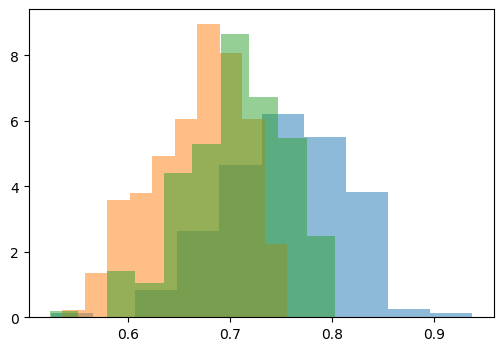

0.3139184288799251
202
(243, 202)
0.3219820636168597
202
(743, 202)
0.31754067366535654
202
(398, 202)


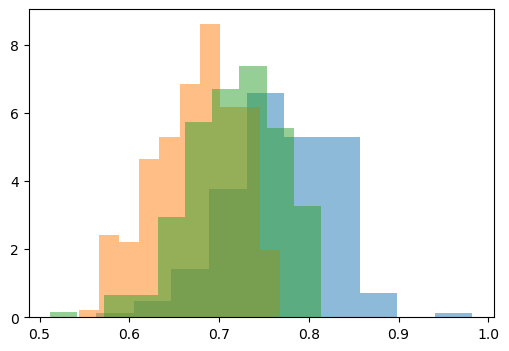

0.29791352438411256
195
(204, 195)
0.32135048947932787
202
(711, 202)
0.3247275844902925
202
(358, 202)


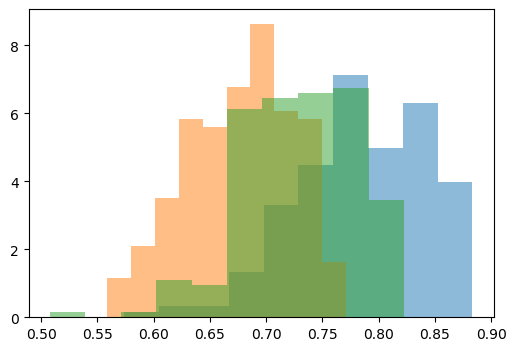

0.30368502171780853
195
(183, 195)
0.3187357197258186
202
(676, 202)
0.31694796996478186
202
(298, 202)


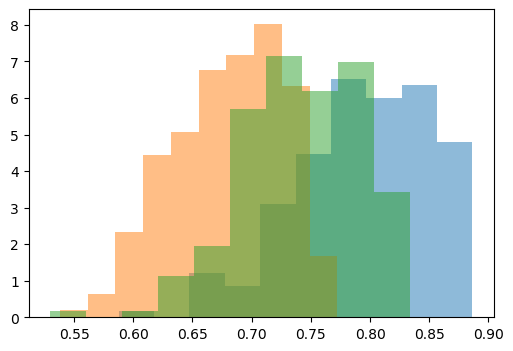

0.29282251548612986
188
(158, 188)
0.31822991459451294
202
(655, 202)
0.31681278814904384
202
(262, 202)


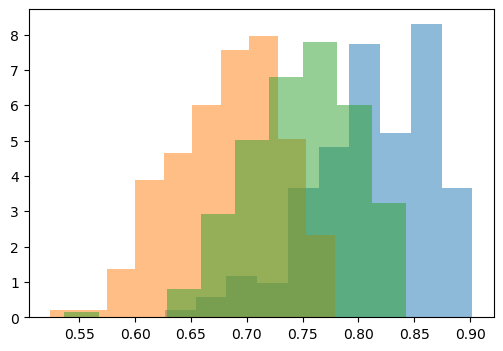

nan
0
(138, 0)
0.3173087450925188
202
(633, 202)
0.3063509053608064
202
(222, 202)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


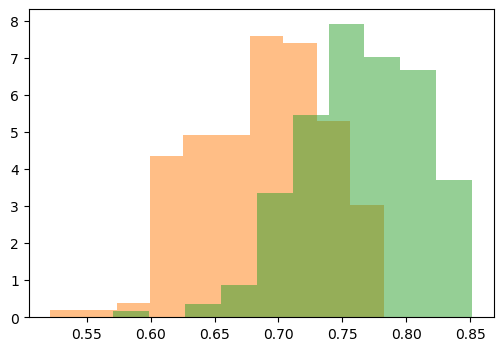

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
0
(120, 0)
0.3164775014086776
202
(615, 202)
0.3079549334243769
202
(203, 202)


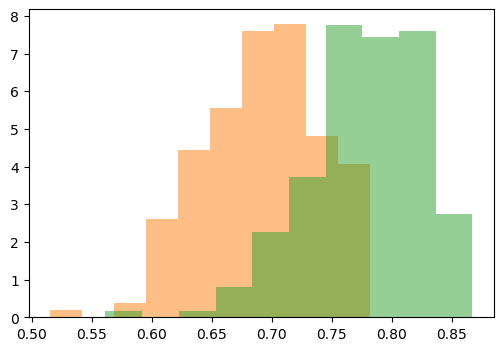

nan
0
(106, 0)
0.31800803842760517
202
(606, 202)
0.2997552564245189
202
(178, 202)


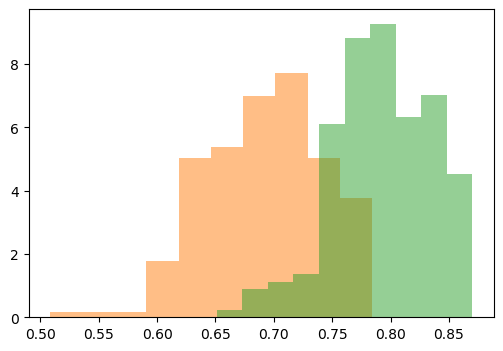

nan
0
(94, 0)
0.31822348901556824
202
(594, 202)
0.29399752475247515
202
(160, 202)


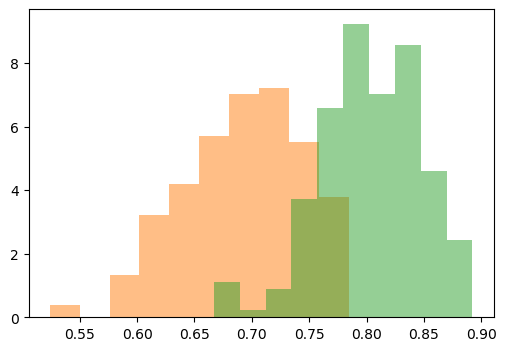

nan
0
(86, 0)
0.31631600660065995
202
(576, 202)
0.29598059143662725
202
(151, 202)


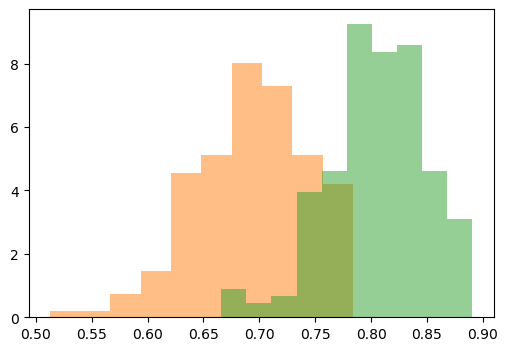

nan
0
(75, 0)
0.31569535957154443
202
(562, 202)
0.29835448333565734
202
(142, 202)


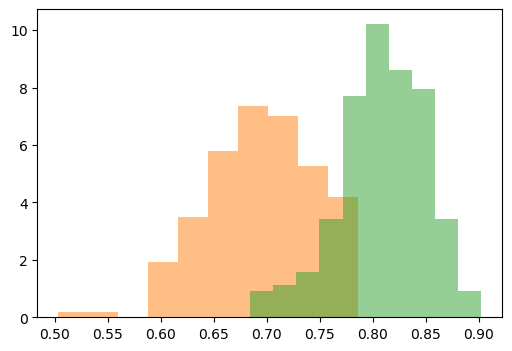

nan
0
(70, 0)
0.31643850305608195
202
(554, 202)
0.2918843065408902
202
(127, 202)


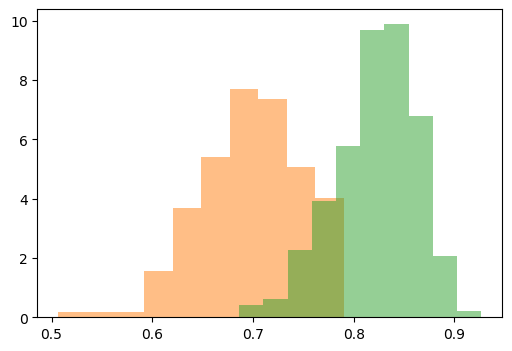

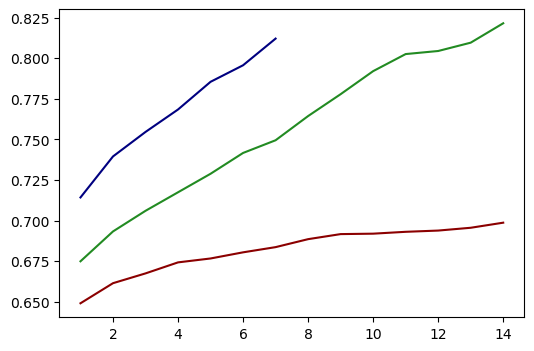

In [609]:
both_song = []
read_song = []
mrna_song = []
for limite in range(1, 15):
    output = best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both_song.append(output[0])
    read_song.append(output[1])
    mrna_song.append(output[2])
    
    
plt.plot(range(1, 15), read_song, color = 'darkred')
plt.plot(range(1, 15), mrna_song, color = 'forestgreen')
plt.plot(range(1, 15), both_song, color = 'navy')
plt.show()

0.26497600441688596
772
0.27133087593365046
845
0.2700212507589559
810


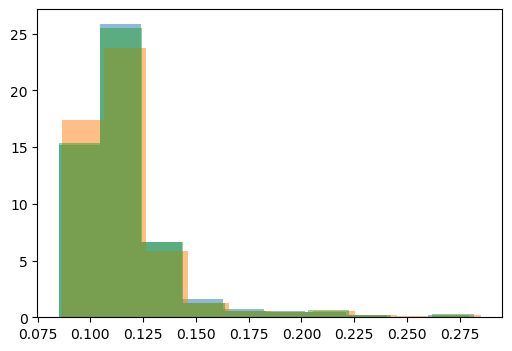

TypeError: 'NoneType' object is not subscriptable

In [610]:
both_e = []
read_e = []
mrna_e = []
for limite in range(1, 15):
    output = best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both_e.append(output[0])
    read_e.append(output[1])
    mrna_e.append(output[2])
    
    
plt.plot(range(1, 15), read_e, color = 'darkred')
plt.plot(range(1, 15), mrna_e, color = 'forestgreen')
plt.plot(range(1, 15), both_e, color = 'navy')
plt.show()

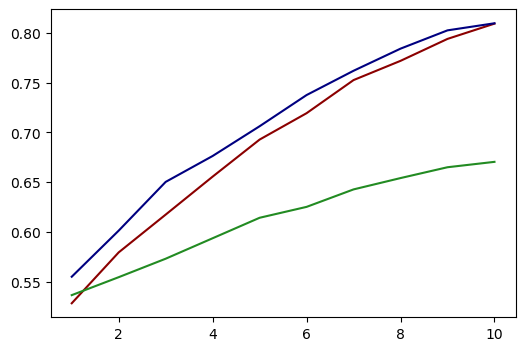

In [614]:
# both = []
# read = []
# mrna = []
# for limite in range(1, 11):
#     output = best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
#                  method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
#                  quant=0.9, top_friends=5)
#     both.append(output[0])
#     read.append(output[1])
#     mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

0.24674537174537176
111
(728, 111)
0.2502963489805595
111
(760, 111)
0.2493659879718861
111
(746, 111)


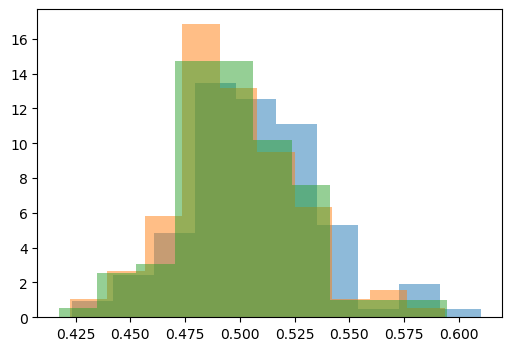

0.23457447595378628
111
(609, 111)
0.24848053795422226
111
(418, 111)
0.2410857882555995
111
(689, 111)


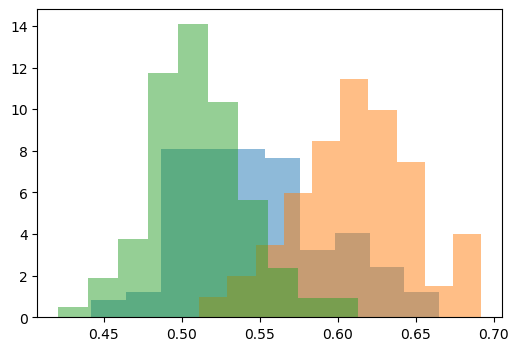

0.22832325996882952
111
(474, 111)
0.26442067067067065
111
(288, 111)
0.23671064429358277
111
(633, 111)


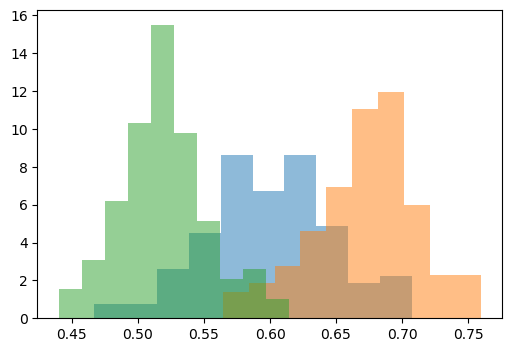

0.2290350051544081
111
(402, 111)
0.2686164425294859
111
(207, 111)
0.23026013711426718
111
(569, 111)


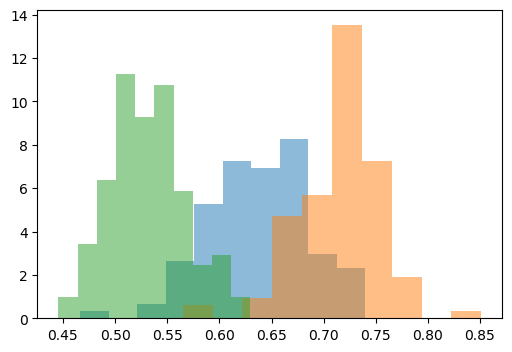

0.2392074155079937
111
(346, 111)
0.25727069351230425
111
(149, 111)
0.22184239575543924
111
(506, 111)


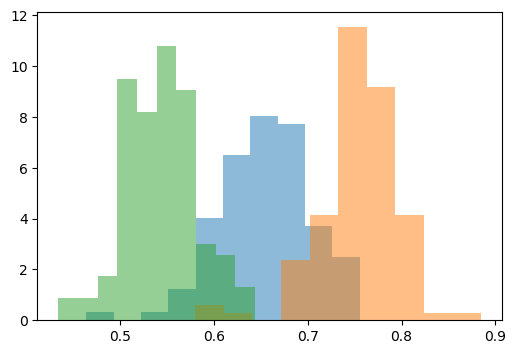

0.24145378254967298
111
(292, 111)
0.25377920293174555
111
(118, 111)
0.22545573291841942
111
(469, 111)


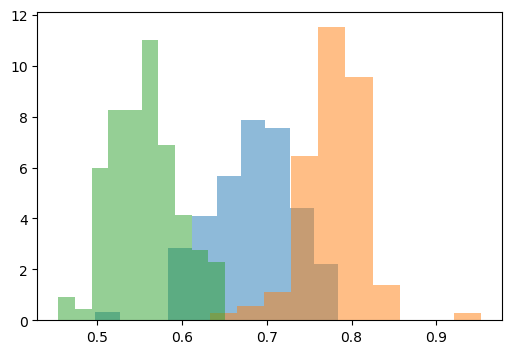

0.24363649363649362
111
(252, 111)
0.23553838725253493
109
(95, 109)
0.22388977212506622
111
(425, 111)


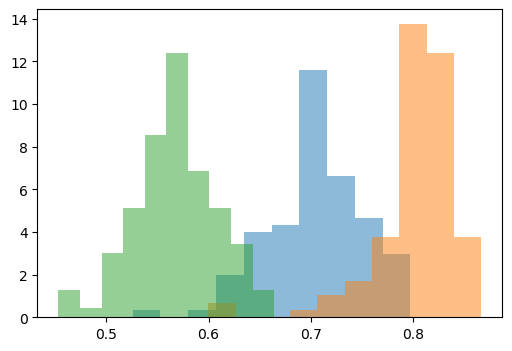

0.23079211286758466
111
(212, 111)
0.24382716049382722
108
(84, 108)
0.21948580434220114
111
(383, 111)


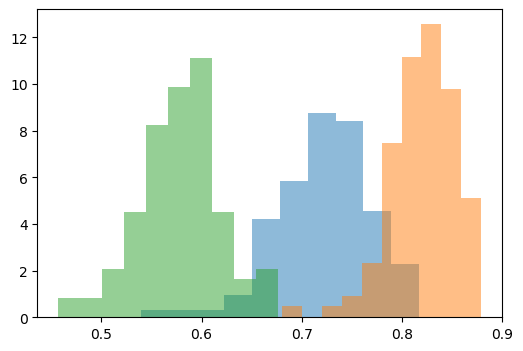

0.22662234426940311
111
(187, 111)
0.2553272450532724
108
(73, 108)
0.21057900005268426
111
(342, 111)


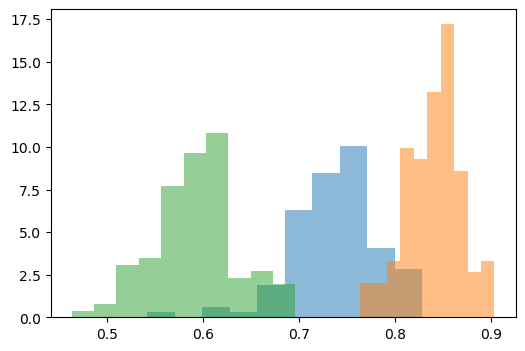

0.2313384813384814
111
(168, 111)
0.2524707996406107
106
(63, 106)
0.21660791226008608
111
(322, 111)


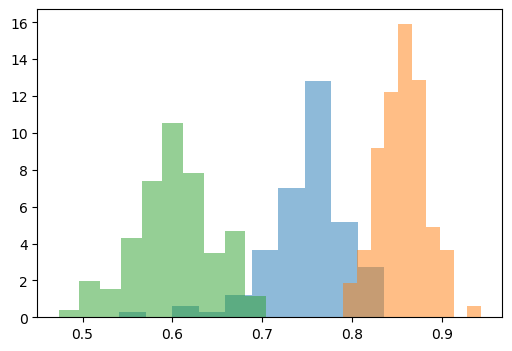

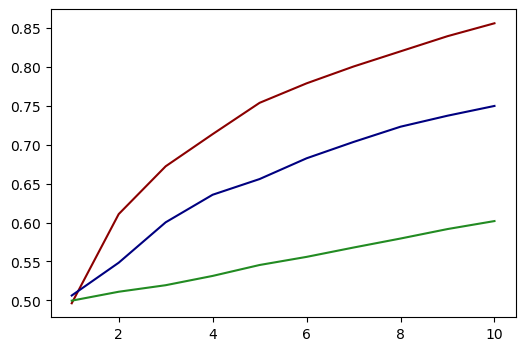

In [615]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

0.2934151256519678
456
0.29128837575439526
515
0.28652691152691157
468


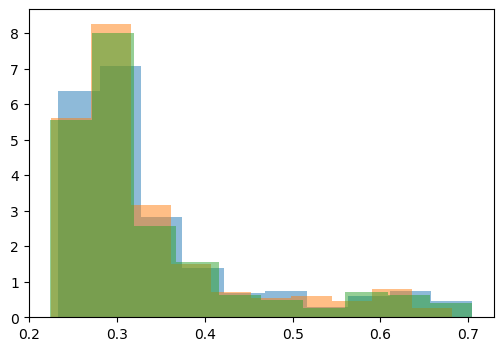

0.299020759890325
345
0.30569472867123004
383
0.29151932306137907
428


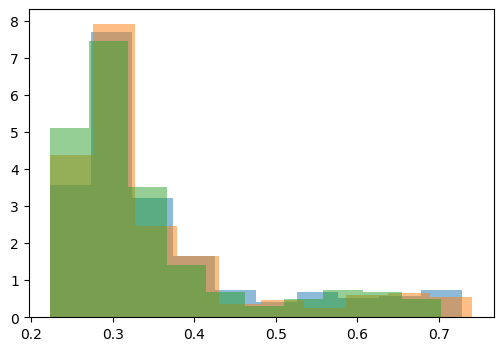

0.2910132354576798
243
0.3088536812674745
290
0.2834250179382922
339


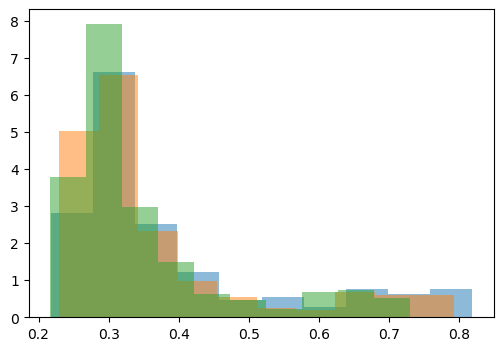

0.303789083200848
204
0.30844438908955046
217
0.2889451951951951
288


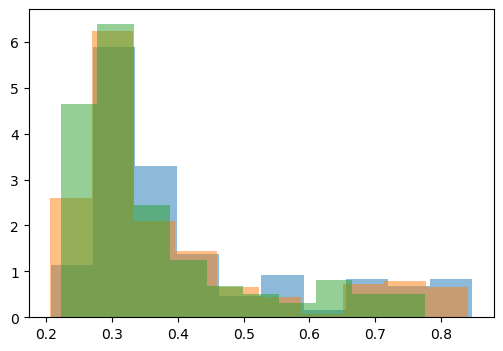

0.2976372599014107
159
0.31834293309703143
183
0.28719103719103717
234


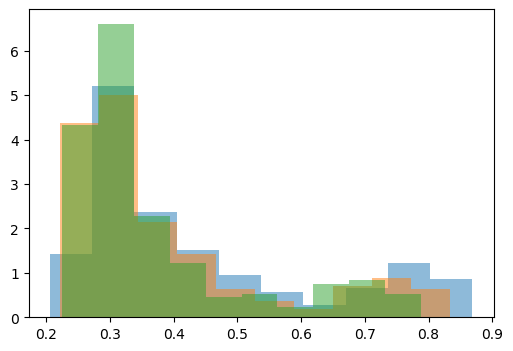

0.30091508831666314
127
0.3208779249047706
149
0.287419399094526
197


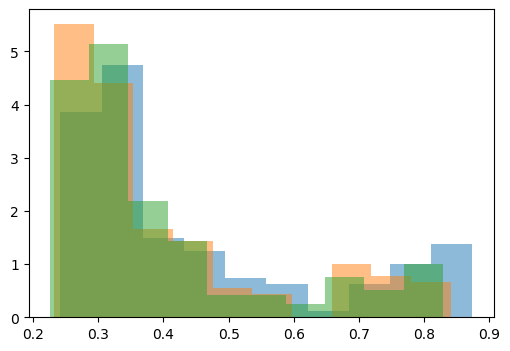

0.292972972972973
100
0.3259590235396687
124
0.29384035197988684
172


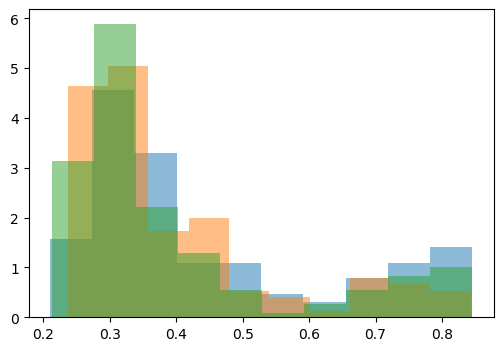

0.29231016731016735
84
0.3198198198198199
102
0.2901152901152901
143


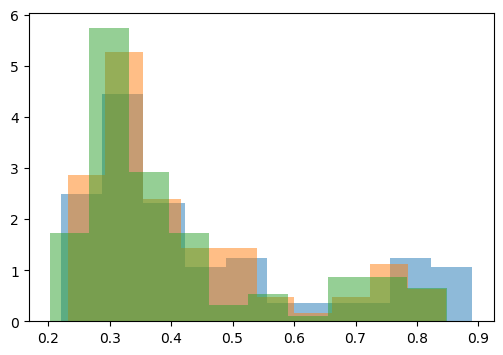

0.2991234477720965
74
0.3232370301335818
87
0.2782867613376089
118


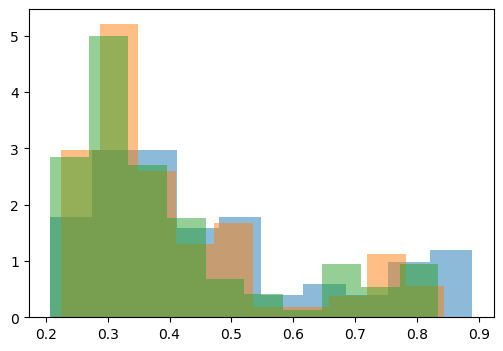

0.29064449064449044
65
0.3345877523092713
79
0.28816316316316326
108


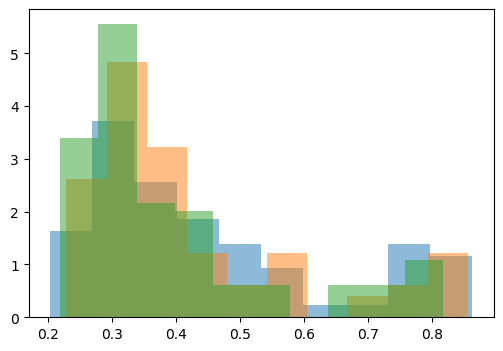

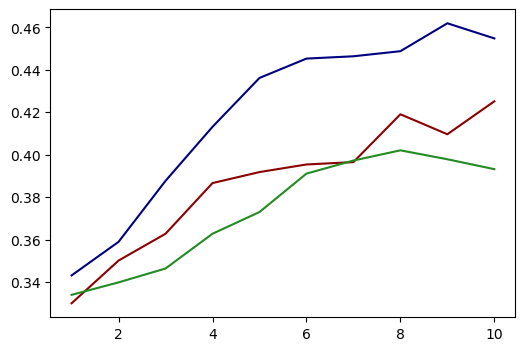

In [618]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

0.2934151256519678
456
0.29128837575439526
515
0.28652691152691157
468


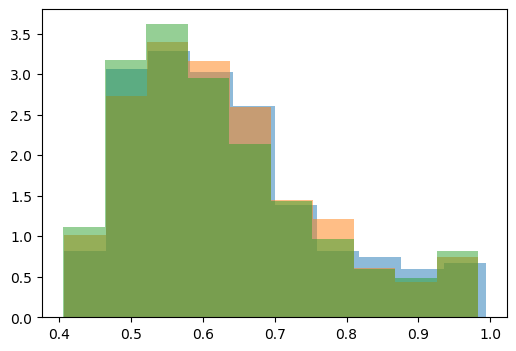

0.299020759890325
345
0.30569472867123004
383
0.29151932306137907
428


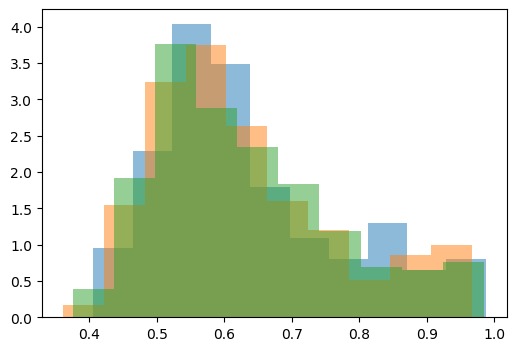

0.2910132354576798
243
0.3088536812674745
290
0.2834250179382922
339


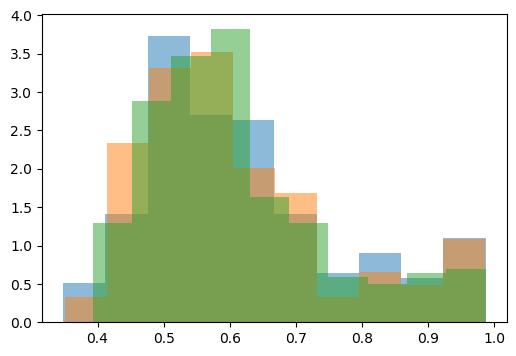

0.303789083200848
204
0.30844438908955046
217
0.2889451951951951
288


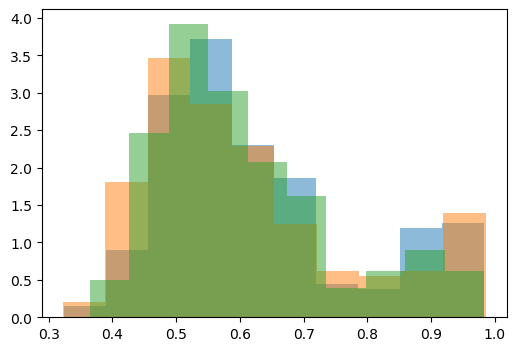

0.2976372599014107
159
0.31834293309703143
183
0.28719103719103717
234


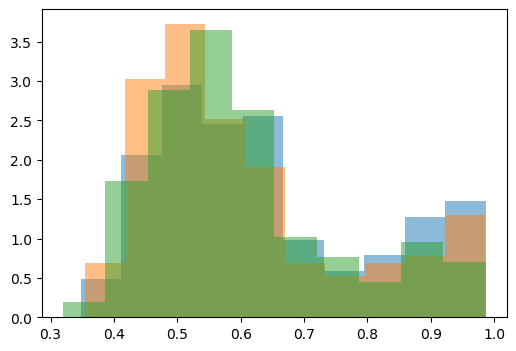

0.30091508831666314
127
0.3208779249047706
149
0.287419399094526
197


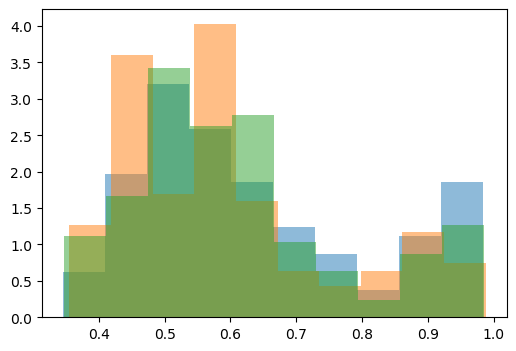

0.292972972972973
100
0.3259590235396687
124
0.29384035197988684
172


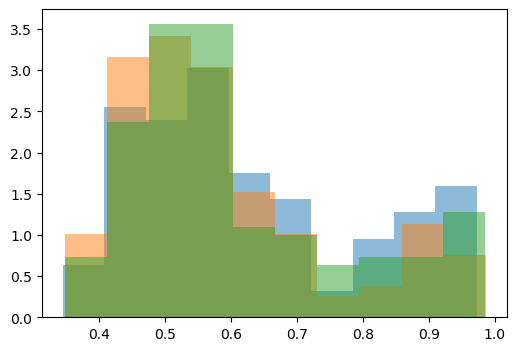

0.29231016731016735
84
0.3198198198198199
102
0.2901152901152901
143


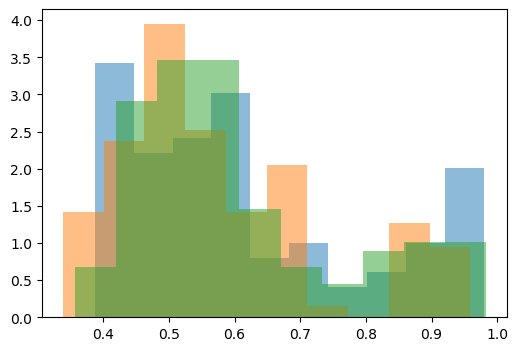

0.2991234477720965
74
0.3232370301335818
87
0.2782867613376089
118


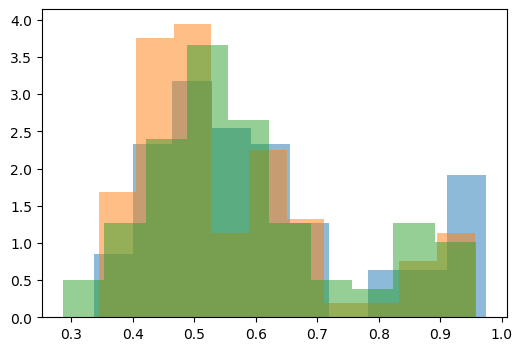

0.29064449064449044
65
0.3345877523092713
79
0.28816316316316326
108


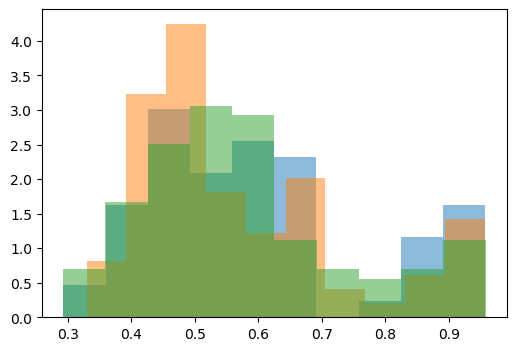

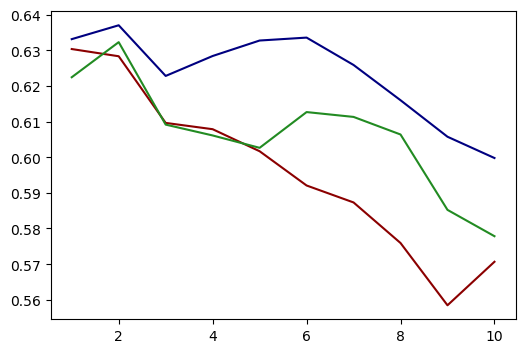

In [619]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

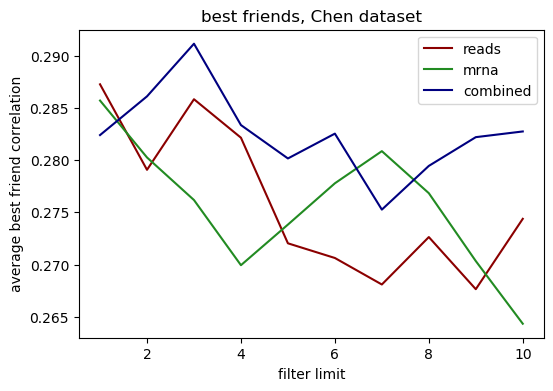

In [624]:
# both = []
# read = []
# mrna = []
# for limite in range(1, 11):
#     output = best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
#                  method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
#                  quant=0.9, top_friends=5)
#     both.append(output[0])
#     read.append(output[1])
#     mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, Chen dataset')
plt.show()

0.1892900363049617
402
0.17198109439488754
406
0.16398934145413022
355


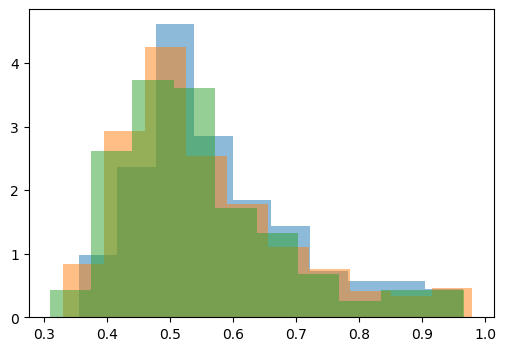

0.20283222519644253
313
0.18974836905871392
290
0.19414178576482238
382


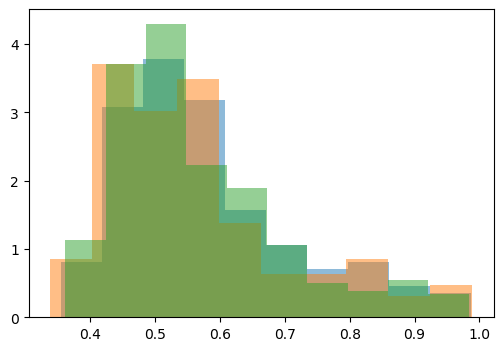

0.22075550453928833
259
0.2507374631268437
339
0.18312189740761164
294


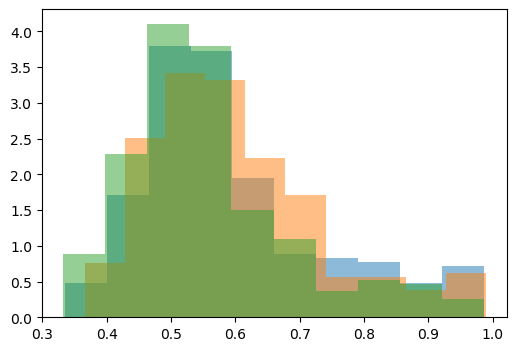

0.2578440509474992
261
0.26688043976179565
295
0.20251501501501504
288


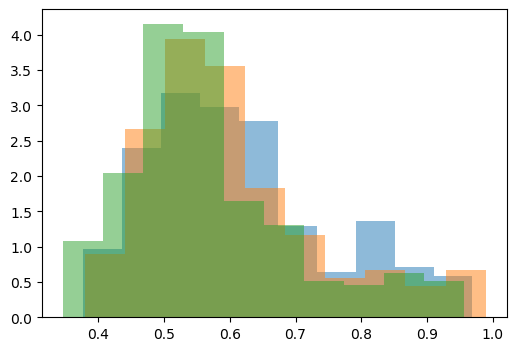

0.26755601755601743
234
0.27987753378378377
256
0.22958230958230963
275


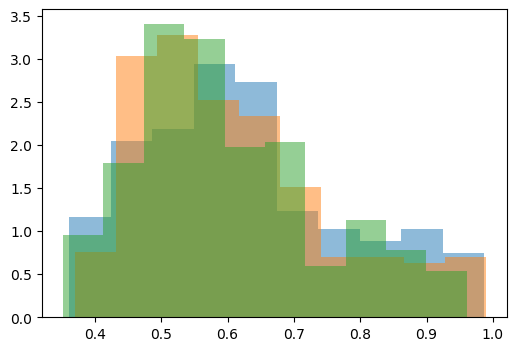

0.26511188607962793
186
0.2876186997808619
222
0.20455749867514575
204


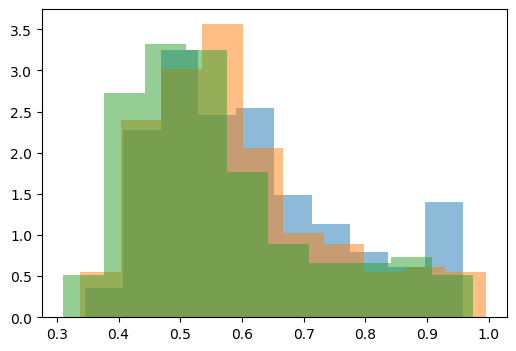

0.2783940009373536
173
0.29473319473319465
195
0.2343217003411178
206


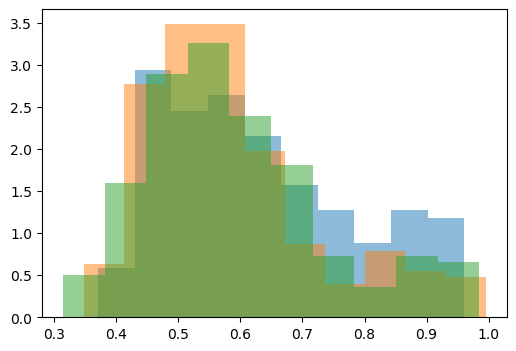

0.2700799390940236
142
0.2965023847376788
170
0.2220641694325905
171


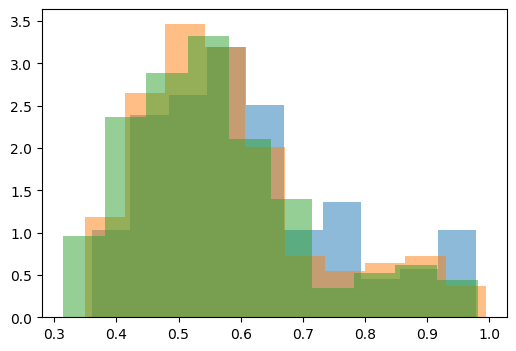

0.2759097680357523
127
0.29996322853465707
147
0.2538610038610039
182


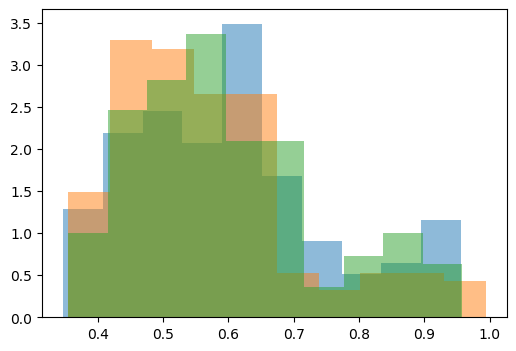

0.2743725868725869
112
0.30326838466373357
129
0.2586753420086753
162


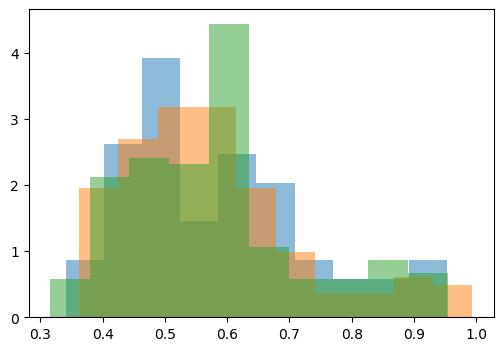

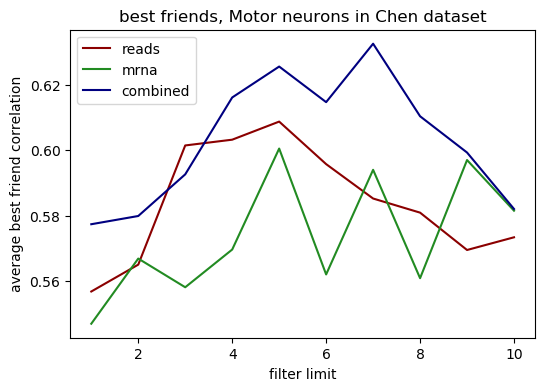

In [625]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, Motor neurons in Chen dataset')
plt.show()

0.221064531543186
773
0.21832177004590797
783
0.2190366304208477
773


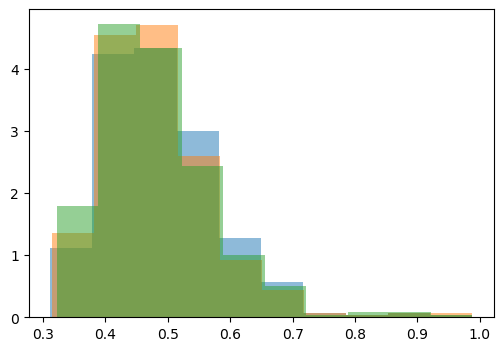

0.21774680791074236
671
0.24031174031174027
504
0.21700341117816851
721


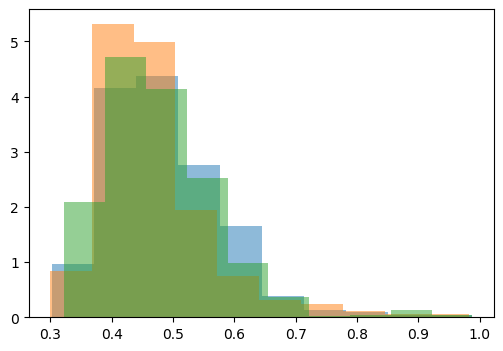

0.22477234865026613
557
0.2632870966204299
378
0.2138028439398303
657


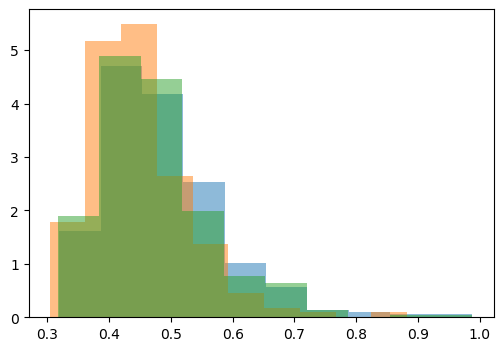

0.2240027083450883
479
0.2680342212716313
278
0.20648092346205554
583


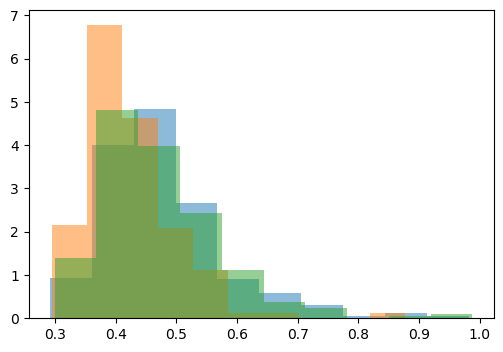

0.23091628213579438
410
0.25627097685921213
204
0.20848699166456175
535


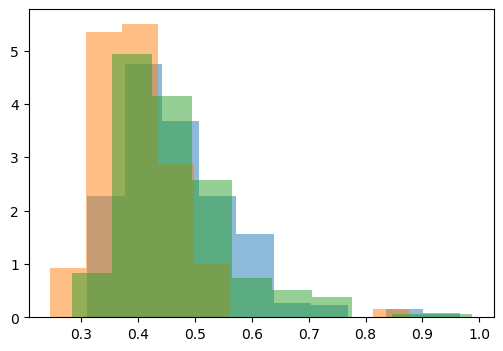

0.23012029370410897
346
0.2596525096525096
168
0.2109946681375253
490


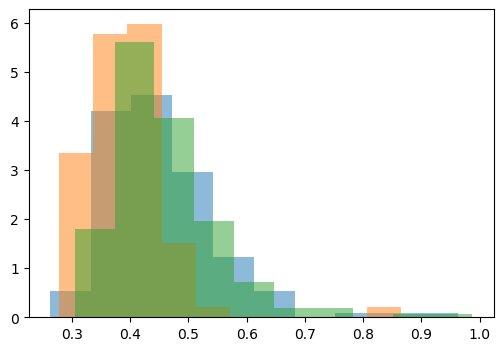

0.23594182417711823
306
0.25413473174667206
134
0.2078186784069137
442


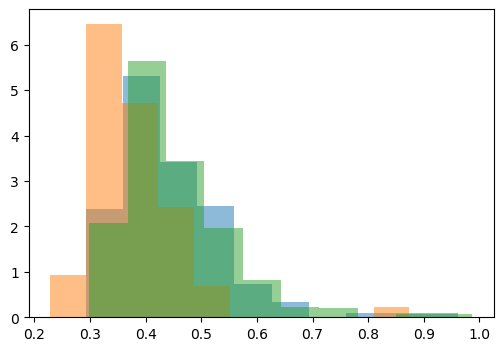

0.22851046535257066
266
0.2591461026243634
115
0.20612612612612616
400


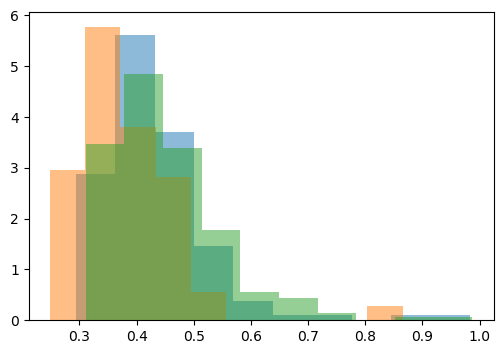

0.22722303893852003
239
0.26469768737809957
97
0.20313702131883948
363


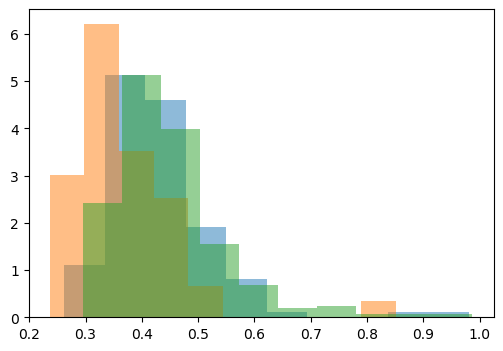

0.23052959501557632
214
0.27467001885606546
86
0.20309498687877078
333


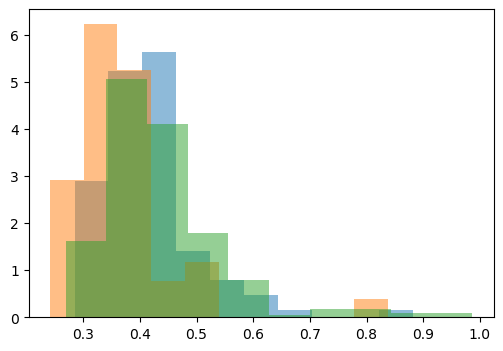

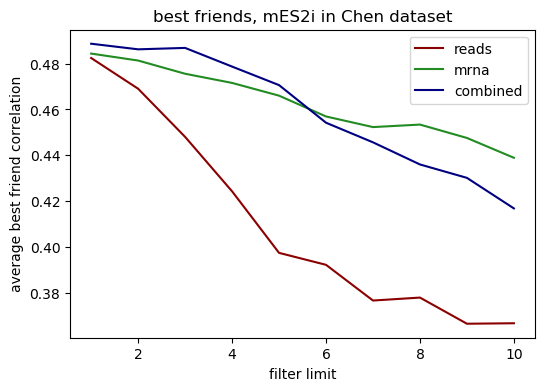

In [626]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, mES2i in Chen dataset')
plt.show()

0.1892900363049617
402
0.17198109439488754
406
0.16398934145413022
355


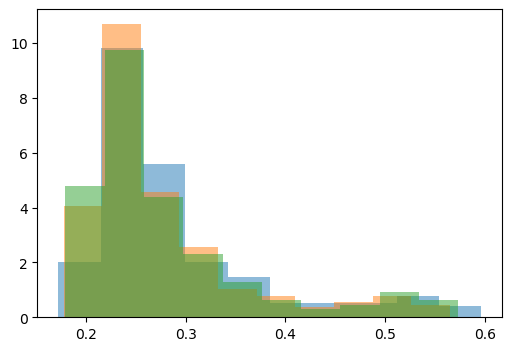

0.20283222519644253
313
0.18974836905871392
290
0.19414178576482238
382


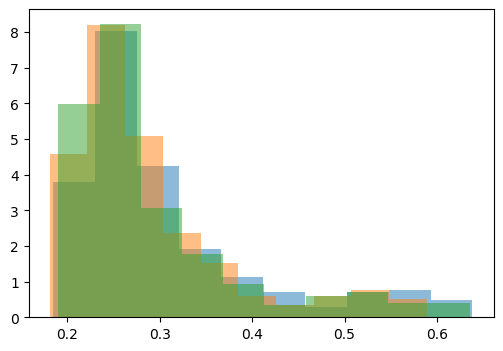

0.22075550453928833
259
0.2507374631268437
339
0.18312189740761164
294


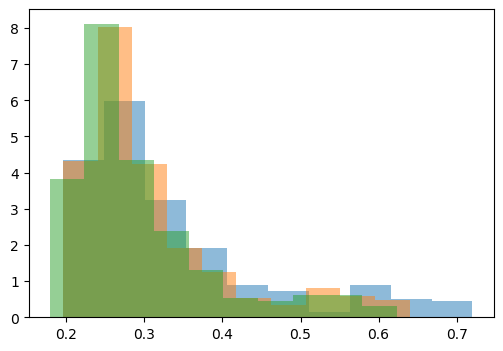

0.2578440509474992
261
0.26688043976179565
295
0.20251501501501504
288


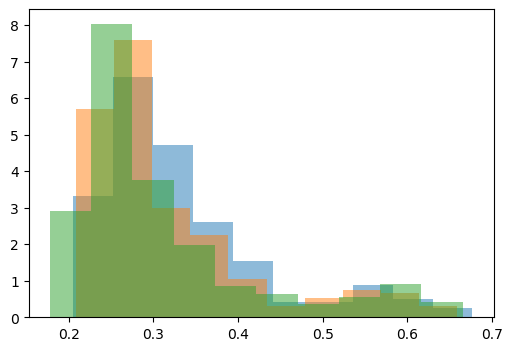

0.26755601755601743
234
0.27987753378378377
256
0.22958230958230963
275


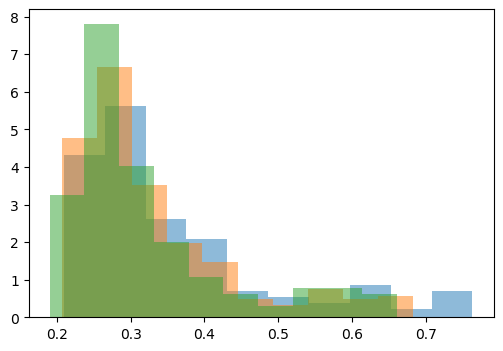

0.26511188607962793
186
0.2876186997808619
222
0.20455749867514575
204


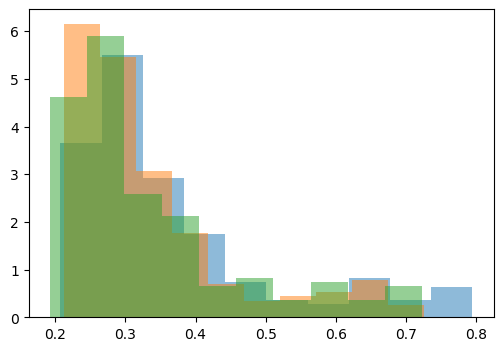

0.2783940009373536
173
0.29473319473319465
195
0.2343217003411178
206


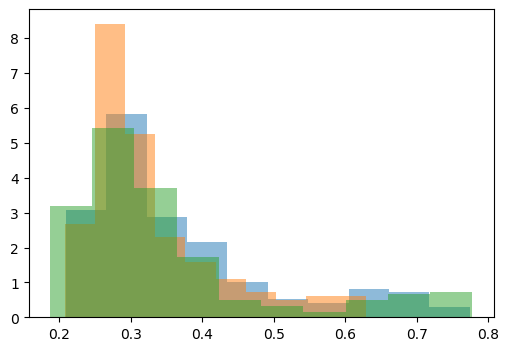

0.2700799390940236
142
0.2965023847376788
170
0.2220641694325905
171


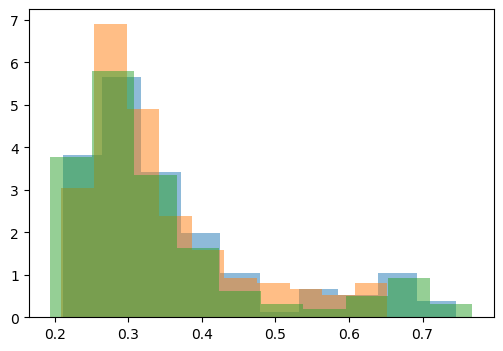

0.2759097680357523
127
0.29996322853465707
147
0.2538610038610039
182


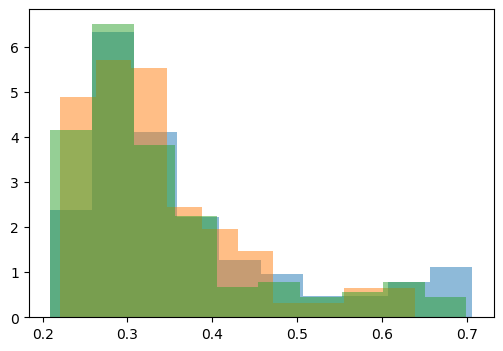

0.2743725868725869
112
0.30326838466373357
129
0.2586753420086753
162


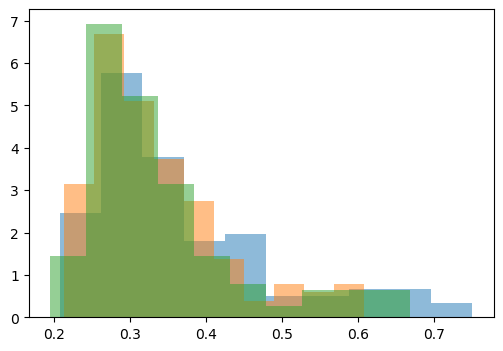

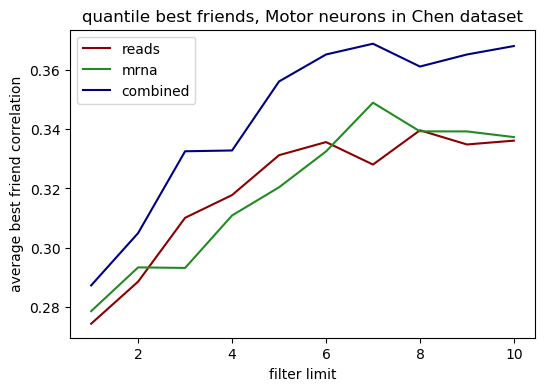

In [627]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('quantile best friends, Motor neurons in Chen dataset')
plt.show()

0.2619055842082643
488
(1068, 488)
0.26889567302330725
488
(1176, 488)
0.2672501415731316
488
(1129, 488)


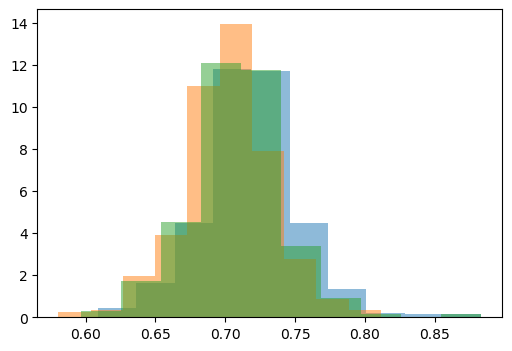

0.26079723999545673
488
(866, 488)
0.2695692410272919
488
(713, 488)
0.2607259261649671
488
(1016, 488)


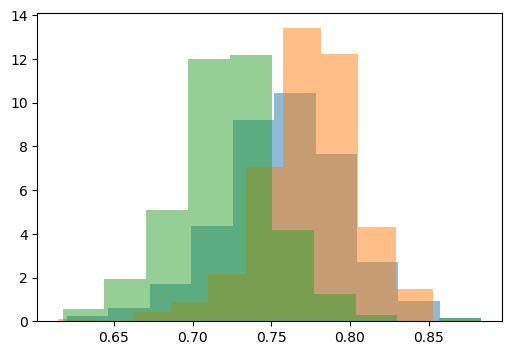

0.26033643979816046
488
(679, 488)
0.2820584656762295
488
(512, 488)
0.257524298400773
488
(899, 488)


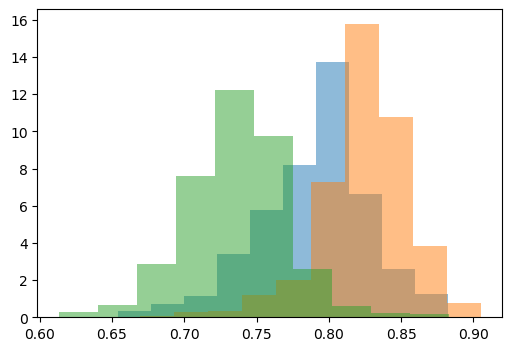

0.26496776734146216
488
(562, 488)
0.28012625594923296
488
(372, 488)
0.25397613797120744
488
(788, 488)


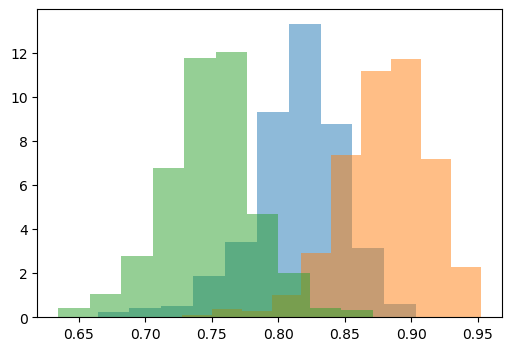

0.26592771982116237
488
(462, 488)
0.2804673269581055
488
(288, 488)
0.2537989102353329
488
(698, 488)


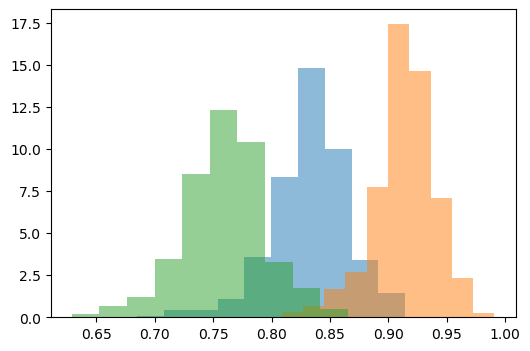

0.2601969822150714
488
(377, 488)
0.27739100866203736
488
(229, 488)
0.2546509486093202
488
(623, 488)


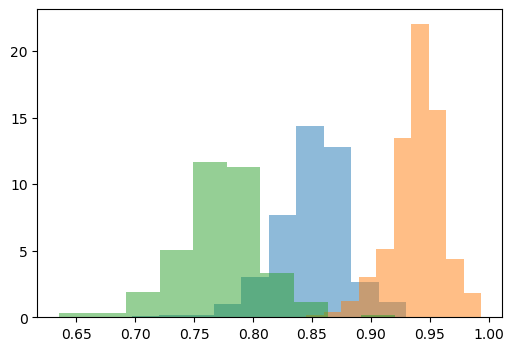

0.26007566204287536
488
(325, 488)
0.28295588980902486
488
(194, 488)
0.2536516024220943
488
(555, 488)


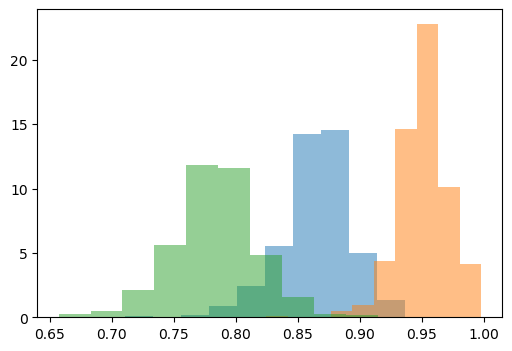

0.26066292781133144
488
(285, 488)
0.2829251734888866
488
(163, 488)
0.2550739664293646
488
(502, 488)


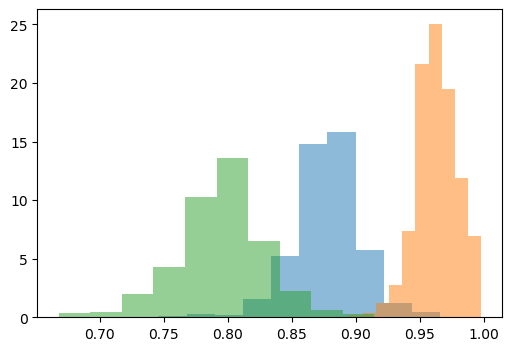

0.26486865883567845
488
(254, 488)
0.27935673556664303
488
(138, 488)
0.2557322885823643
488
(454, 488)


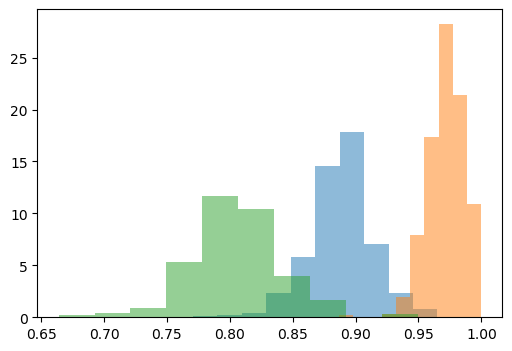

0.26153817752178427
488
(222, 488)
0.28332437516796555
488
(122, 488)
0.2556800095495781
488
(412, 488)


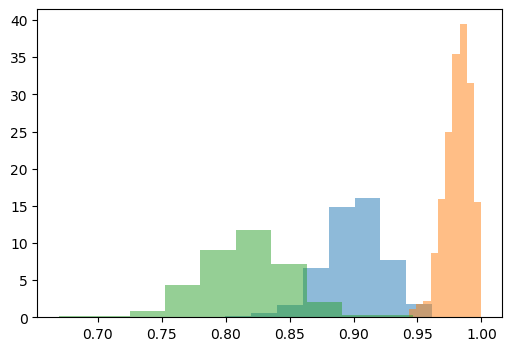

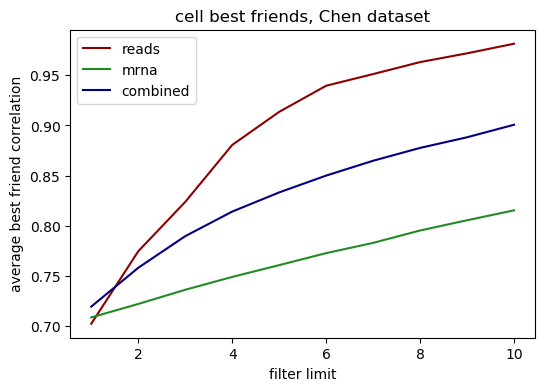

In [628]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('cell best friends, Chen dataset')
plt.show()

0.26497600441688596
772
0.27133087593365046
845
0.2700212507589559
810


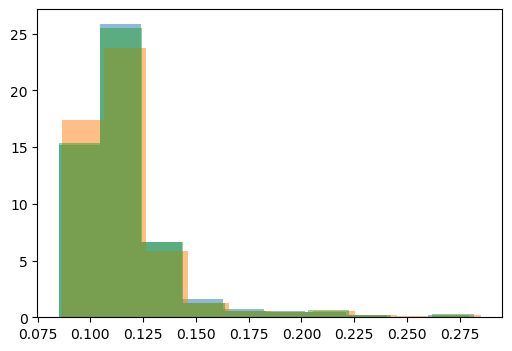

0.263946080335638
633
0.2751647004749505
535
0.2626929810600032
721


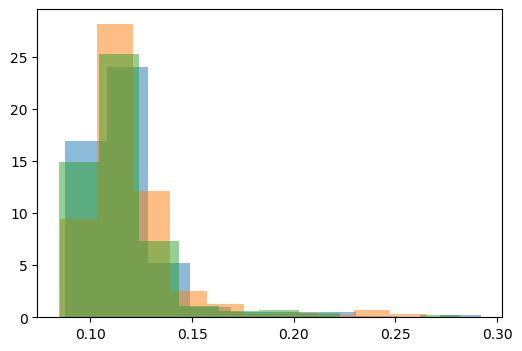

0.26371469484495363
498
0.28680622866534616
389
0.2597725150446151
632


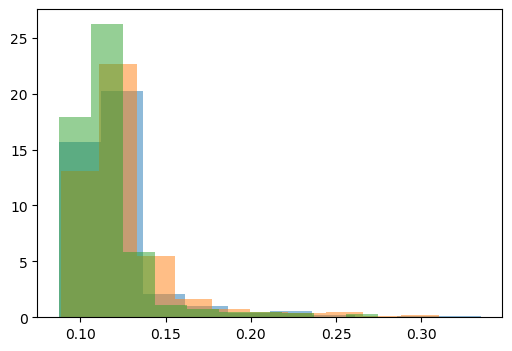

0.2678253999604981
415
0.28380793011515115
289
0.25535105300945315
548


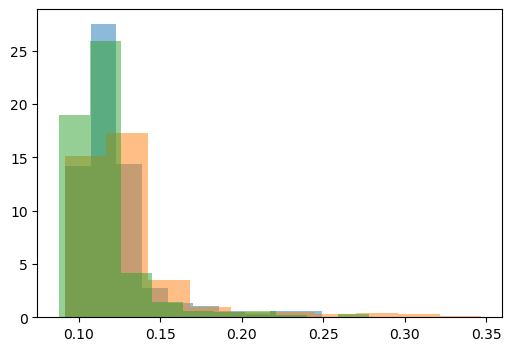

0.2690722261819911
345
0.2846713992974242
224
0.2553032617180872
483


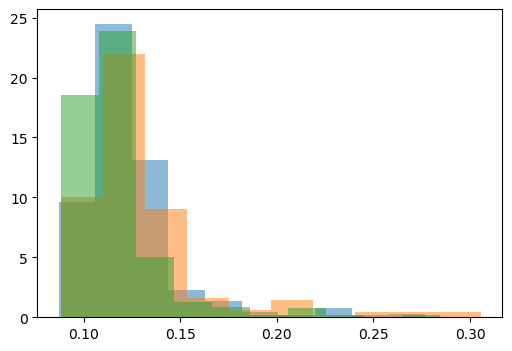

0.2593552684933094
283
0.2764541076224879
177
0.2569022507547098
429


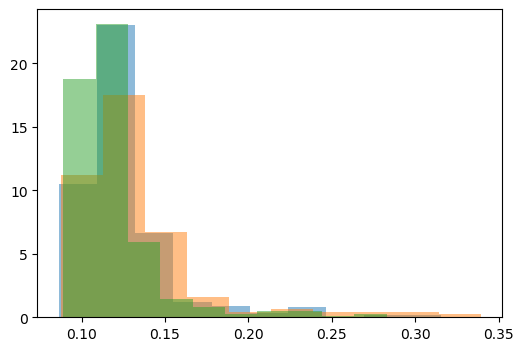

0.26014594162335064
246
0.2843642148403797
152
0.2557916307161347
380


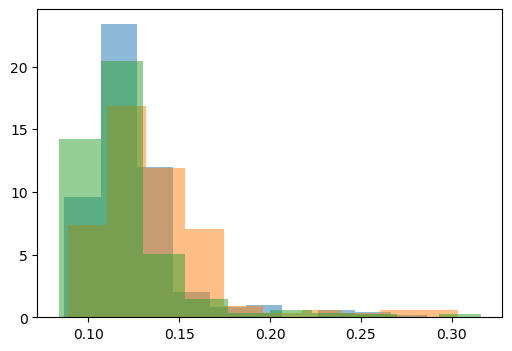

0.2607558359144821
217
0.2823019647102988
131
0.2534981569502376
338


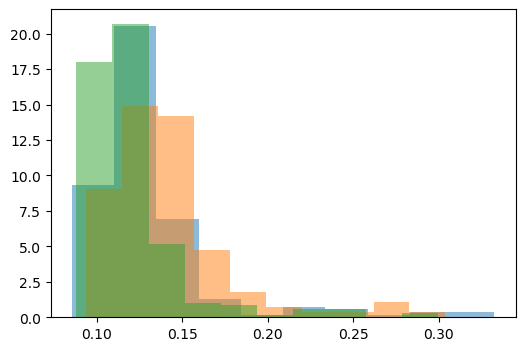

0.2655167314517491
194
0.2729135618479879
110
0.2517234827923133
302


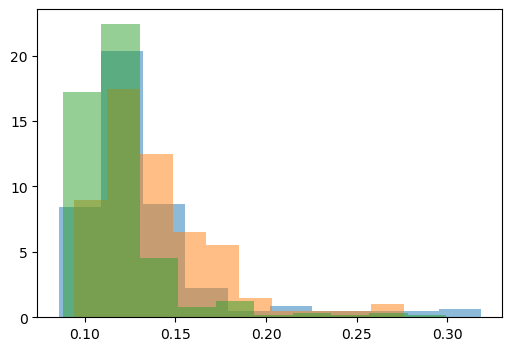

0.2603065282762634
169
0.2790740139587729
101
0.2555526176626125
279


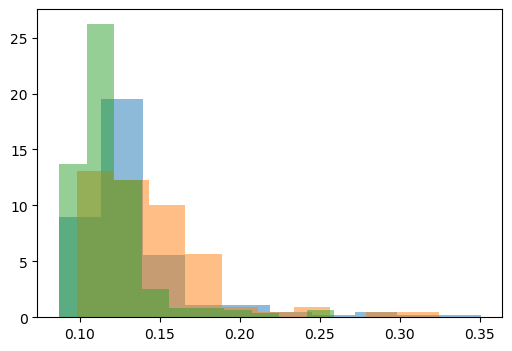

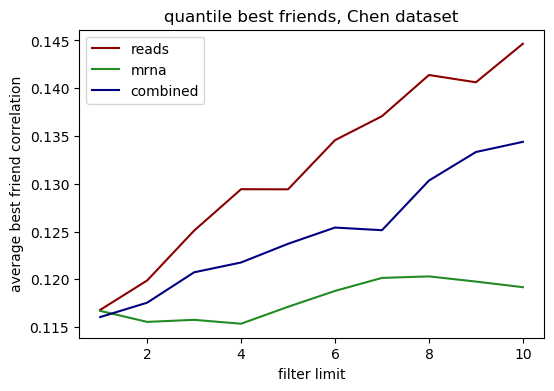

In [629]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('quantile best friends, Chen dataset')
plt.show()

0.221064531543186
773
0.21832177004590797
783
0.2190366304208477
773


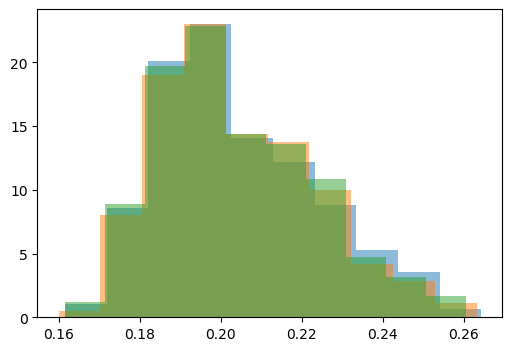

0.21774680791074236
671
0.24031174031174027
504
0.21700341117816851
721


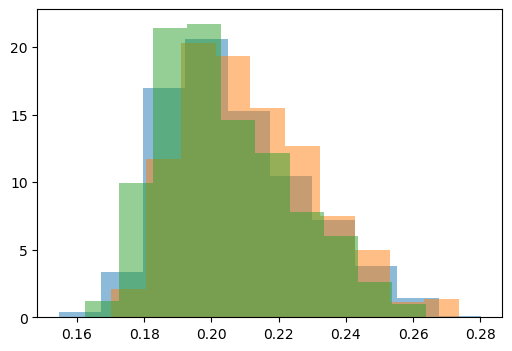

0.22477234865026613
557
0.2632870966204299
378
0.2138028439398303
657


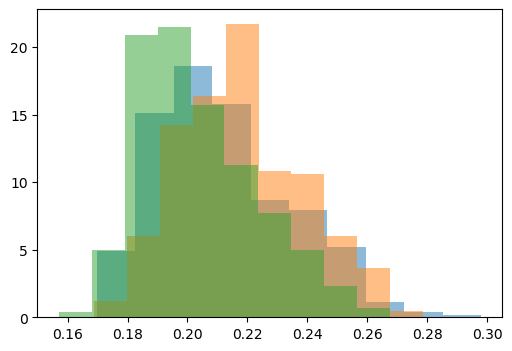

0.2240027083450883
479
0.2680342212716313
278
0.20648092346205554
583


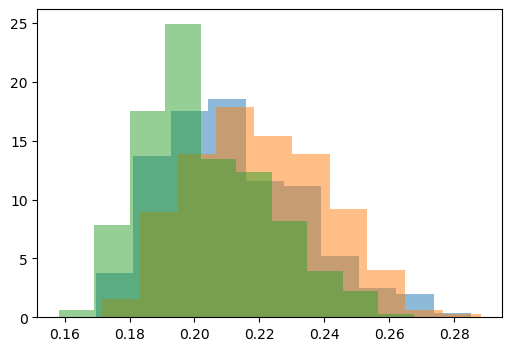

0.23091628213579438
410
0.25627097685921213
204
0.20848699166456175
535


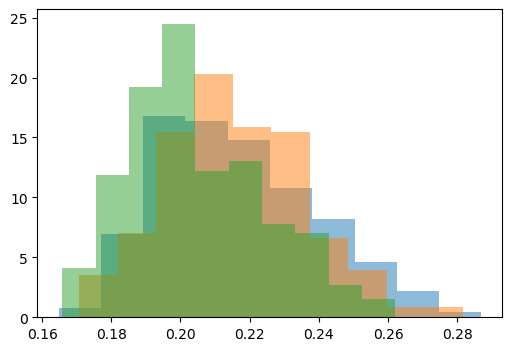

0.23012029370410897
346
0.2596525096525096
168
0.2109946681375253
490


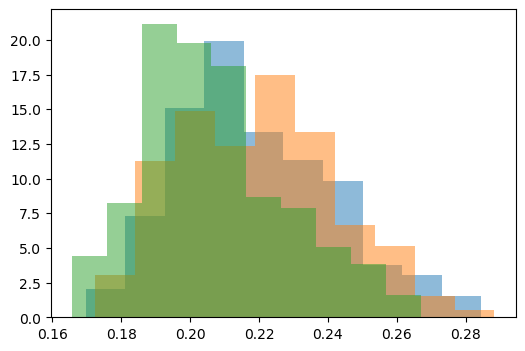

0.23594182417711823
306
0.25413473174667206
134
0.2078186784069137
442


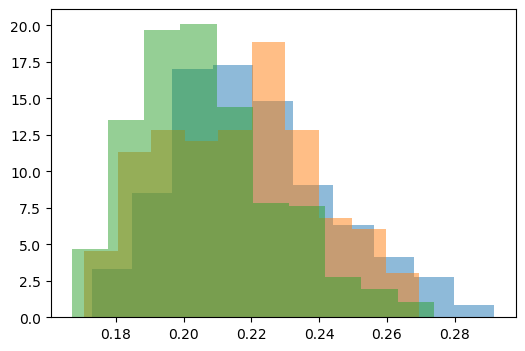

0.22851046535257066
266
0.2591461026243634
115
0.20612612612612616
400


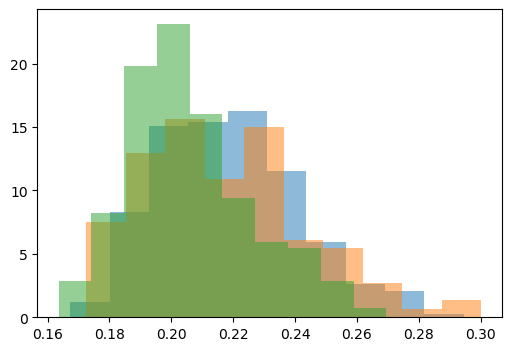

0.22722303893852003
239
0.26469768737809957
97
0.20313702131883948
363


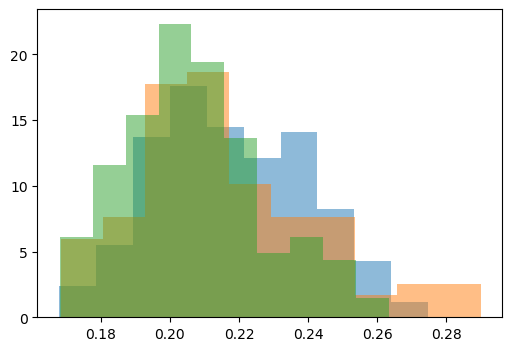

0.23052959501557632
214
0.27467001885606546
86
0.20309498687877078
333


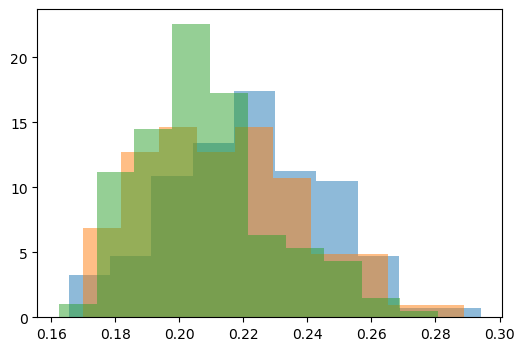

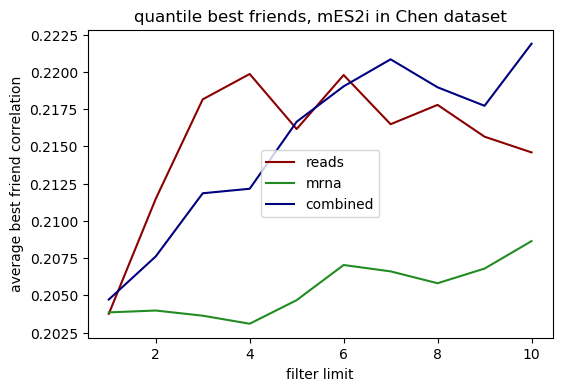

In [630]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('quantile best friends, mES2i in Chen dataset')
plt.show()

0.29096366425133546
74
(1022, 74)
0.29261954261954254
74
(1196, 74)
0.2918415309719658
74
(1127, 74)


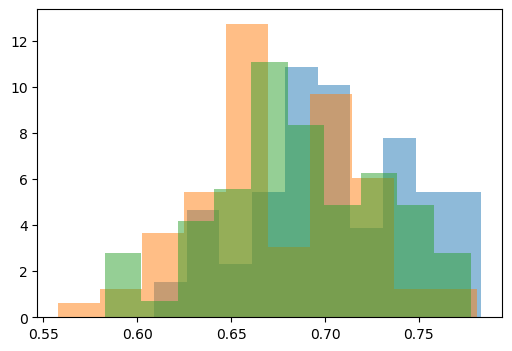

0.29263869132290193
74
(760, 74)
0.29990516832622105
74
(855, 74)
0.28900460093120645
74
(981, 74)


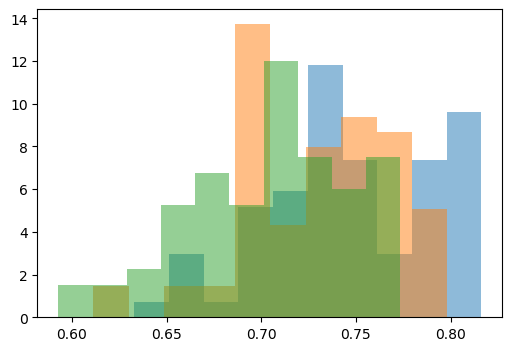

0.29348143107135904
74
(556, 74)
0.30682390464999165
74
(644, 74)
0.28867831245880016
74
(820, 74)


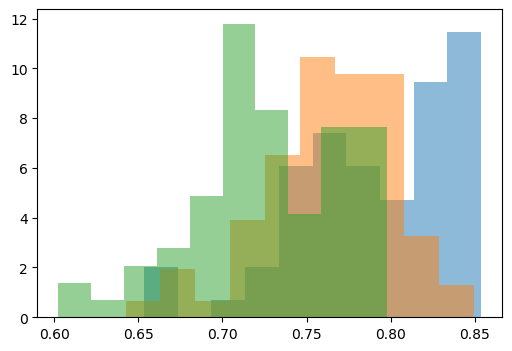

0.2930743243243244
74
(432, 74)
0.3139354769789553
74
(506, 74)
0.2882016632016632
74
(676, 74)


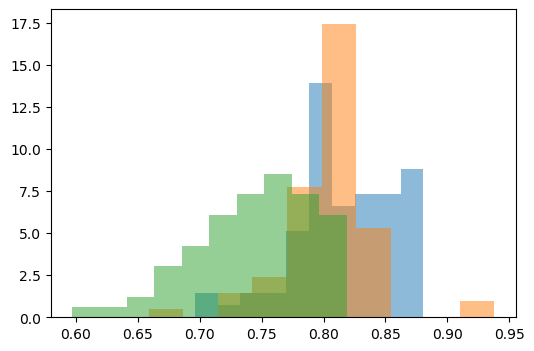

0.28718215256676793
74
(338, 74)
0.31358108108108124
74
(400, 74)
0.28905095571762224
74
(567, 74)


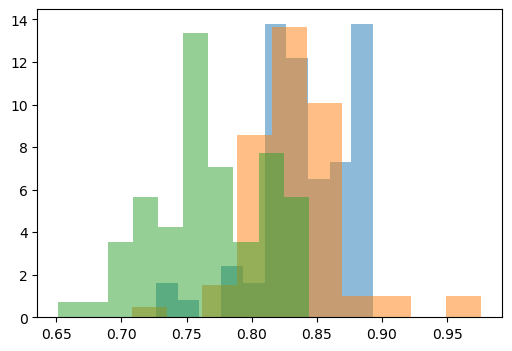

0.2879724743193379
74
(271, 74)
0.3095823095823095
74
(319, 74)
0.2859447934074799
74
(469, 74)


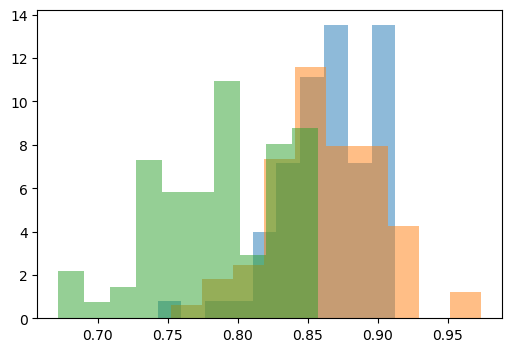

0.2813882063882064
74
(220, 74)
0.30937755937755934
74
(264, 74)
0.28664824425422936
74
(401, 74)


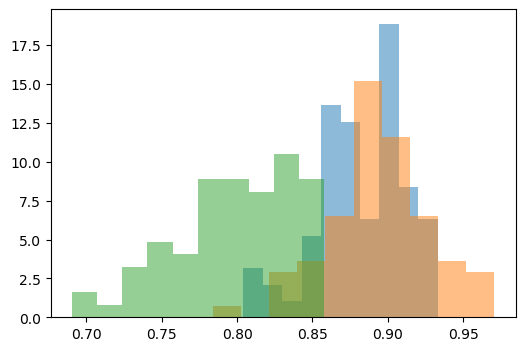

0.27878965922444177
74
(184, 74)
0.3102678571428571
74
(224, 74)
0.28386350952722633
74
(339, 74)


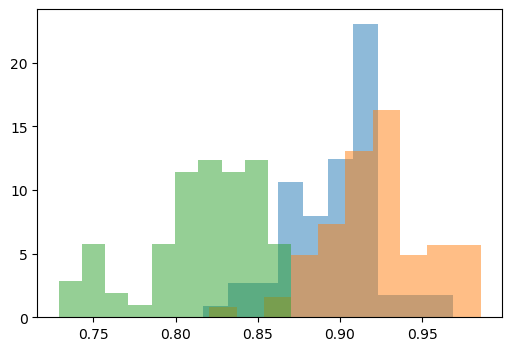

0.28023648648648647
74
(160, 74)
0.31123310810810817
74
(192, 74)
0.27789207893014106
74
(289, 74)


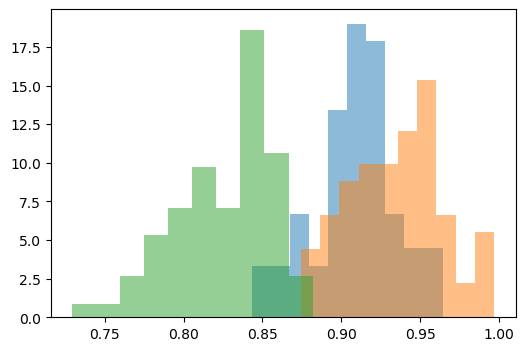

0.27950612482986587
74
(139, 74)
0.3145468998410174
74
(170, 74)
0.28238045738045736
74
(260, 74)


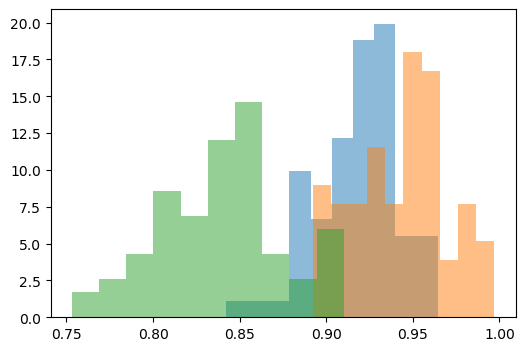

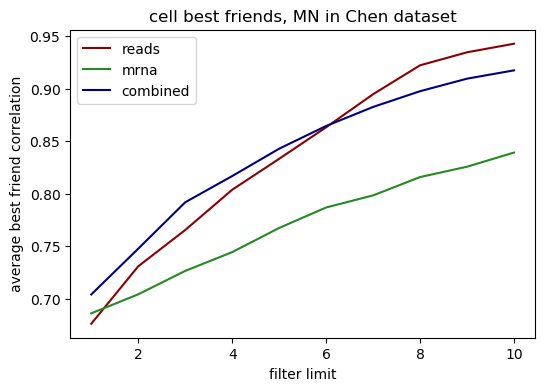

In [631]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('cell best friends, MN in Chen dataset')
plt.show()

0.2405094749922336
111
(1160, 111)
0.24351150157601784
111
(1209, 111)
0.24212378058531905
111
(1183, 111)


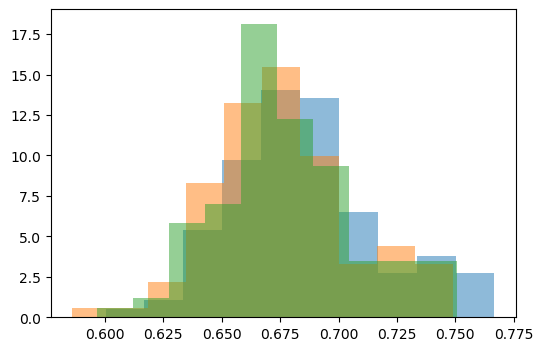

0.2307982829455222
111
(978, 111)
0.2452889570793501
111
(687, 111)
0.23664809223392338
111
(1101, 111)


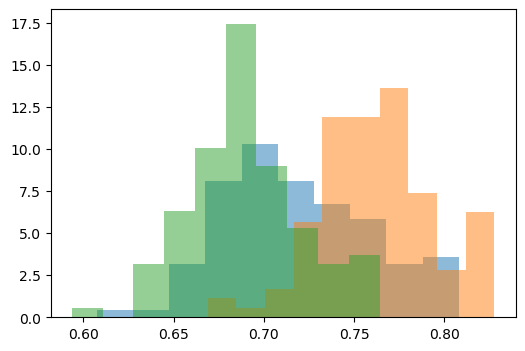

0.22781605134546284
111
(765, 111)
0.2597566251010927
111
(479, 111)
0.23272825063869843
111
(1005, 111)


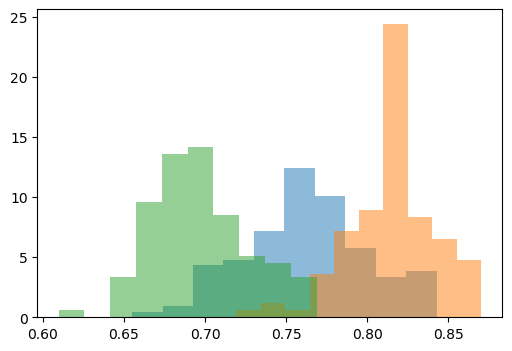

0.22675241337760765
111
(643, 111)
0.26188797493145327
111
(345, 111)
0.22832144783364294
111
(902, 111)


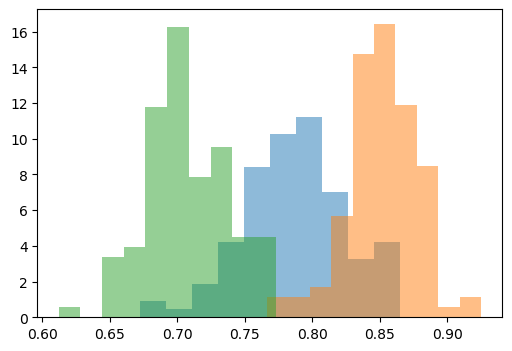

0.23094761428094748
111
(540, 111)
0.2525752844477946
111
(251, 111)
0.22207600859286253
111
(801, 111)


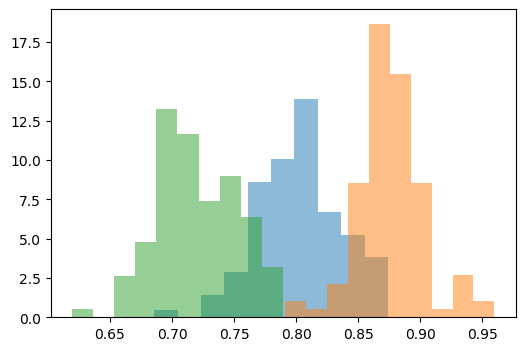

0.23060284954558088
111
(454, 111)
0.25549194514711765
111
(203, 111)
0.22021054203374643
111
(724, 111)


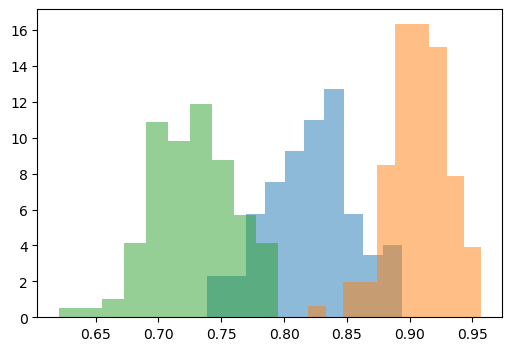

0.23706369686269177
111
(398, 111)
0.2510288065843621
111
(162, 111)
0.2163825363825363
111
(650, 111)


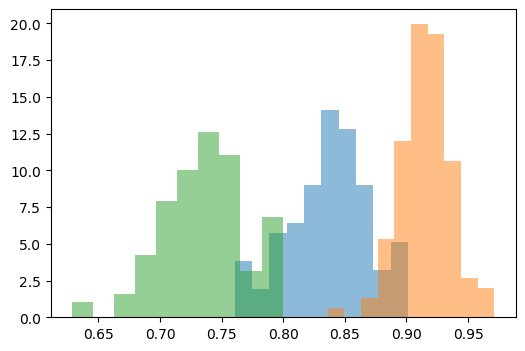

0.23007217744059844
111
(342, 111)
0.26132470498667676
111
(142, 111)
0.21779355112688453
111
(594, 111)


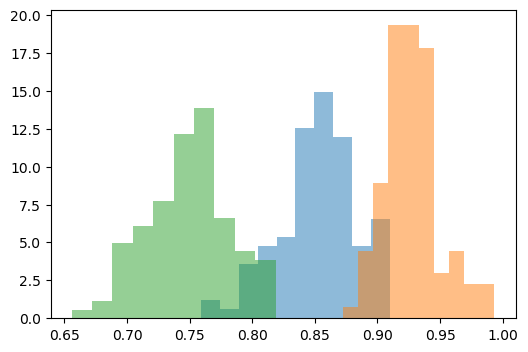

0.22892958748221906
111
(304, 111)
0.26614114114114107
111
(120, 111)
0.21166090902933002
111
(532, 111)


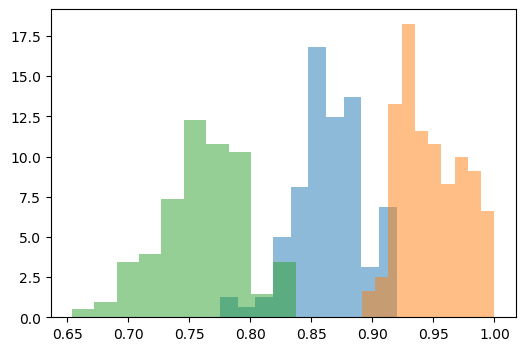

0.22994741953849762
111
(269, 111)
0.2612032462949893
109
(104, 109)
0.21554281554281543
111
(495, 111)


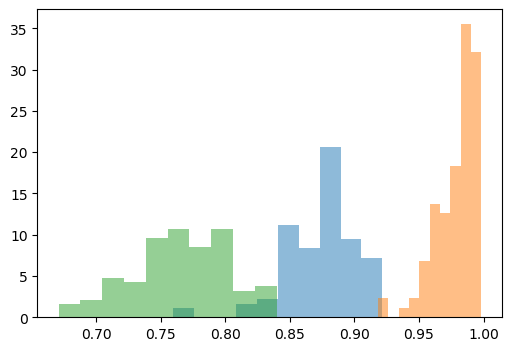

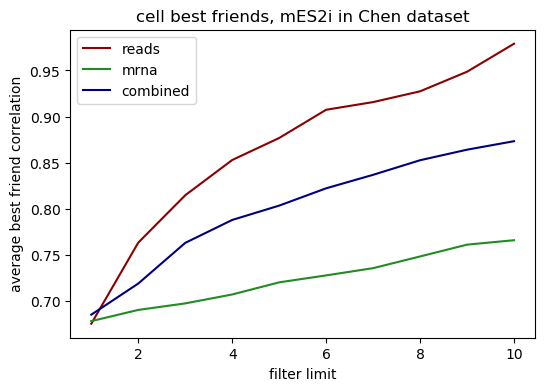

In [632]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('cell best friends, mES2i in Chen dataset')
plt.show()

0.3163316331633164
297
0.3128913075131043
544
0.3188015136592192
382


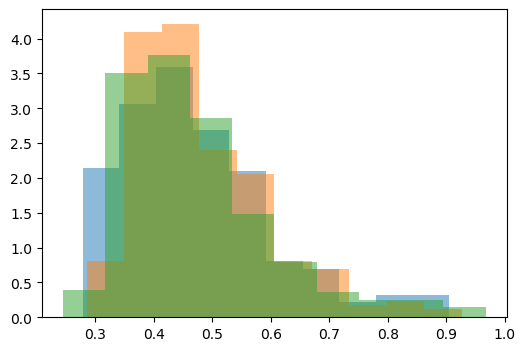

0.31825846340092523
229
0.31575285838156125
491
0.31616097093580325
310


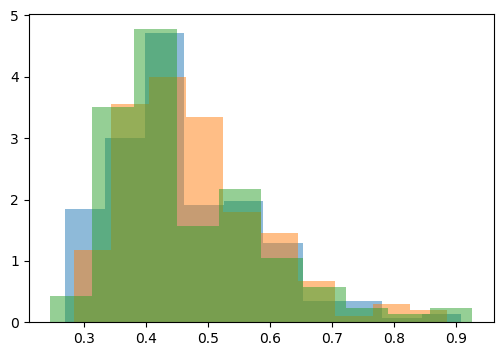

0.32392223597359726
192
0.32035133893136153
474
0.3223463890506696
272


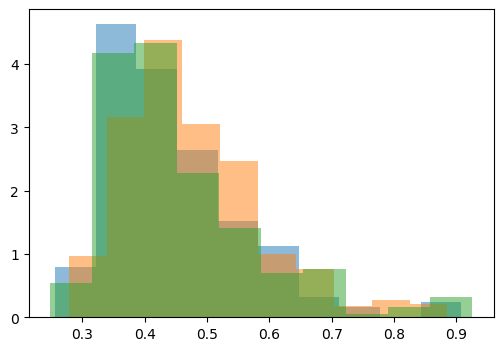

0.318241634290011
158
0.32273544641116186
457
0.3195748146243197
231


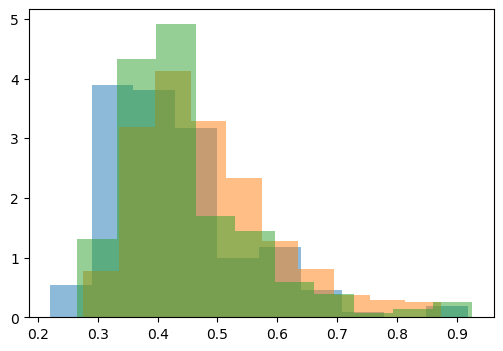

0.31482170773468315
133
0.32085112180942854
436
0.3252738317309992
207


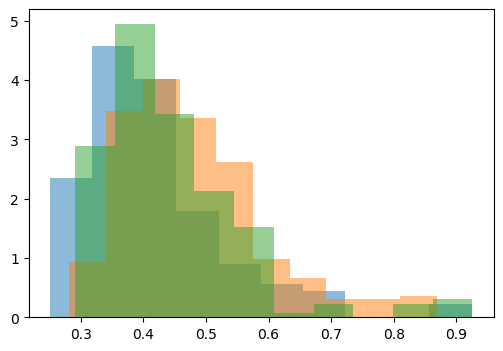

0.32458204836877147
122
0.31660338363933493
412
0.3194625176803396
175


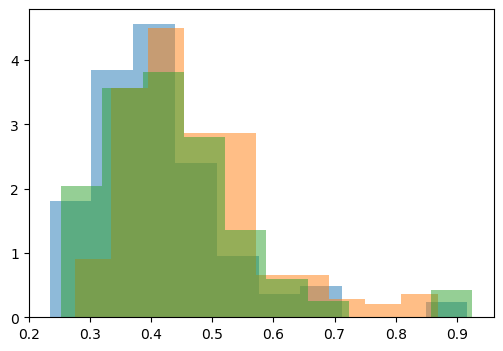

0.3236502895572576
106
0.3190399922345174
408
0.31783472464893525
153


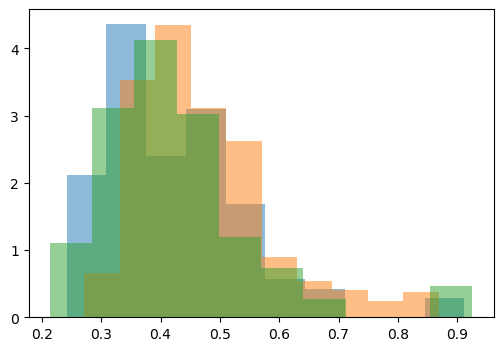

0.32746221990620117
95
0.3176630640163252
393
0.3142633812253406
133


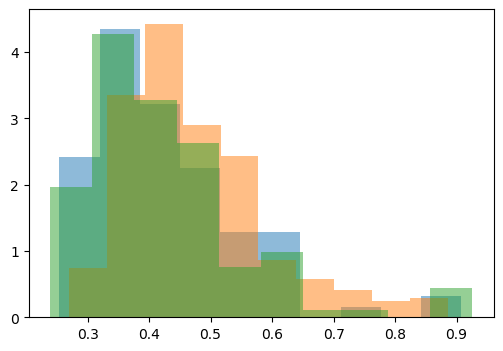

0.3254648635595266
82
0.3160109431995832
380
0.31490876360363307
121


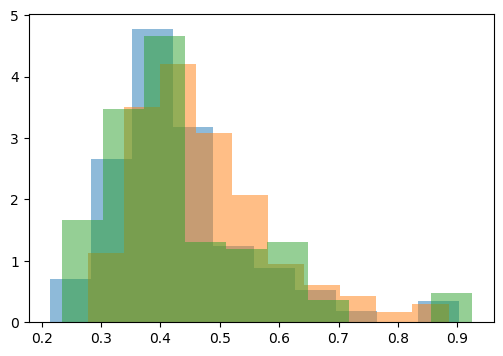

0.32266377322663786
73
0.3168316831683168
373
0.3080515598729686
106


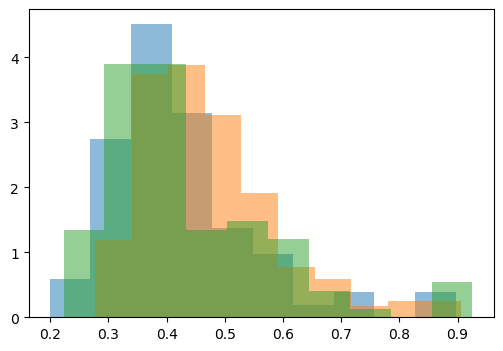

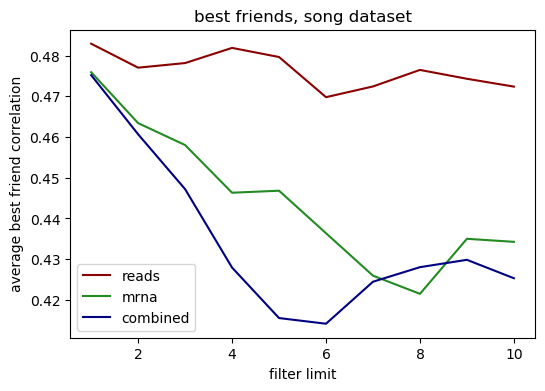

In [633]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, song dataset')
plt.show()

0.3170280493602597
202
(479, 202)
0.3149561652200462
202
(908, 202)
0.3201395482013954
202
(657, 202)


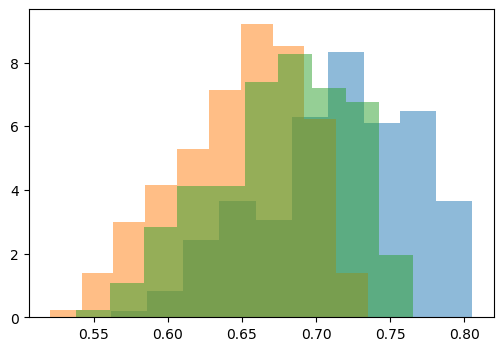

0.315163131912077
202
(359, 202)
0.3175354300135898
202
(816, 202)
0.31430477013545777
202
(527, 202)


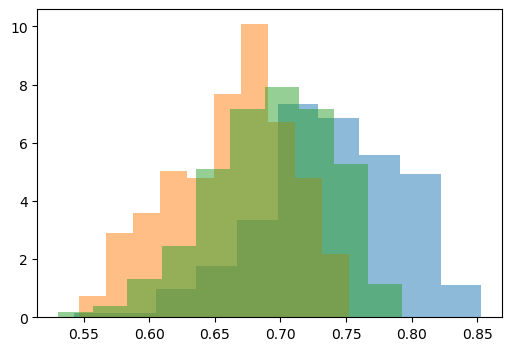

0.31438195365928323
202
(291, 202)
0.3204070407040704
202
(774, 202)
0.3153846153846152
202
(455, 202)


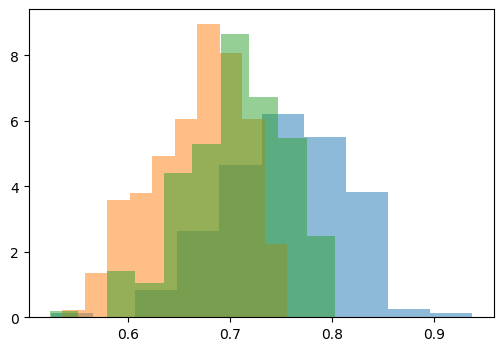

0.3139184288799251
202
(243, 202)
0.3219820636168597
202
(743, 202)
0.31754067366535654
202
(398, 202)


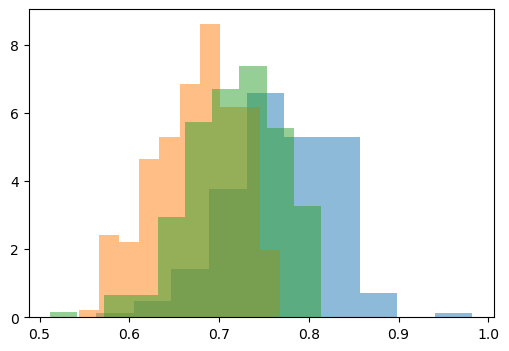

0.29791352438411256
195
(204, 195)
0.32135048947932787
202
(711, 202)
0.3247275844902925
202
(358, 202)


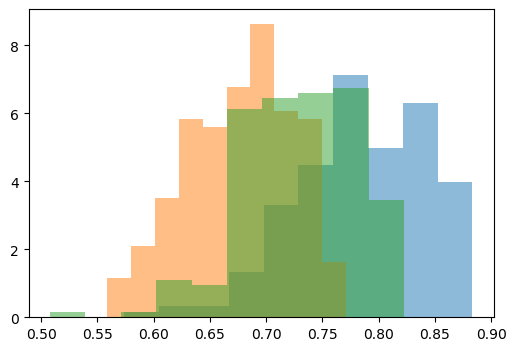

0.30368502171780853
195
(183, 195)
0.3187357197258186
202
(676, 202)
0.31694796996478186
202
(298, 202)


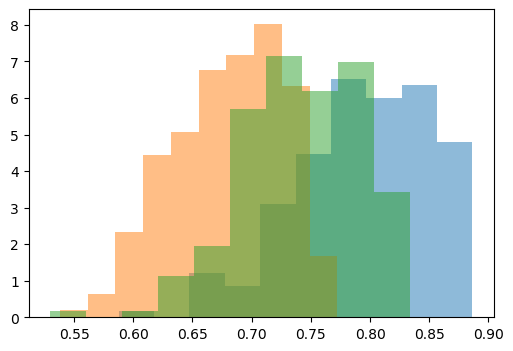

0.29282251548612986
188
(158, 188)
0.31822991459451294
202
(655, 202)
0.31681278814904384
202
(262, 202)


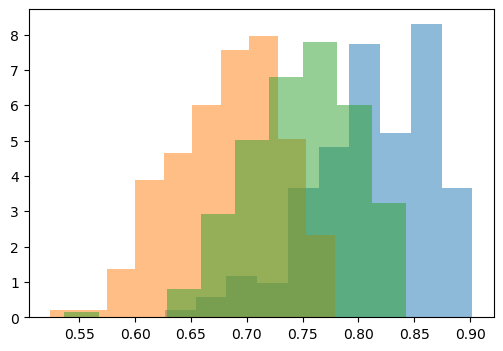

nan
0
(138, 0)
0.3173087450925188
202
(633, 202)
0.3063509053608064
202
(222, 202)


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


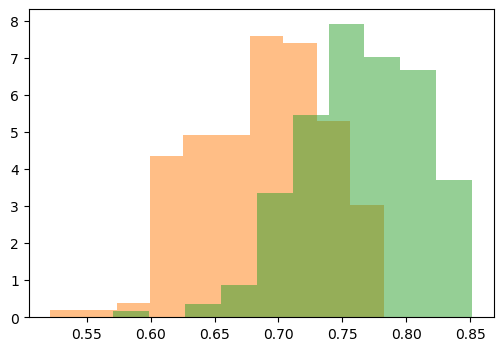

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
0
(120, 0)
0.3164775014086776
202
(615, 202)
0.3079549334243769
202
(203, 202)


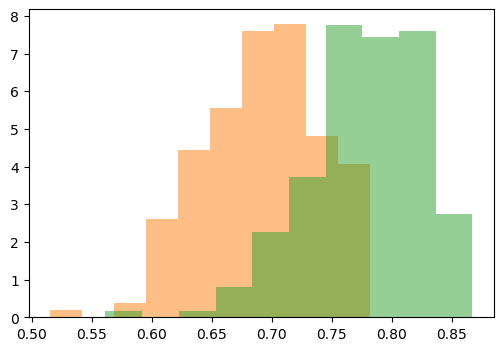

nan
0
(106, 0)
0.31800803842760517
202
(606, 202)
0.2997552564245189
202
(178, 202)


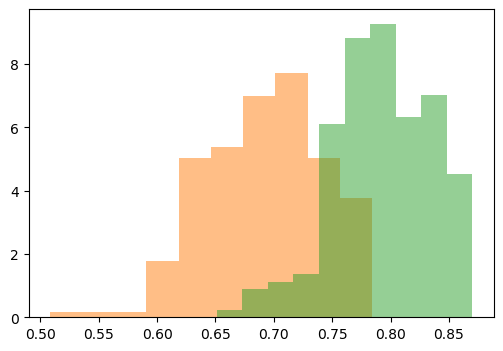

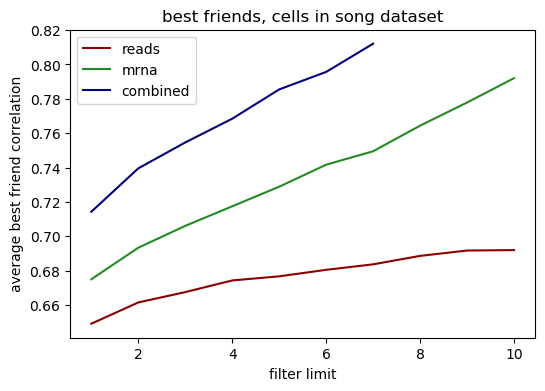

In [636]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, cells in song dataset')
plt.show()

0.2739244820472958
62
(1079, 62)
0.25153279723942445
62
(2094, 62)
0.26310219287105235
62
(1524, 62)


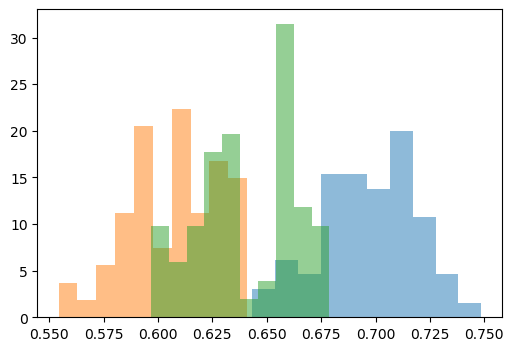

0.2672576541081836
62
(786, 62)
0.2542026351658337
62
(1917, 62)
0.2638480933690312
62
(1241, 62)


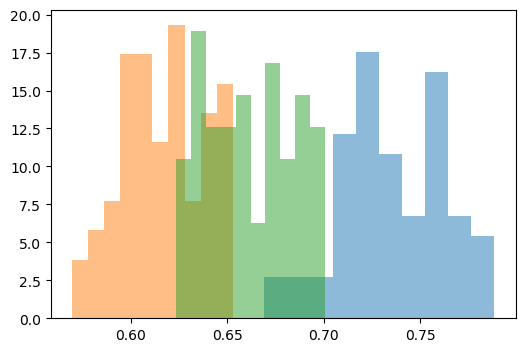

0.2629834826282815
62
(623, 62)
0.2580556976313516
62
(1829, 62)
0.2592500155986773
62
(1034, 62)


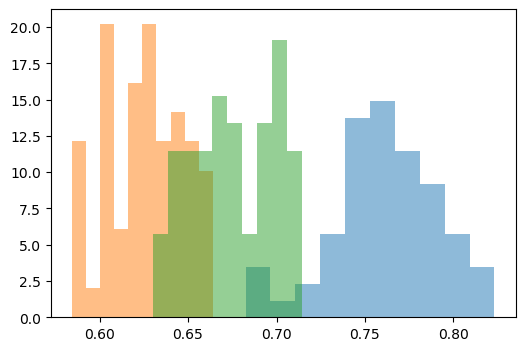

0.26046466973886323
62
(504, 62)
0.2594262370498501
62
(1753, 62)
0.260425748328974
62
(888, 62)


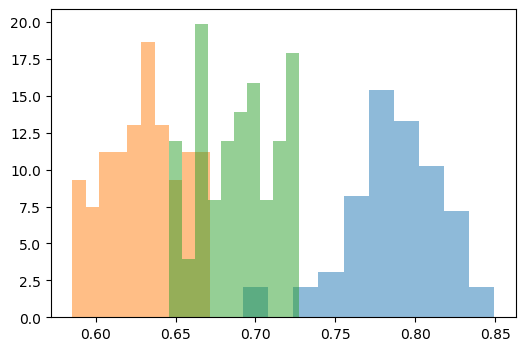

0.26054590570719605
62
(416, 62)
0.2624469937907012
62
(1704, 62)
0.24826875876577847
62
(736, 62)


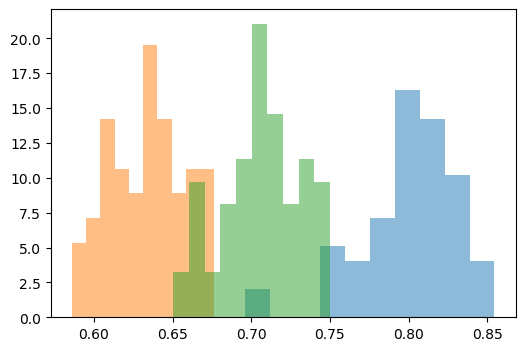

0.2611500701262272
62
(345, 62)
0.2629042015494799
62
(1653, 62)
0.25743104960530155
62
(662, 62)


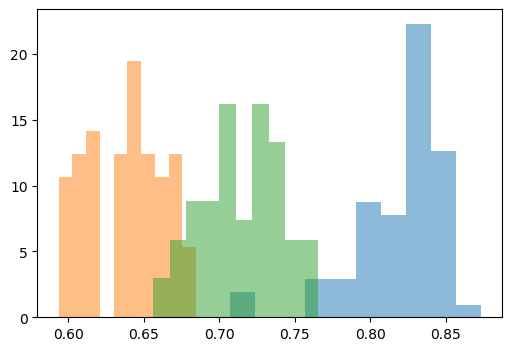

0.26236187074450273
62
(289, 62)
0.263193748747746
62
(1610, 62)
0.25071241308560355
62
(566, 62)


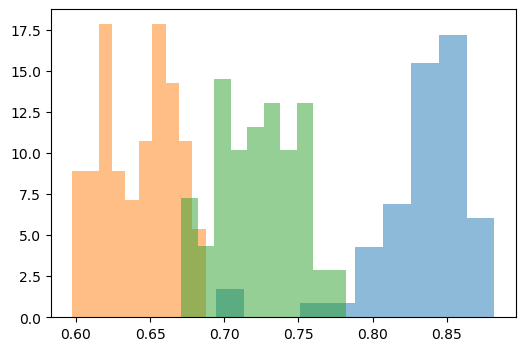

0.25713143161823515
62
(242, 62)
0.2646715895841431
62
(1577, 62)
0.25415925831851666
62
(508, 62)


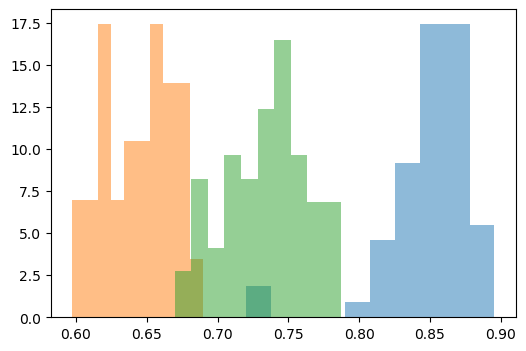

0.250818139317438
62
(207, 62)
0.26512489017195934
62
(1542, 62)
0.2569680249009621
62
(456, 62)


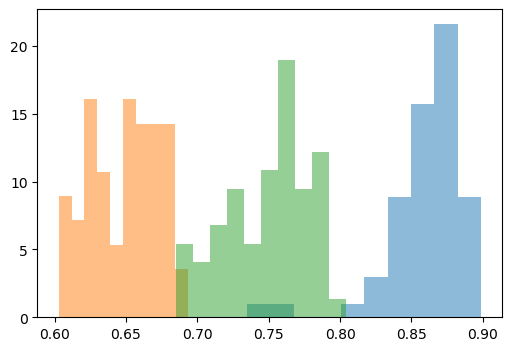

0.23792653365653552
62
(173, 62)
0.26663472798892796
62
(1515, 62)
0.2513709677419355
62
(400, 62)


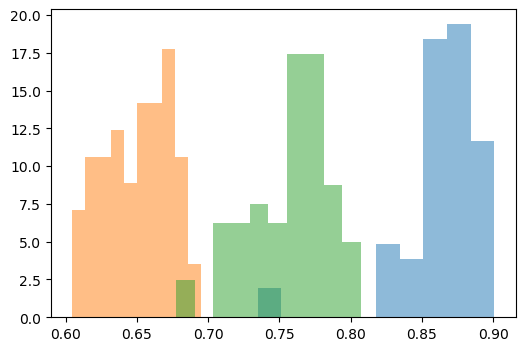

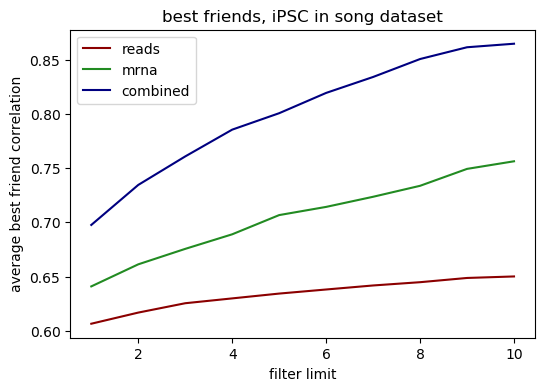

In [637]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, iPSC in song dataset')
plt.show()

0.32786596119929445
70
(324, 70)
0.33567944250871073
70
(615, 70)
0.3327462491846053
70
(438, 70)


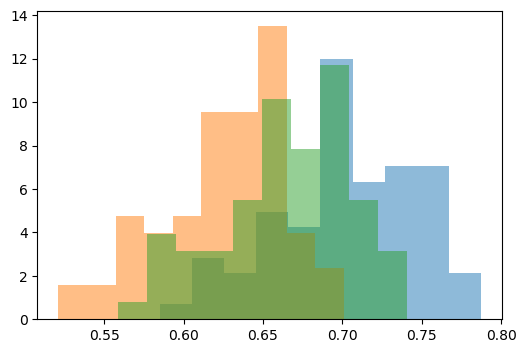

0.3319066147859919
70
(257, 70)
0.3361922464152949
70
(538, 70)
0.32326060107039933
70
(347, 70)


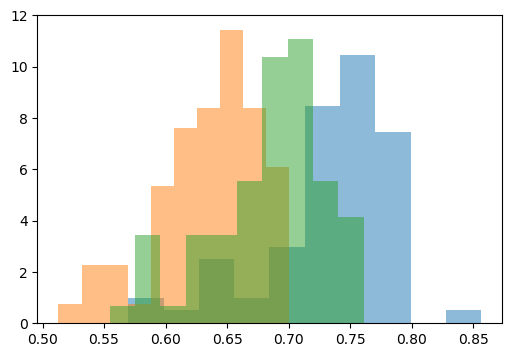

0.3316566063044937
70
(213, 70)
0.3355691056910568
70
(492, 70)
0.32152317880794706
70
(302, 70)


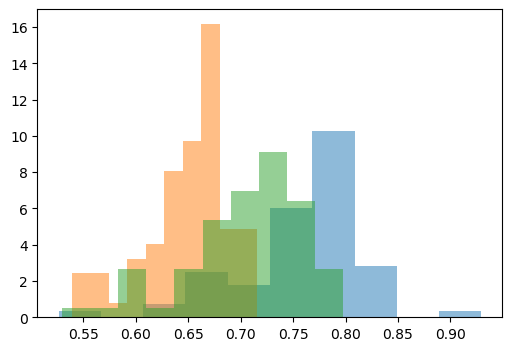

0.3347049689440993
70
(184, 70)
0.33381672323356987
70
(463, 70)
0.32637362637362605
70
(273, 70)


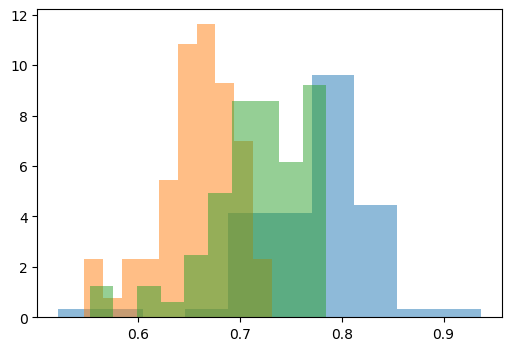

0.3341071428571428
70
(160, 70)
0.3315977871786528
70
(439, 70)
0.3314857142857144
70
(250, 70)


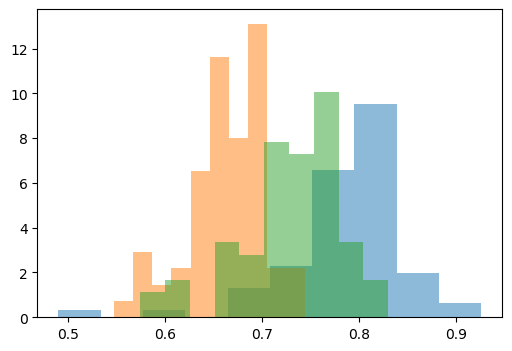

0.3478095238095237
70
(150, 70)
0.3304125468803274
70
(419, 70)
0.3250164581961817
70
(217, 70)


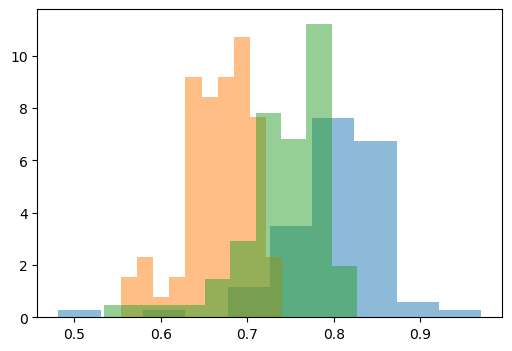

0.3476906552094521
70
(133, 70)
0.330752990851513
70
(406, 70)
0.31711309523809517
70
(192, 70)


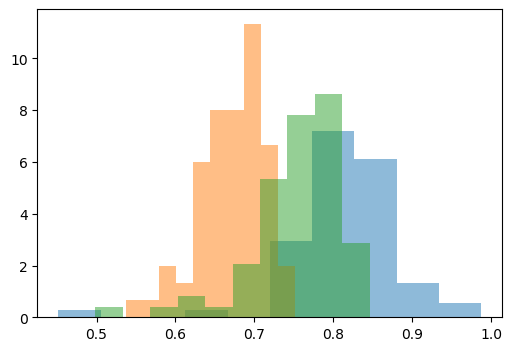

0.31704980842911873
54
(116, 54)
0.32904761904761903
70
(390, 70)
0.3224603174603174
70
(180, 70)


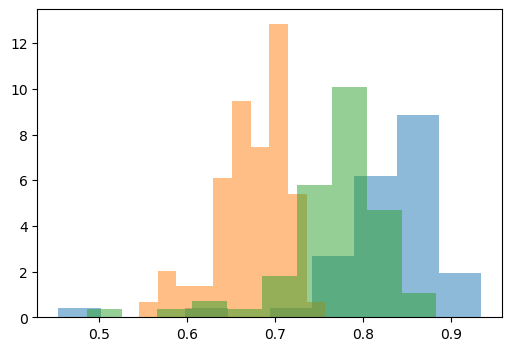

0.24730458221024262
28
(106, 28)
0.32800453514739225
70
(378, 70)
0.3198757763975154
70
(161, 70)


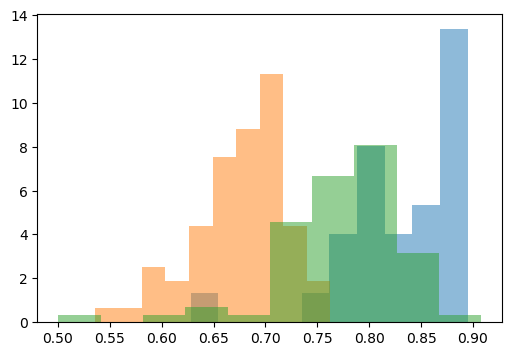

0.24970131421744315
27
(93, 27)
0.33131428571428584
70
(375, 70)
0.3244087038789025
70
(151, 70)


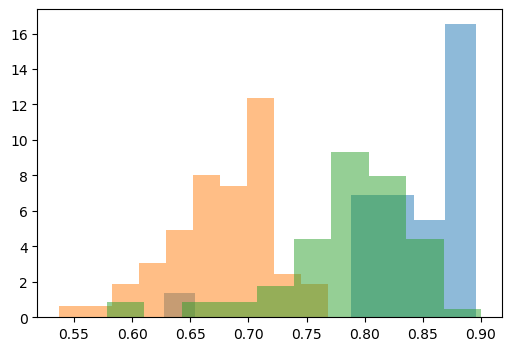

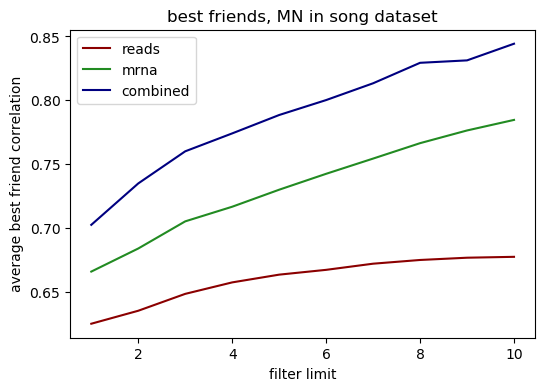

In [638]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, MN in song dataset')
plt.show()

In [794]:
def mean_confidence_interval(data):
    m = np.mean(data)
    #md = np.median(data)
    s = np.std(data)
    ci_up = np.min([m+(1.645*s), 1])
    ci_dn = np.max([m-(1.645*s), 0])
    
    return m, ci_up, ci_dn

In [774]:
from scipy.special import logit
from scipy.special import expit

In [856]:
chen_good_cells = chen_coverage_tab.loc[chen_coverage_tab['SJ_coverage'] >= chen_coverage_tab['SJ_coverage'].quantile(0.1)].index


In [814]:
def get_curves_dataset(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, 
                       coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5):
    
    int_ = PSI_tab[subpop].loc[np.abs(0.5 - PSI_tab[subpop].mean(axis=1)) <= (0.5-psi_min)]
    PSI_int = int_.loc[int_.isna().mean(axis=1) <= (1-cell_min)]

    curva_list = []
    for exon in PSI_int.index:

        curva = []
        for i in np.arange(0, 0.51, 0.01):
            curva.append(((PSI_int.loc[exon].dropna() <= (0+i)) | (PSI_int.loc[exon].dropna() >= (1-i))).mean())

        curva_list.append(curva)
#         print(exon)

    filtered_all = process_subpop(subpop, PSI_tab, mrna_counts, 
                                        mrna_per_event, read_counts, coverage_tab['SJ_coverage'], 
                                       psi_min, 10, reads_min = reads_min)

    curva_list_filt = []
    for exon in filtered_all[0].index:

        curva = []
        for i in np.arange(0, 0.51, 0.01):
            curva.append(((filtered_all[0].loc[exon].dropna() <= (0+i)) | (filtered_all[0].loc[exon].dropna() >= (1-i))).mean())

        curva_list_filt.append(curva)
#         print(exon)
        
    return curva_list, curva_list_filt

def plot_bimodality_curves(curva_list, curva_list_filt):


    for curva in curva_list:
        plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(curva), c='darkred', alpha=0.02)

    for curva in curva_list_filt:
        plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(curva), c='navy', alpha=0.02)

    mean_list = []
    ci_up_list = []
    ci_dn_list = []

    mean_list_filt = []
    ci_up_list_filt = []
    ci_dn_list_filt = []

    for i in range(len(curva_list[0])):
        m_list = mean_confidence_interval([x[i] for x in curva_list])
        m_list_filt = mean_confidence_interval([x[i] for x in curva_list_filt])

        mean_list.append(m_list[0])
        ci_up_list.append(m_list[1])
        ci_dn_list.append(m_list[2])

        mean_list_filt.append(m_list_filt[0])
        ci_up_list_filt.append(m_list_filt[1])
        ci_dn_list_filt.append(m_list_filt[2])

    plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(mean_list), c='darkred', linewidth=3) 
    plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(mean_list_filt), c='navy', linewidth=3) 

    plt.fill_between([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(ci_dn_list), [0]+list(ci_up_list),
                     color='darkred', alpha=0.1, linewidth=0.0)

    plt.fill_between([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(ci_dn_list_filt), [0]+list(ci_up_list_filt),
                     color='navy', alpha=0.1, linewidth=0.0)

    plt.show()

In [853]:
def plot_bimodality_curves(curva_set, color_list, plot_individual_events = False):

    for i in range(len(curva_set)):
        curva_list = curva_set[i]
        col = color_list[i]

        if plot_individual_events:
            for curva in curva_list:
                plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(curva), c=col, alpha=0.02)

        mean_list = []
        ci_up_list = []
        ci_dn_list = []

        for i in range(len(curva_list[0])):
            m_list = mean_confidence_interval([x[i] for x in curva_list])

            mean_list.append(m_list[0])
            ci_up_list.append(m_list[1])
            ci_dn_list.append(m_list[2])

        plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(mean_list), c=col, linewidth=3) 

        plt.fill_between([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(ci_dn_list), [0]+list(ci_up_list),
                         color=col, alpha=0.1, linewidth=0.0)

    plt.show()

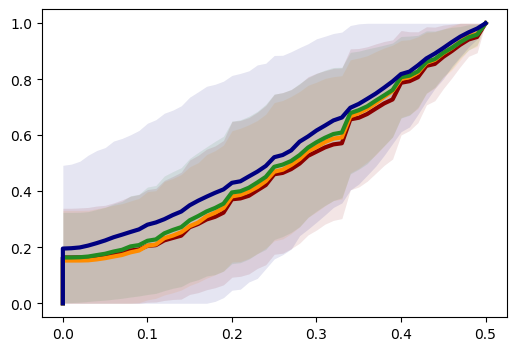

In [855]:
curva_list_ES2i, curva_list_filt_ES2i = get_curves_dataset(chen_PSI, chen_ES2i, chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

curva_list_ES, curva_list_filt_ES = get_curves_dataset(chen_PSI, chen_ES, chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

curva_list_Epi, curva_list_filt_Epi = get_curves_dataset(chen_PSI, chen_Epi, chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

curva_list_MN, curva_list_filt_MN = get_curves_dataset(chen_PSI, chen_MN, chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

plot_bimodality_curves([curva_list_filt_ES2i, curva_list_filt_ES, curva_list_filt_Epi, curva_list_filt_MN], 
                       ['darkred', 'darkorange', 'forestgreen', 'navy'])

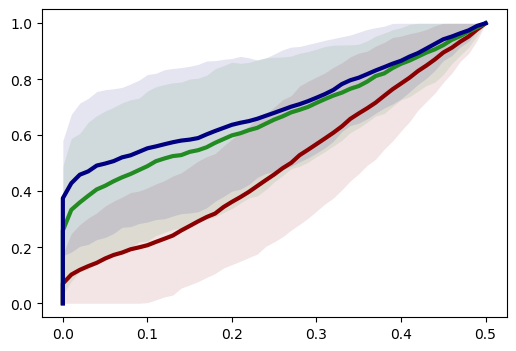

In [857]:
curva_list_iPSC, curva_list_filt_iPSC = get_curves_dataset(song_PSI, song_iPSC, song_mrna_counts, 
                                                           mrna_per_event_song, song_read_counts, 
                       song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

curva_list_NPC, curva_list_filt_NPC = get_curves_dataset(song_PSI, song_NPC, song_mrna_counts, 
                                                           mrna_per_event_song, song_read_counts, 
                       song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

curva_list_MN, curva_list_filt_MN = get_curves_dataset(song_PSI, song_MN, song_mrna_counts, 
                                                           mrna_per_event_song, song_read_counts, 
                       song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

plot_bimodality_curves([curva_list_filt_iPSC, curva_list_filt_NPC, curva_list_filt_MN], 
                       ['darkred', 'forestgreen', 'navy'])

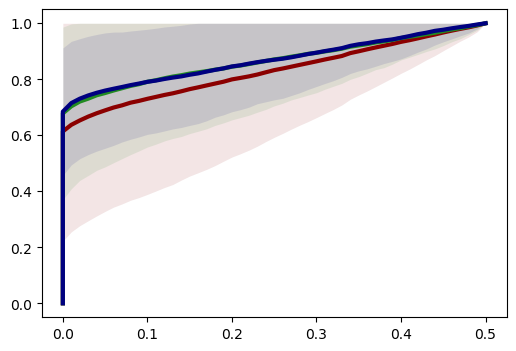

In [858]:
plot_bimodality_curves([curva_list_iPSC, curva_list_NPC, curva_list_MN], 
                       ['darkred', 'forestgreen', 'navy'])

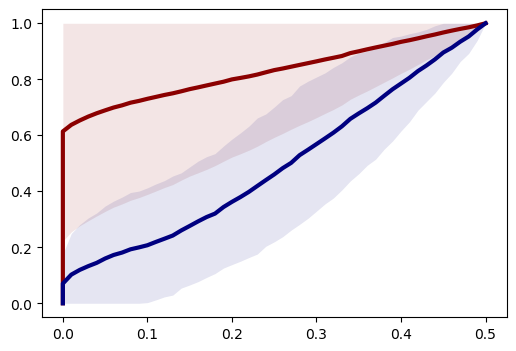

In [870]:
plot_bimodality_curves([curva_list_iPSC, curva_list_filt_iPSC], ['darkred', 'navy'])

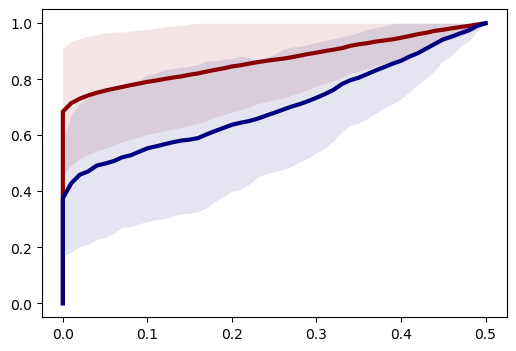

In [871]:
plot_bimodality_curves([curva_list_MN, curva_list_filt_MN], ['darkred', 'navy'])

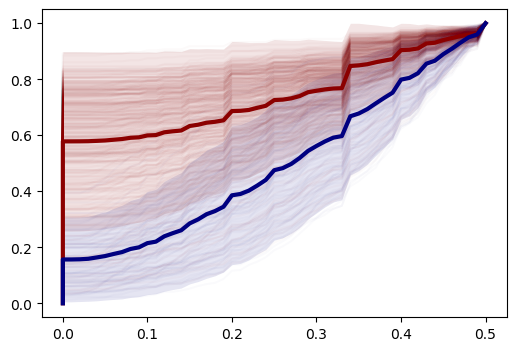

In [833]:
curva_list, curva_list_filt = get_curves_dataset(chen_PSI, chen_PSI.columns, chen_mrna_counts, 
                                                 mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

plot_bimodality_curves(curva_list, curva_list_filt)

In [834]:
from sklearn.metrics import auc

In [835]:
auc_list = []
for i in range(len(curva_list)):
    auc_list.append(auc(list(np.arange(0, 0.51, 0.01)), curva_list[i]))
    
auc_list_filt = []
for i in range(len(curva_list_filt)):
    auc_list_filt.append(auc(list(np.arange(0, 0.51, 0.01)), curva_list_filt[i]))

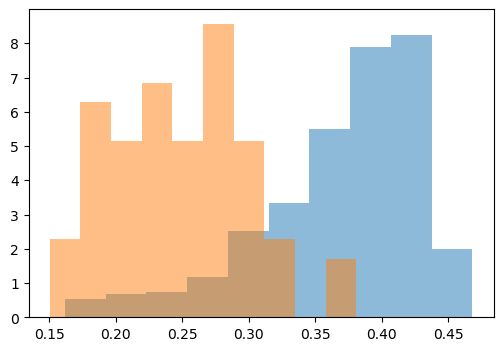

In [836]:
plt.hist(auc_list, density=True, alpha=0.5)
plt.hist(auc_list_filt, density=True, alpha=0.5)
plt.show()

In [837]:
from scipy.stats import probplot

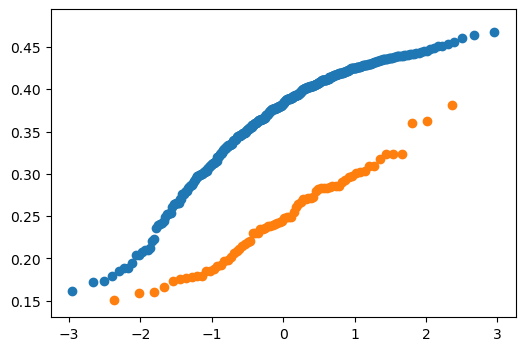

In [847]:
plt.scatter(probplot(auc_list)[0][0], probplot(auc_list)[0][1])
plt.scatter(probplot(auc_list_filt)[0][0], probplot(auc_list_filt)[0][1])
plt.show()

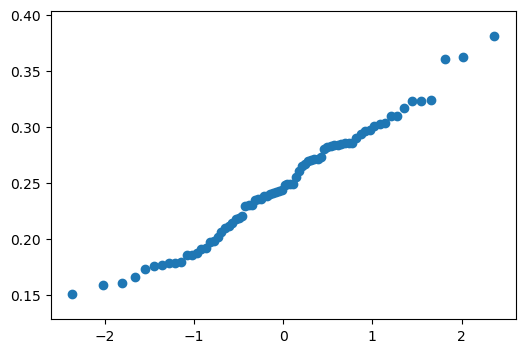

In [846]:
plt.scatter(probplot(auc_list_filt)[0][0], probplot(auc_list_filt)[0][1])
plt.show()

In [876]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


cluster1 = KMeans(5)
# cluster2 = KMeans(len(dataset2.cell_types))

# def computeARI(latent1, latent, cluster1, cluster2, batch_indices):
#     c11 = cluster1.fit_predict(latent1)
#     c12 = cluster1.fit_predict(latent[batch_indices == 0])
#     c21 = cluster2.fit_predict(latent2)
#     c22 = cluster2.fit_predict(latent[batch_indices == 1])
#     return (adjusted_rand_score(c11, c12), adjusted_rand_score(c21, c22))

In [884]:
# from sklearn.decomposition import PCA
# latent = PCA(n_components=10).fit_transform(chen_mrna_counts.T)

In [889]:
# plt.scatter(latent.T[0], latent.T[1])
# plt.show()

In [877]:
c11 = cluster1.fit_predict(chen_pca[['PC1', 'PC2']])
c12 = cluster1.fit_predict(chen_pca[['PC1', 'PC2']])

In [907]:
[int(x in chen_clusters[4]) for x in chen_PSI.columns]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [933]:
adjusted_rand_score([1 if x == 'Motor neuron' else 0 for x in chen_pca_clust.cell_type], 
                    [int(x) for x in chen_PSI.loc['Clta_4'] >= 0.5])

0.36317646434113254

In [923]:
from scipy.stats import chisquare

In [981]:
chisquare([10, 0, 1, 0, 30, 16], [10, 22, 10, 9, 25, 1])

Power_divergenceResult(statistic=265.1, pvalue=3.155768748991131e-55)

In [948]:
def test_exon_chi(PSI_tab, exon, clusters, psi_lim = 0.5):
    chi_pos = []
    chi_neg = []
    for clust in clusters.unique():
        cluster_cells = clusters.loc[clusters == clust].index
        
        pos_cases = (PSI_tab.loc[exon, cluster_cells] >= psi_lim).sum()
        missing = PSI_tab.loc[exon, cluster_cells].isna().sum()
        neg_cases = len(cluster_cells) - pos_cases - missing
        
        chi_pos.append(pos_cases)
        chi_neg.append(neg_cases)
        
    return chisquare(chi_pos, chi_neg)

In [936]:
test_exon_chi(chen_filtered_all)
chen_pca_clust.loc[chen_pca_clust.cell_type == 'Motor neuron'].index

Index(['SRR2727459', 'SRR2727480', 'SRR2727474', 'SRR2727483', 'SRR2727454',
       'SRR2727473', 'SRR2727490', 'SRR2727435', 'SRR2727491', 'SRR2727462',
       'SRR2727477', 'SRR2727457', 'SRR2727456', 'SRR2727433', 'SRR2727425',
       'SRR2727481', 'SRR2727476', 'SRR2727471', 'SRR2727468', 'SRR2727430',
       'SRR2727455', 'SRR2727436', 'SRR2727426', 'SRR2727427', 'SRR2727478',
       'SRR2727475', 'SRR2727450', 'SRR2727447', 'SRR2727442', 'SRR2727443',
       'SRR2727464', 'SRR2727461', 'SRR2727419', 'SRR2727449', 'SRR2727428',
       'SRR2727482', 'SRR2727469', 'SRR2727485', 'SRR2727453', 'SRR2727445',
       'SRR2727489', 'SRR2727470', 'SRR2727487', 'SRR2727488', 'SRR2727460',
       'SRR2727444', 'SRR2727451', 'SRR2727422', 'SRR2727479', 'SRR2727432',
       'SRR2727463', 'SRR2727486', 'SRR2727441', 'SRR2727458', 'SRR2727472',
       'SRR2727440', 'SRR2727424', 'SRR2727438', 'SRR2727484', 'SRR2727439',
       'SRR2727420', 'SRR2727467', 'SRR2727418', 'SRR2727446', 'SRR2727448',

In [969]:
chen_filter = process_subpop(chen_PSI.columns, chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                                 chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.05, 10, 0, cell_min=0.1)

In [957]:
test_exon_chi(aver[0], 'Rpn2_1', chen_pca_clust.cell_type, psi_lim = 0.5)

Power_divergenceResult(statistic=409.5208333333333, pvalue=1.9178543769468153e-88)

In [965]:
test_exon_chi(aver[0], 'Mff_3', chen_pca_clust.cell_type, psi_lim = 0.5)

Power_divergenceResult(statistic=178.7359575409111, pvalue=1.6536200464361673e-38)

In [973]:
test_exon_chi(chen_filter[0], 'Cadm1_2', chen_pca_clust.AC, psi_lim = 0.5)

Power_divergenceResult(statistic=inf, pvalue=0.0)

In [964]:
aver[0].loc['Mff_3']

SRR2727109    0.000000
SRR2727120    0.090909
SRR2727088    0.428571
SRR2727094    0.250000
SRR2727139    0.245283
SRR2727103         NaN
SRR2727106         NaN
SRR2727146    0.076923
SRR2727093    0.333333
SRR2727153    0.818182
SRR2727105         NaN
SRR2727054    0.600000
SRR2727124    0.000000
SRR2727102    1.000000
SRR2727100    0.200000
SRR2727107    0.250000
SRR2727114    0.200000
SRR2727060    0.571429
SRR2727052         NaN
SRR2727091    0.371429
SRR2727085         NaN
SRR2727142    0.200000
SRR2727101    0.333333
SRR2727116         NaN
SRR2727144         NaN
SRR2727113         NaN
SRR2727053         NaN
SRR2727132    0.333333
SRR2727154    0.333333
SRR2727140    0.405405
                ...   
SRR2727460         NaN
SRR2727444    0.397260
SRR2727451    1.000000
SRR2727422    0.444444
SRR2727479         NaN
SRR2727432         NaN
SRR2727463         NaN
SRR2727486         NaN
SRR2727441    0.529412
SRR2727458    0.714286
SRR2727472         NaN
SRR2727440    0.824561
SRR2727424 

In [983]:
# TO DO: run human metaclass in sc exons
# Get NTW table

In [985]:
pearsonr([0, 1]*8, [0, 3]*8)

(1.0, 0.0)

In [1]:
chen_pca

NameError: name 'chen_pca' is not defined